In [39]:
%load_ext autoreload
%autoreload 2

import numpy as np
from numpy import cos, sin, sqrt, arctan2
import matplotlib.pyplot as plt
import healpy as hp
from healpy.newvisufunc import projview, newprojplot
from astropy import units as u
from astropy.coordinates import SkyCoord
from gwbird import detectors
from gwbird import skymap
from gwbird import utils
from gwbird.overlap import Response
from gwbird.nell import AngularResponse
from gwbird import overlap
from gwbird import nell
from gwbird import skymap
from gwbird import utils
from gwbird import detectors
from gwbird import pls
from gwbird.skymap import Basis, AngularPatternFunction
from gwbird.NANOGrav import NANOGrav_dir
from gwbird.nell import AngularResponse, Sensitivity_ell
import matplotlib.cm as cm


plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.family'] = 'serif'
REarth = 6.371 * 1e6 #m
c = 3*1e8

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# load the pulsar catalog

N, pulsar_xyz, DIST_array = detectors.get_NANOGrav_pulsars()
p = pulsar_xyz
d = DIST_array 



2025-06-13 11:19:53.234 | DEBUG    | pint.models.binary_ddk:validate:211 - Validating DDK model in ECL coordinates


In [15]:
f = np.logspace(-9, -7, 100)

In [16]:
# normalization for tensor modes

for i in range(N):
    print(Response.pairwise_overlap(f, pulsar_xyz[i], pulsar_xyz[i], float(d[i]), float(d[i]), 't')[0])

(1.005970064752068+1.0778016973199004e-19j)
(0.9939590619457443+9.537555030405695e-20j)
(1.0072053328572763-6.681605473391827e-20j)
(1.0047727308281287+1.725817098143202e-19j)
(0.9903426876565775+1.084579174288735e-19j)
(0.9999516628055605-2.8629348159842067e-20j)
(0.9950189280703354-8.656574714082524e-20j)
(0.9965717822640499-3.569948260449736e-20j)
(0.9994128289880535-3.4639896781651556e-20j)
(1.0108492112390686+1.552546976052286e-19j)
(0.9999893178250555+1.3041680137211268e-20j)
(1.001197391069417-5.778499885765015e-20j)
(1.0055044739588275-6.135696122501452e-20j)
(0.9915170230105235+8.716113223905285e-20j)
(1.0025770816379524+1.9159659718887036e-19j)
(1.0000448475075308+3.4502911693858595e-19j)
(0.9969256467516409-1.752573490947265e-19j)
(0.9913281820185589-3.2175882698016596e-20j)
(0.9997704909348994+2.1824948432122477e-19j)
(0.9971152455136265+2.19063987243423e-19j)
(1.0018578738762622+3.505052944428776e-20j)
(1.0075743368720407-2.5182840347423863e-20j)
(0.9973694272953166-1.3903

In [17]:
# normalization for vector modes

for i in range(N):
    print(Response.pairwise_overlap(f, pulsar_xyz[i], pulsar_xyz[i], float(d[i]), float(d[i]), 'v')[0])

(16.516904886059063+2.9067831331524805e-18j)
(16.82340350087615-1.5055798810194617e-17j)
(16.932282579442983+1.500703748702721e-17j)
(20.129841335915536-9.519656360868187e-18j)
(16.282047180450135+1.5279639487545638e-17j)
(15.082738759492795+2.0606768535675382e-17j)
(17.7759154621594-1.3033910305307019e-17j)
(18.510510399456688+7.067983823144406e-18j)
(17.197908058577948-1.1530970509654269e-17j)
(13.560978668553982-5.495597811654763e-20j)
(14.03927732009564+1.0052536796051364e-17j)
(15.89405252114954-2.2872226489360794e-17j)
(17.327519055673687+1.4236875049479112e-17j)
(16.857343007169497+2.6894450093141874e-17j)
(17.981965178384293+3.8447758404646146e-18j)
(14.431064894608886+6.078190875199725e-18j)
(17.52747734537615-1.283936179996196e-18j)
(17.264302356994698-1.313071168805941e-18j)
(18.445606689006162+4.5881756095583225e-18j)
(19.60168611109492+8.59974419730394e-18j)
(16.130312789075308+5.923384732720759e-18j)
(16.69155573877569+2.4632117937446283e-17j)
(15.273063020403528-1.243197

In [18]:
# normalization for scalar breathing modes

for i in range(N):
    print(Response.pairwise_overlap(f, pulsar_xyz[i], pulsar_xyz[i], float(d[i]), float(d[i]), 's')[0])

(2.0119401295041355+2.1556033946397988e-19j)
(1.9879181238914885+1.9075110060811435e-19j)
(2.014410665714553-1.3363210946783657e-19j)
(2.0095454616562582+3.4516341962863977e-19j)
(1.980685375313155+2.169158348577472e-19j)
(1.999903325611121-5.725869631968344e-20j)
(1.9900378561406704-1.7313149428165284e-19j)
(1.9931435645280997-7.139896520899453e-20j)
(1.9988256579761068-6.927979356330285e-20j)
(2.021698422478137+3.1050939521045746e-19j)
(1.9999786356501115+2.6083360274422848e-20j)
(2.0023947821388335-1.155699977152994e-19j)
(2.011008947917655-1.2271392245002885e-19j)
(1.983034046021047+1.7432226447810544e-19j)
(2.005154163275905+3.831931943777402e-19j)
(2.000089695015061+6.900582338771725e-19j)
(1.993851293503282-3.505146981894535e-19j)
(1.9826563640371178-6.435176539603247e-20j)
(1.9995409818697985+4.36498968642449e-19j)
(1.9942304910272535+4.381279744868455e-19j)
(2.0037157477525254+7.010105888857588e-20j)
(2.015148673744082-5.036568069484715e-20j)
(1.9947388545906324-2.780618641526

In [19]:
# normalization for scalar longitudinal modes   

for i in range(N):
    print(Response.pairwise_overlap(f, pulsar_xyz[i], pulsar_xyz[i], float(d[i]), float(d[i]), 'l')[0])

(407.5995035469601+9.198671630549108e-16j)
(451.82510991504495-1.0466023002196491e-15j)
(447.93269898420334+1.3877515307340126e-15j)
(1580.912968357579-3.569957408970795e-15j)
(390.8488815192652-1.5858207793278443e-16j)
(248.9070671689891+7.387881842968086e-16j)
(639.5619578201886-2.9861757802479554e-16j)
(873.5687767104346+2.57020373217216e-15j)
(500.3628369920457-6.713540245797248e-16j)
(147.87104192242745+8.845887420128433e-18j)
(175.521213704696+9.132140876502374e-17j)
(331.2616926108302-9.996517342403345e-16j)
(521.2848780434595+4.024474039272513e-16j)
(476.65302877566654+9.002852701205927e-16j)
(685.504074763327-3.1617765989121916e-16j)
(200.8939869864755+3.366278239594443e-16j)
(582.3902734424873-2.4858975742069567e-16j)
(550.6384940795651-5.026053493327121e-16j)
(814.0223100695691-1.1656207867223806e-15j)
(1174.9924973497032-1.7956599001500572e-15j)
(356.47739777670125-8.930441793008047e-17j)
(418.0101583127381+1.5500953520347672e-15j)
(274.7900860939215-2.916978539338943e-16j)

In [20]:
# normalization for circular polarization (has to be zero)

for i in range(N):
    print(Response.pairwise_overlap(f, pulsar_xyz[i], pulsar_xyz[i], float(d[i]), float(d[i]), 'V')[0])

0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j


# Overlap Reduction Function

In [21]:
gamma_ij_t = []
gamma_ij_v = []
gamma_ij_s = []
gamma_ij_l = []
gamma_ij_V = []
alpha_ij = []
for i in range(N):
    for j in range(i+1, N):
        alpha_ij.append(np.arccos(np.dot(pulsar_xyz[i], pulsar_xyz[j])))
        gamma_ij_t.append(Response.pairwise_overlap(f, pulsar_xyz[i], pulsar_xyz[j], d[i], d[j], 't'))
        gamma_ij_v.append(Response.pairwise_overlap(f, pulsar_xyz[i], pulsar_xyz[j], d[i], d[j],'v'))
        gamma_ij_s.append(Response.pairwise_overlap(f, pulsar_xyz[i], pulsar_xyz[j], d[i], d[j],'s'))
        gamma_ij_l.append(Response.pairwise_overlap(f, pulsar_xyz[i], pulsar_xyz[j], d[i], d[j],'l'))
        gamma_ij_V.append(Response.pairwise_overlap(f, pulsar_xyz[i], pulsar_xyz[j], d[i], d[j],'V'))

gamma_ij_t = np.array(gamma_ij_t)
gamma_ij_v = np.array(gamma_ij_v)
gamma_ij_s = np.array(gamma_ij_s)
gamma_ij_l = np.array(gamma_ij_l)
gamma_ij_V = np.array(gamma_ij_V)
alpha_ij = np.array(alpha_ij)

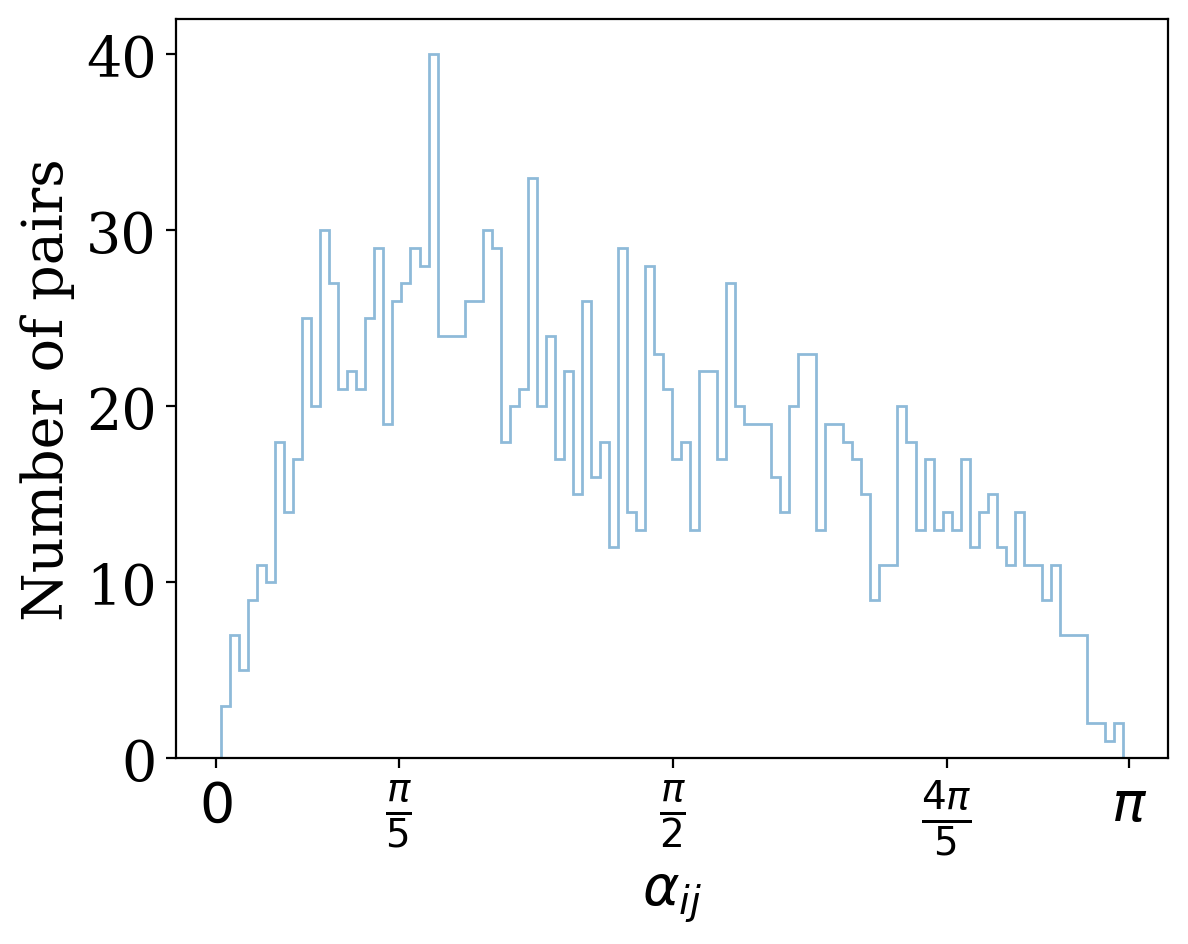

In [22]:
# angular separation between pulsars in radians in a histogram

from matplotlib.ticker import MultipleLocator, FuncFormatter

def custom_pi_formatter(x, pos):
    if x == 0:
        return '0'
    elif x == np.pi / 5:
        return r'$\frac{\pi}{5}$'
    elif x == np.pi / 2:
        return r'$\frac{\pi}{2}$'
    elif x == 4 * np.pi / 5:
        return r'$\frac{4\pi}{5}$'
    elif x == np.pi:
        return r'$\pi$'
    else:
        return ''


# Definire i tick personalizzati
custom_ticks = [0, np.pi / 5, np.pi / 2, 4 * np.pi / 5, np.pi]


plt.hist(alpha_ij, bins=100, histtype='step', alpha=0.5)
plt.xlabel(r'$\alpha_{ij}$')
plt.ylabel('Number of pairs')

#plt.title('Angular separation between pulsars')
plt.xticks(custom_ticks, [r'$0$', r'$\frac{\pi}{5}$', r'$\frac{\pi}{2}$', r'$\frac{4\pi}{5}$', r'$\pi$'])
plt.show()

In [23]:
# hellings  downs curve

def hellings_downs(alpha):
    return 0.5 + (3*(1- np.cos(alpha))/4 * (np.log(0.5*(1-np.cos(alpha)))- 1/6))

def hellings_downs_breathing(alpha):
    return (3 + np.cos(alpha)) / 8

alpha = np.linspace(0.01, np.pi, 100)
hd = hellings_downs(alpha)
hd_breathing = hellings_downs_breathing(alpha)

In [24]:
# find the index corresponding to a frequency of 1e-8

f = np.logspace(-9, -7, 100)
f_index = np.argmin(np.abs(f - 1e-8))
gamma_ij_t_10_8 = gamma_ij_t[:,f_index]
gamma_ij_v_10_8 = gamma_ij_v[:,f_index]
gamma_ij_s_10_8 = gamma_ij_s[:,f_index]
gamma_ij_l_10_8 = gamma_ij_l[:,f_index]
gamma_ij_V_10_8 = gamma_ij_V[:,f_index]


In [25]:
alpha = np.linspace(0.01, np.pi, 100)
print(alpha.shape)
print(hd.shape)

(100,)
(100,)


NameError: name 'alpha_ij' is not defined

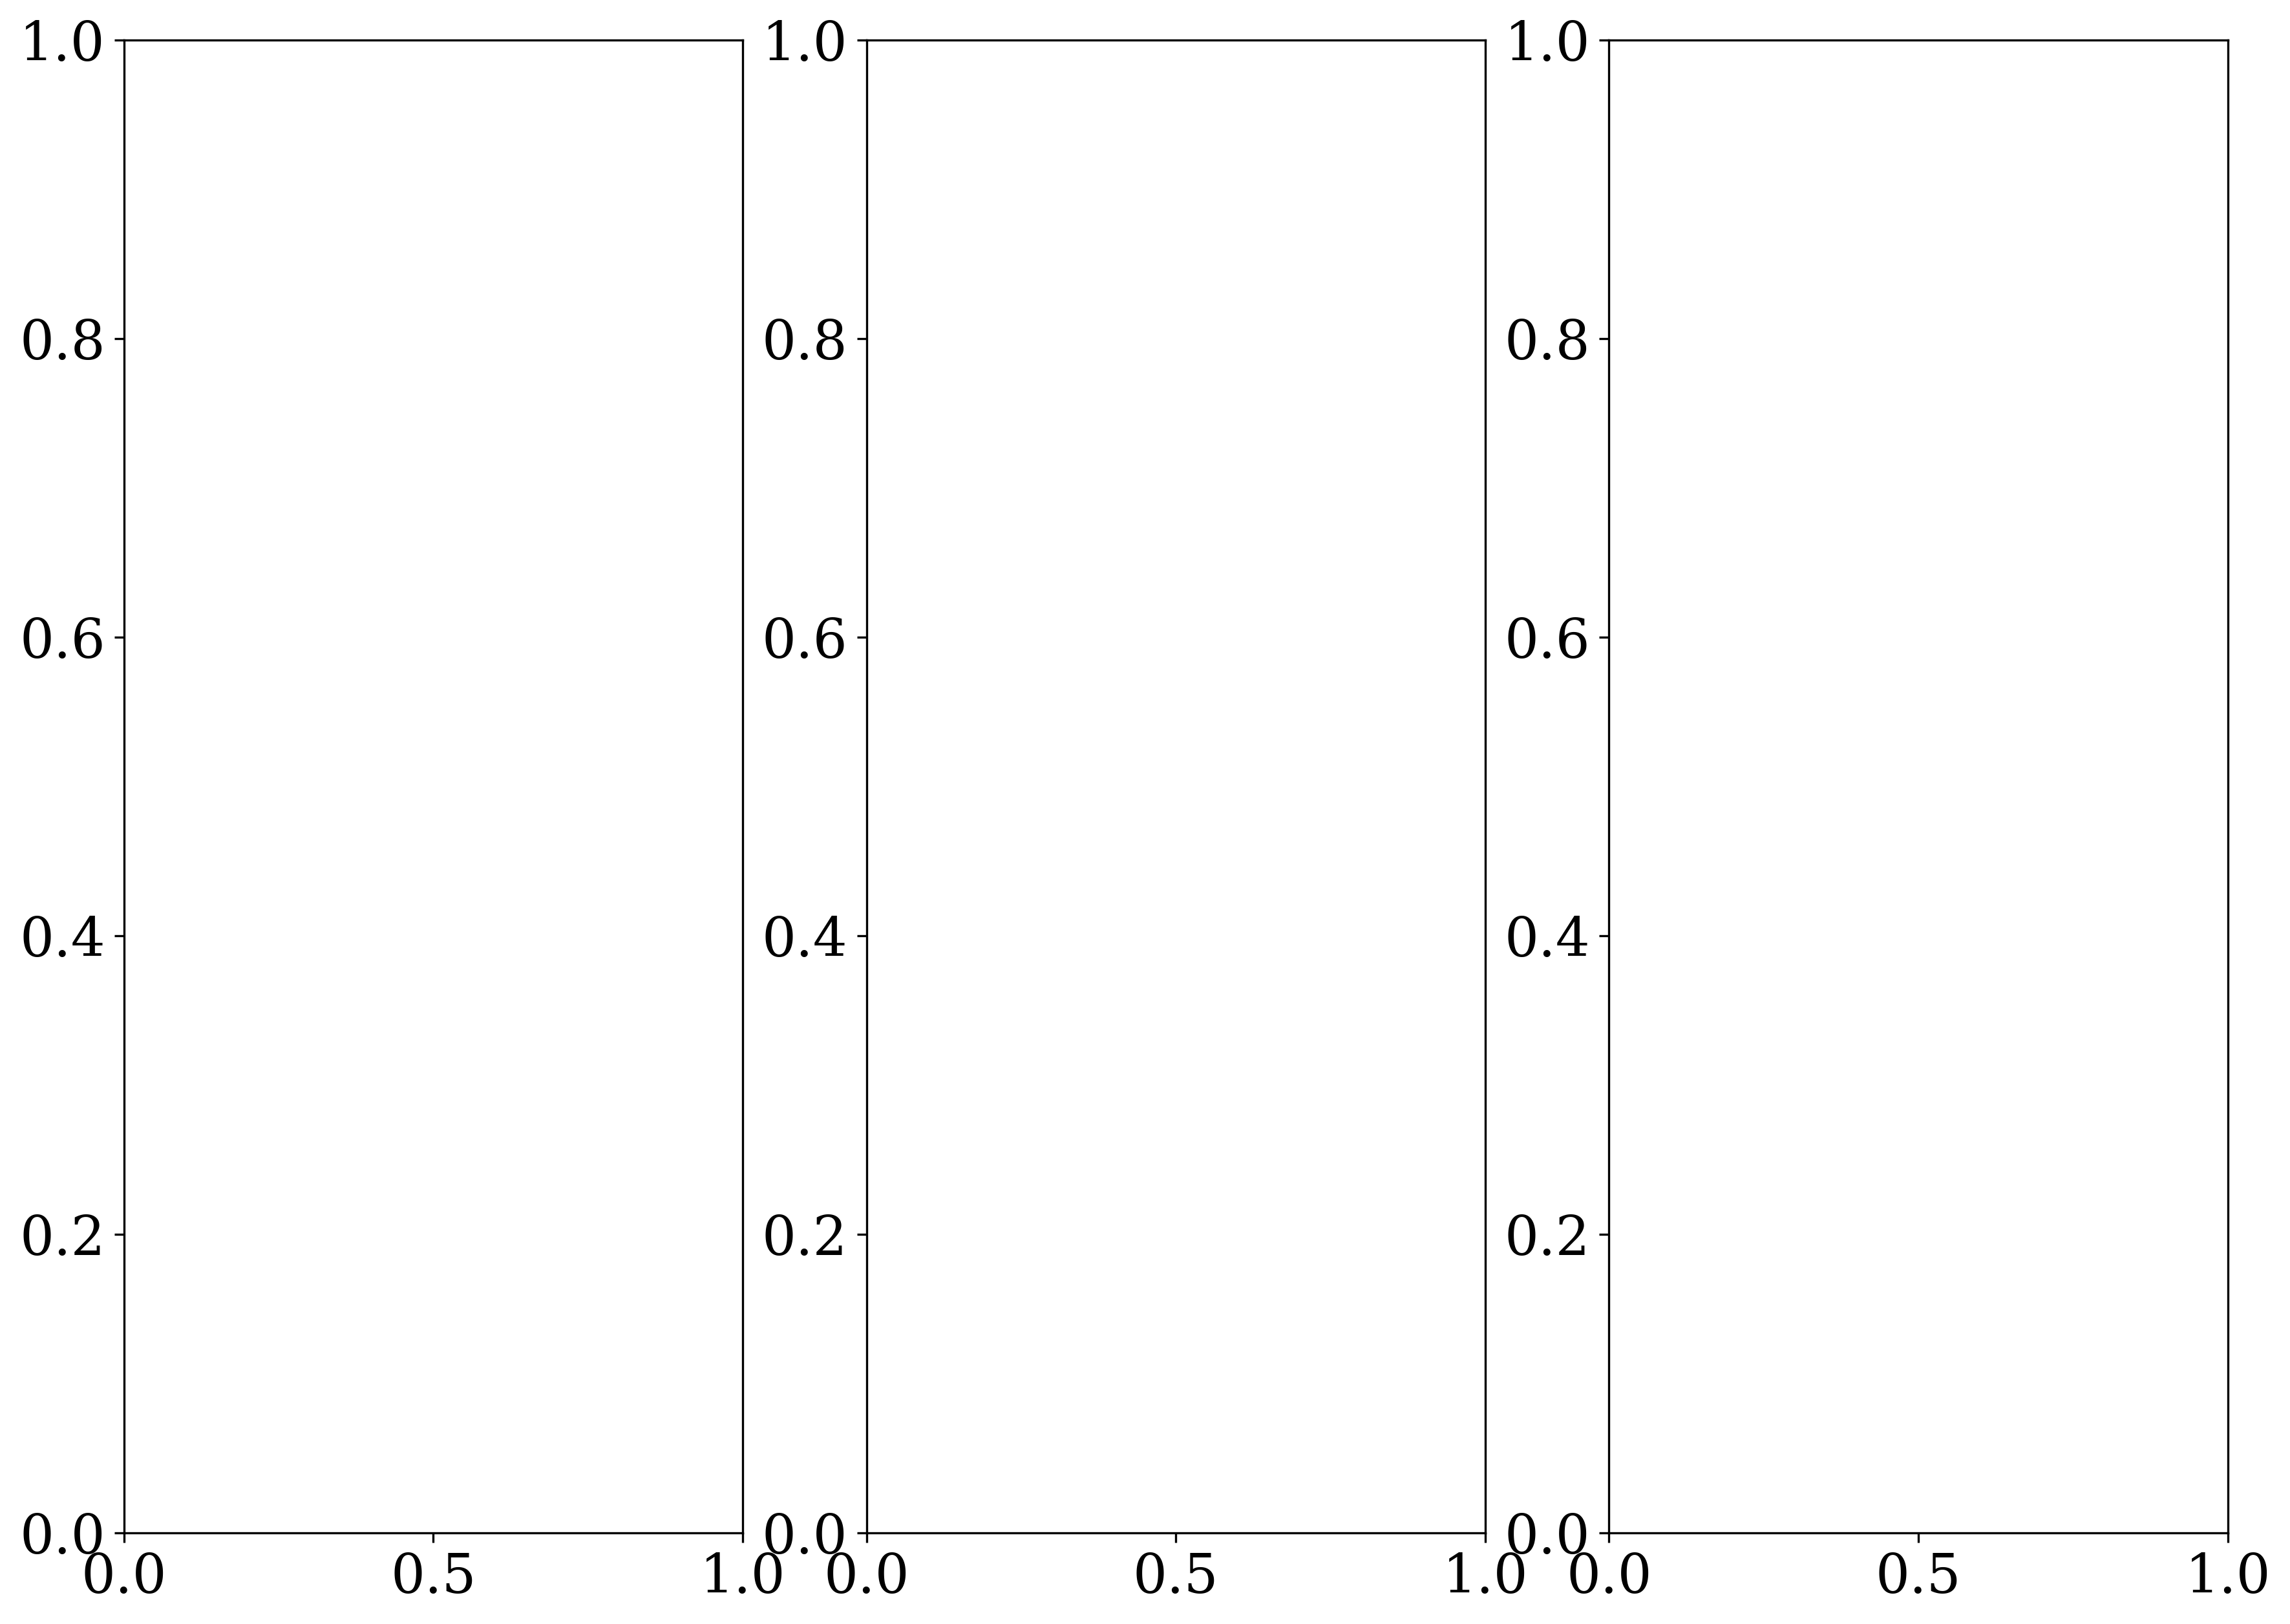

In [40]:
colors = cm.viridis(np.linspace(0, 1, 3))

def model_exp_cos(alpha, A, B, C, D, E):
    return A * np.log(B * alpha) + C * np.cos(D * alpha + E )

alpha_fit = np.linspace(0, np.pi, 300)
gamma_fit_easy = model_exp_cos(alpha_fit, -np.pi, 0.674, -3, 0.813, 2/10)


fig, ax = plt.subplots(1, 3, figsize=(14, 10))

# Tensors
ax[0].plot(alpha_ij, gamma_ij_t_10_8, '*', color=colors[0], label='pulsar pair', ms=20)    
ax[0].plot(alpha, hd, '-', color='red', label='closed form (Hellings & Downs)')
ax[0].set_xlabel(r'$\alpha_{ij}$')
ax[0].set_ylabel(r'$\gamma_{ij}$')
ax[0].grid(which='both', alpha=0.2)
ax[0].set_title('Tensor')
ax[0].set_xticks(custom_ticks)
ax[0].legend()
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(custom_pi_formatter))

# Vectors
ax[1].plot(alpha_ij, gamma_ij_v_10_8, '*', color=colors[1], label='pulsar pair', ms=20)
ax[1].plot(alpha_fit, gamma_fit_easy, '-', color='red', label='fitted curve')
ax[1].set_xlabel(r'$\alpha_{ij}$')
ax[1].set_ylabel(r'$\gamma_{ij}$')
ax[1].grid(which='both', alpha=0.2)
ax[1].set_title('Vector')
ax[1].set_xticks(custom_ticks)
ax[1].legend()
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(custom_pi_formatter))

# Scalars
ax[2].plot(alpha_ij, gamma_ij_s_10_8, '*', color=colors[2], label='pulsar pair', ms=20)
ax[2].plot(alpha, hd_breathing, '-', color='red', label='closed form (breathing)')
ax[2].set_xlabel(r'$\alpha_{ij}$')
ax[2].set_ylabel(r'$\gamma_{ij}$')
ax[2].grid(which='both', alpha=0.2)
ax[2].legend()
ax[2].set_title('Scalar (breathing)')
ax[2].set_xticks(custom_ticks)
ax[2].xaxis.set_major_formatter(plt.FuncFormatter(custom_pi_formatter))


fig.suptitle('PTA Overlap Reduction Function')

plt.show()

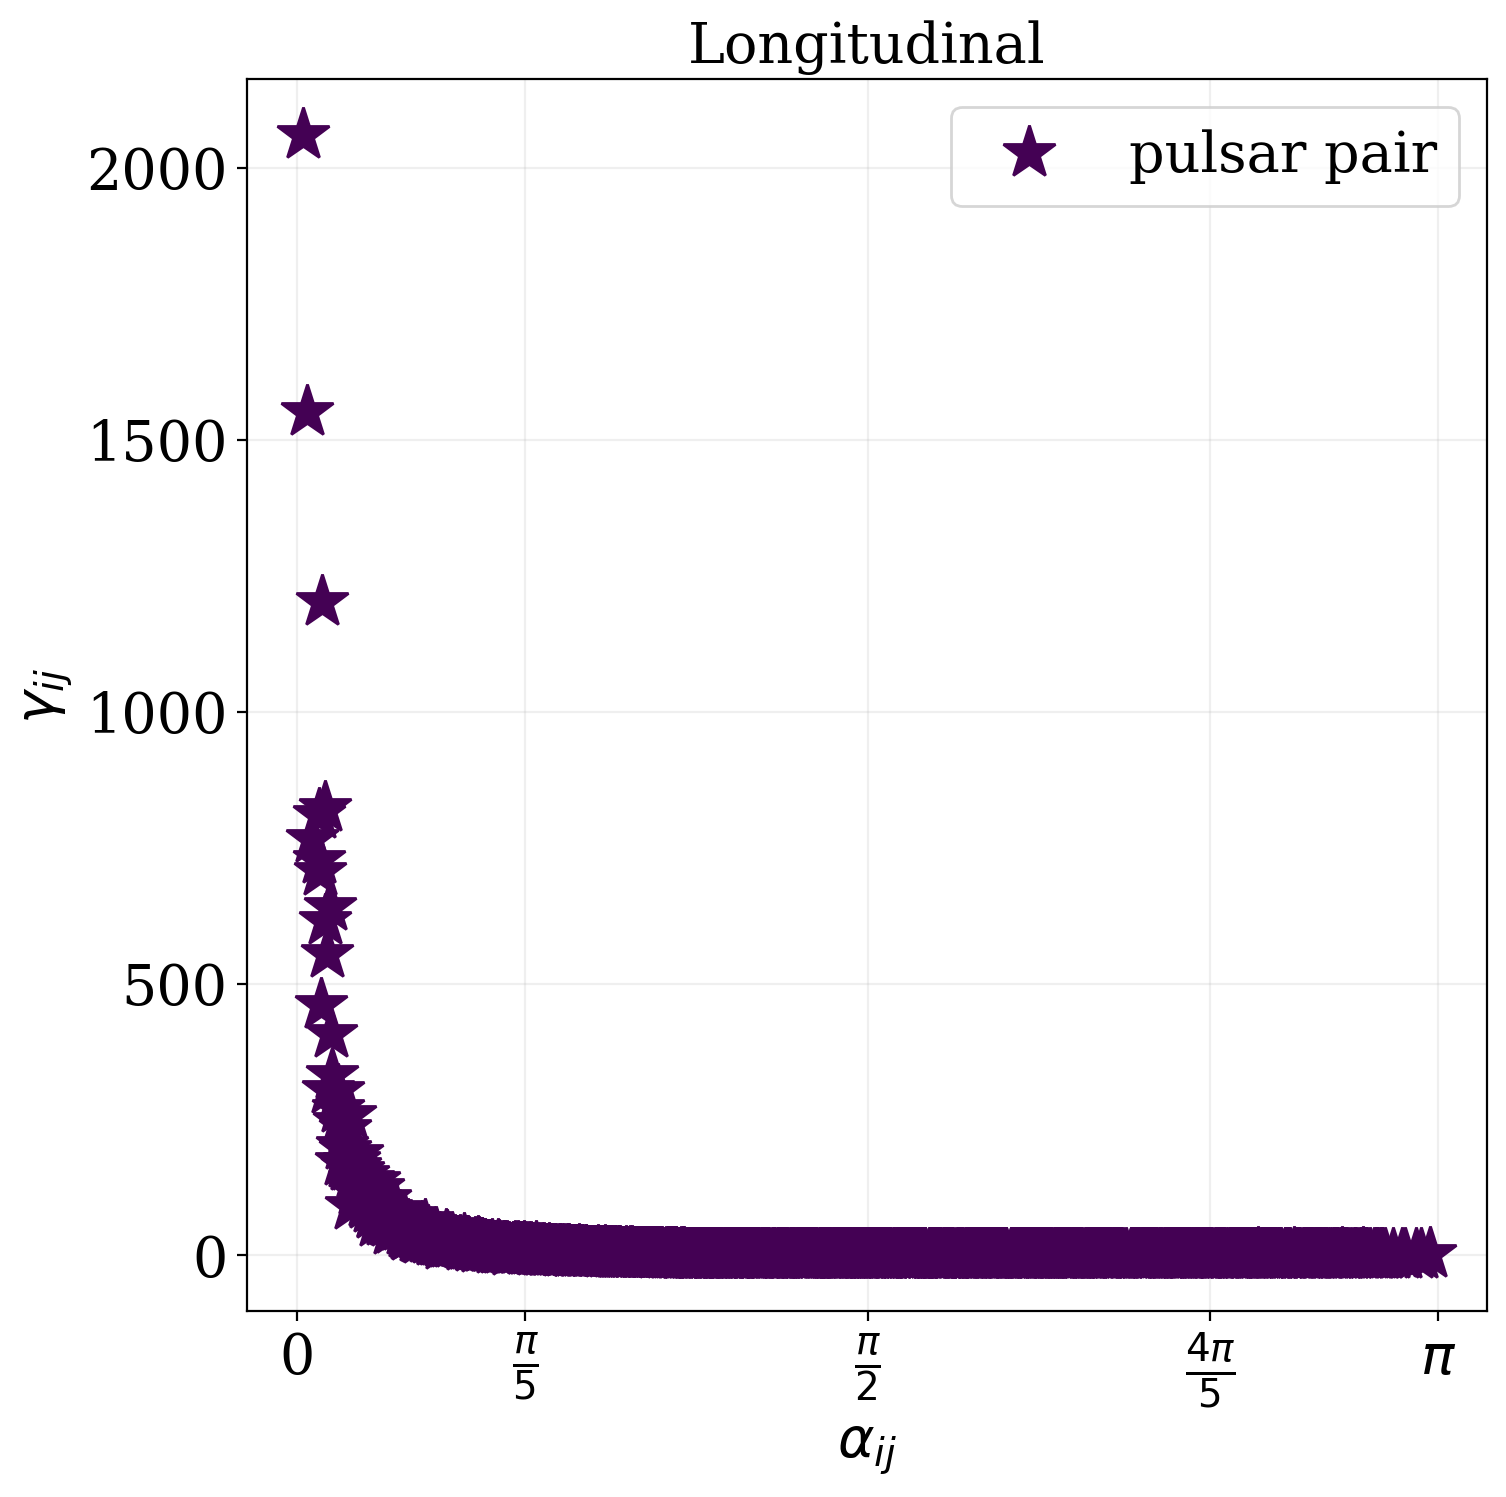

In [27]:
# plot longitudinal

plt.figure(figsize=(8, 8))

plt.plot(alpha_ij, gamma_ij_l_10_8, '*', color=colors[0], label='pulsar pair', ms=20)
plt.xlabel(r'$\alpha_{ij}$')
plt.ylabel(r'$\gamma_{ij}$')
plt.grid(which='both', alpha=0.2)
plt.title('Longitudinal')
plt.xticks(custom_ticks)
plt.legend()
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(custom_pi_formatter))

In [28]:
print(gamma_ij_V[:,0])

[ 1.94274107e-03-0.00095525j -5.55031942e-04-0.00049476j
 -1.51495033e-04+0.0002426j  ... -7.82580482e-05+0.00021194j
 -6.00843800e-04-0.00246871j -3.54413610e-03-0.00038001j]


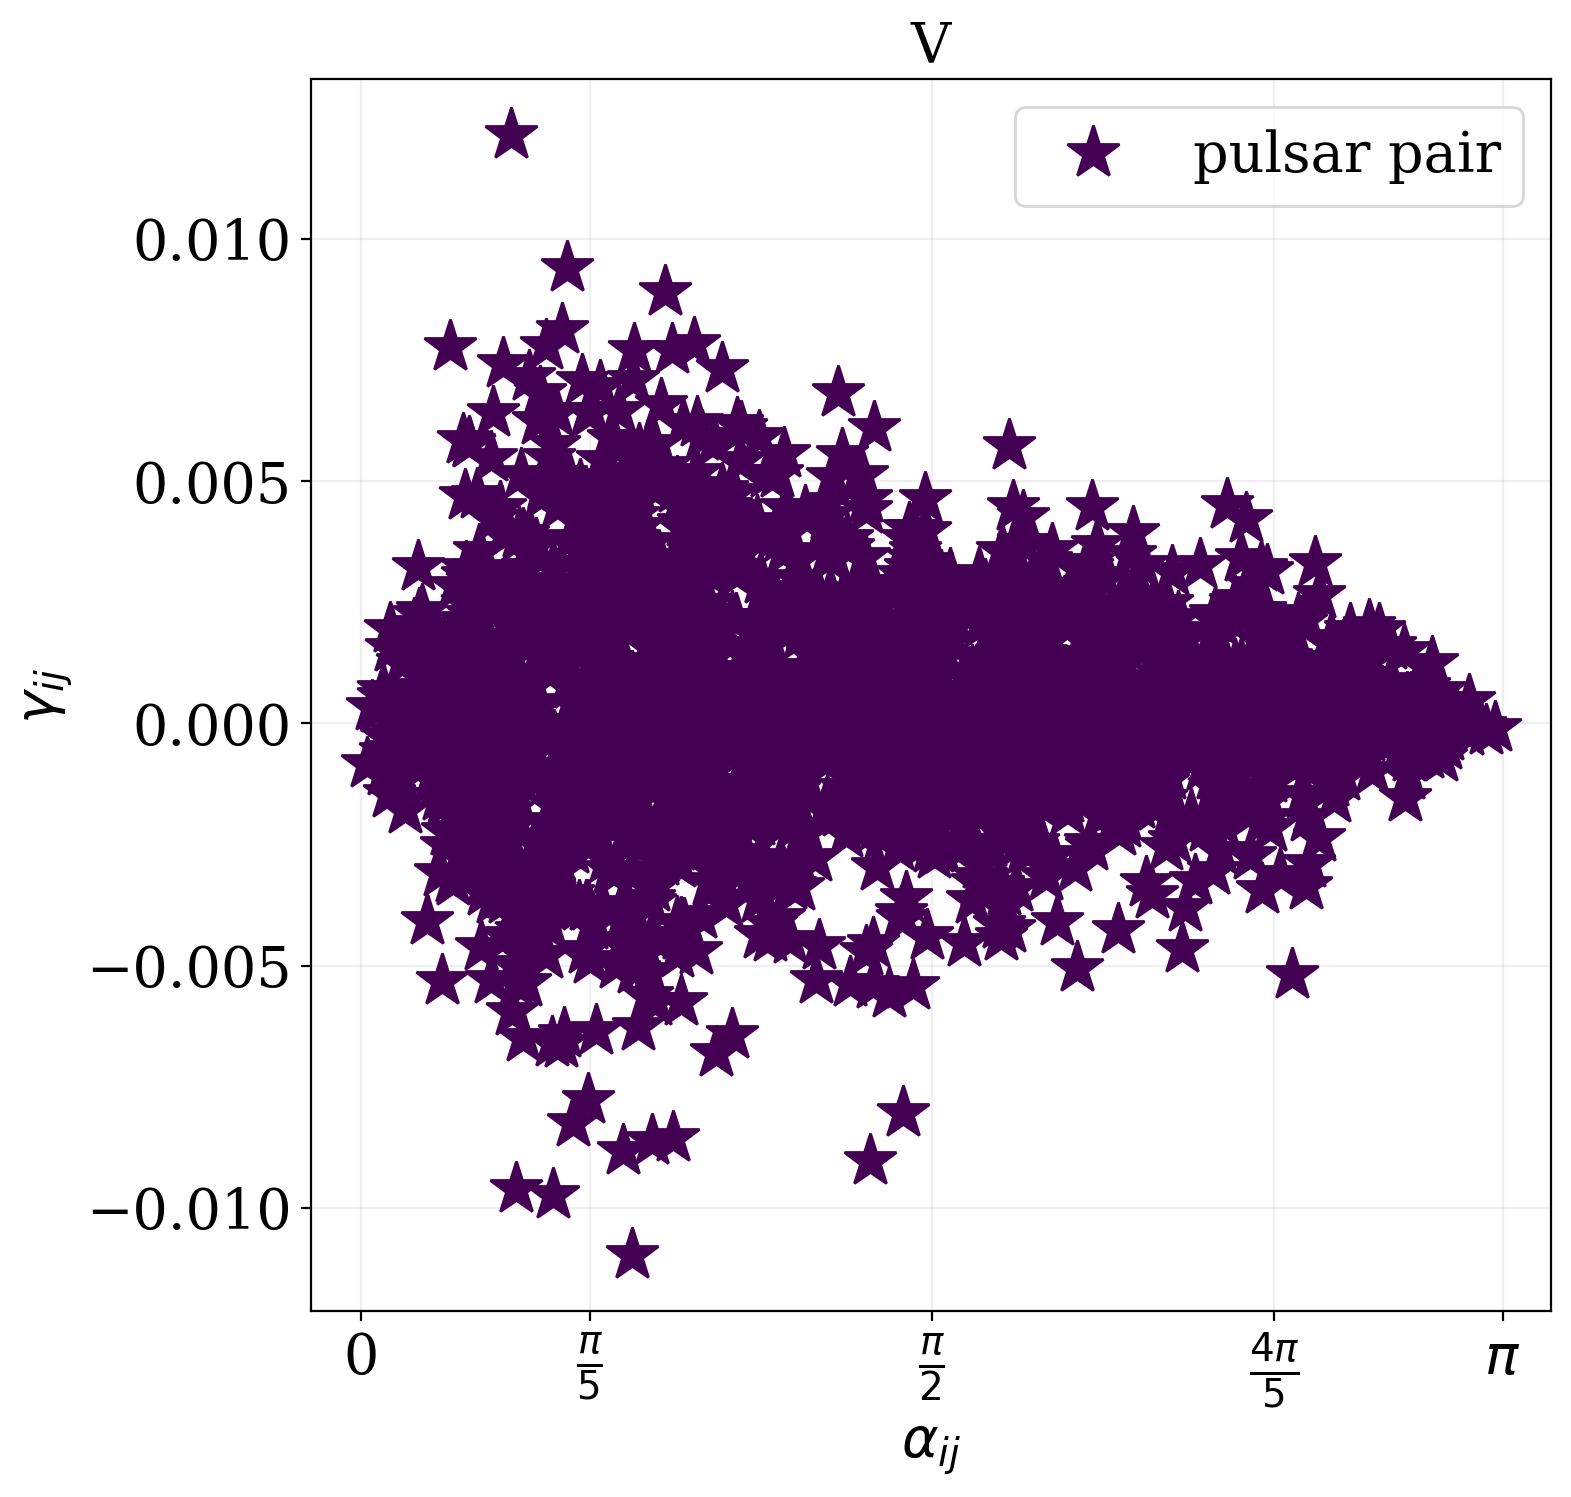

In [29]:
# plot circular

plt.figure(figsize=(8, 8))

plt.plot(alpha_ij, gamma_ij_V[:,0], '*', color=colors[0], label='pulsar pair', ms=20)
plt.xlabel(r'$\alpha_{ij}$')
plt.ylabel(r'$\gamma_{ij}$')
plt.grid(which='both', alpha=0.2)
plt.title('V')
plt.xticks(custom_ticks)
plt.legend()
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(custom_pi_formatter))

$\gamma_{ij}^{\ell}$ as a function of the angular separation between pulsars for tensor, vector and scalar (breathing) polarization modes

In [30]:
gamma1_ij_t = []
gamma1_ij_v = []
gamma1_ij_s = []
gamma1_ij_l = []
gamma1_ij_V = []
alpha_ij = []
ell=1
psi = 0
for i in range(N):
    for j in range(i+1, N):
        alpha_ij.append(np.arccos(np.dot(pulsar_xyz[i], pulsar_xyz[j])))
        gamma1_ij_t.append(AngularResponse.R_ell_pairwise(ell, pulsar_xyz[i], pulsar_xyz[j], d[i], d[j], f, 't', psi))
        gamma1_ij_v.append(AngularResponse.R_ell_pairwise(ell, pulsar_xyz[i], pulsar_xyz[j], d[i], d[j], f, 'v', psi))
        gamma1_ij_s.append(AngularResponse.R_ell_pairwise(ell, pulsar_xyz[i], pulsar_xyz[j], d[i], d[j], f, 's', psi))
        gamma1_ij_l.append(AngularResponse.R_ell_pairwise(ell, pulsar_xyz[i], pulsar_xyz[j], d[i], d[j], f, 'l', psi))
        gamma1_ij_V.append(AngularResponse.R_ell_pairwise(ell, pulsar_xyz[i], pulsar_xyz[j], d[i], d[j], f, 'V', psi))

gamma1_ij_t = np.array(gamma1_ij_t)
gamma1_ij_v = np.array(gamma1_ij_v)
gamma1_ij_s = np.array(gamma1_ij_s)
gamma1_ij_l = np.array(gamma1_ij_l)
gamma1_ij_V = np.array(gamma1_ij_V) 
alpha_ij = np.array(alpha_ij)

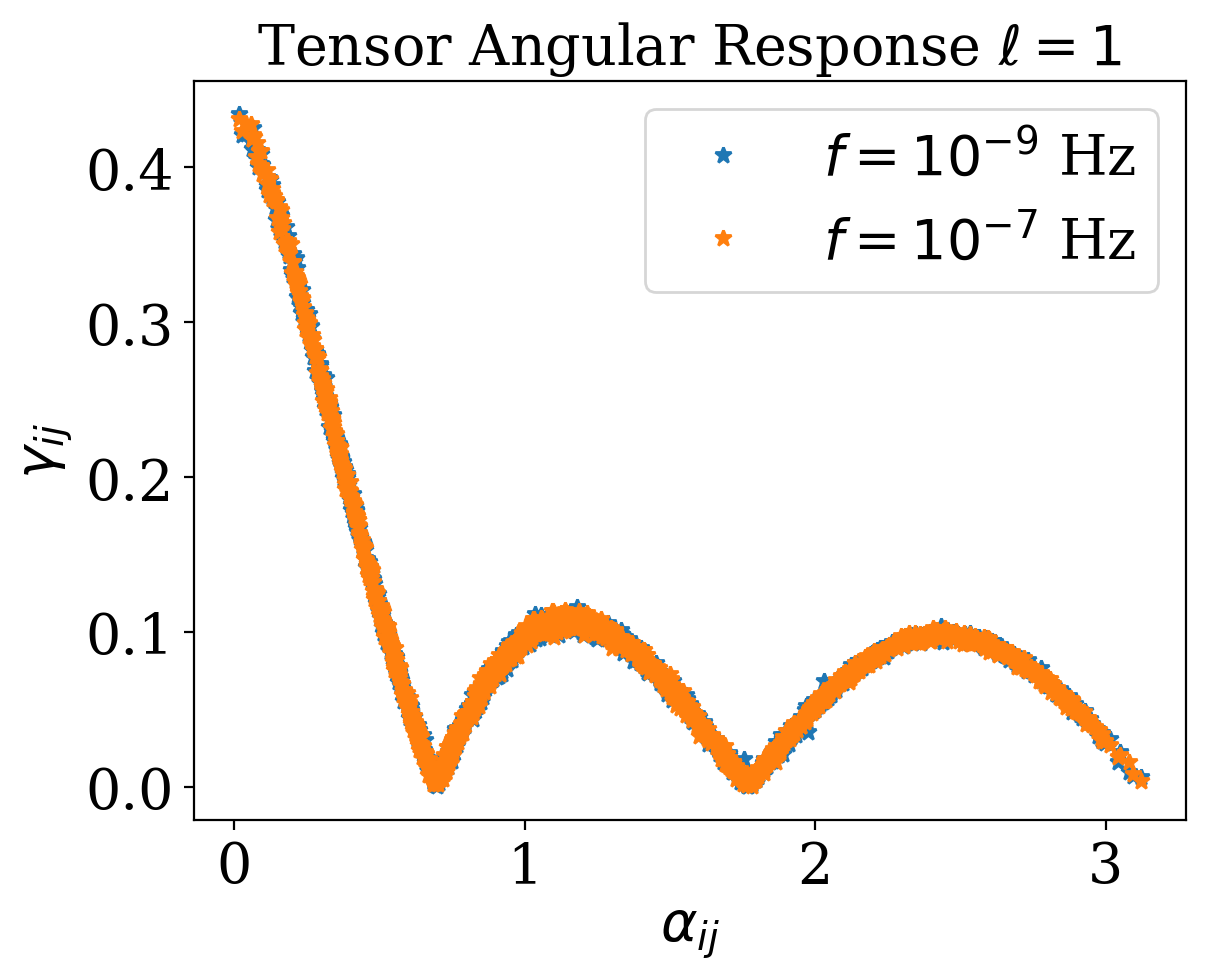

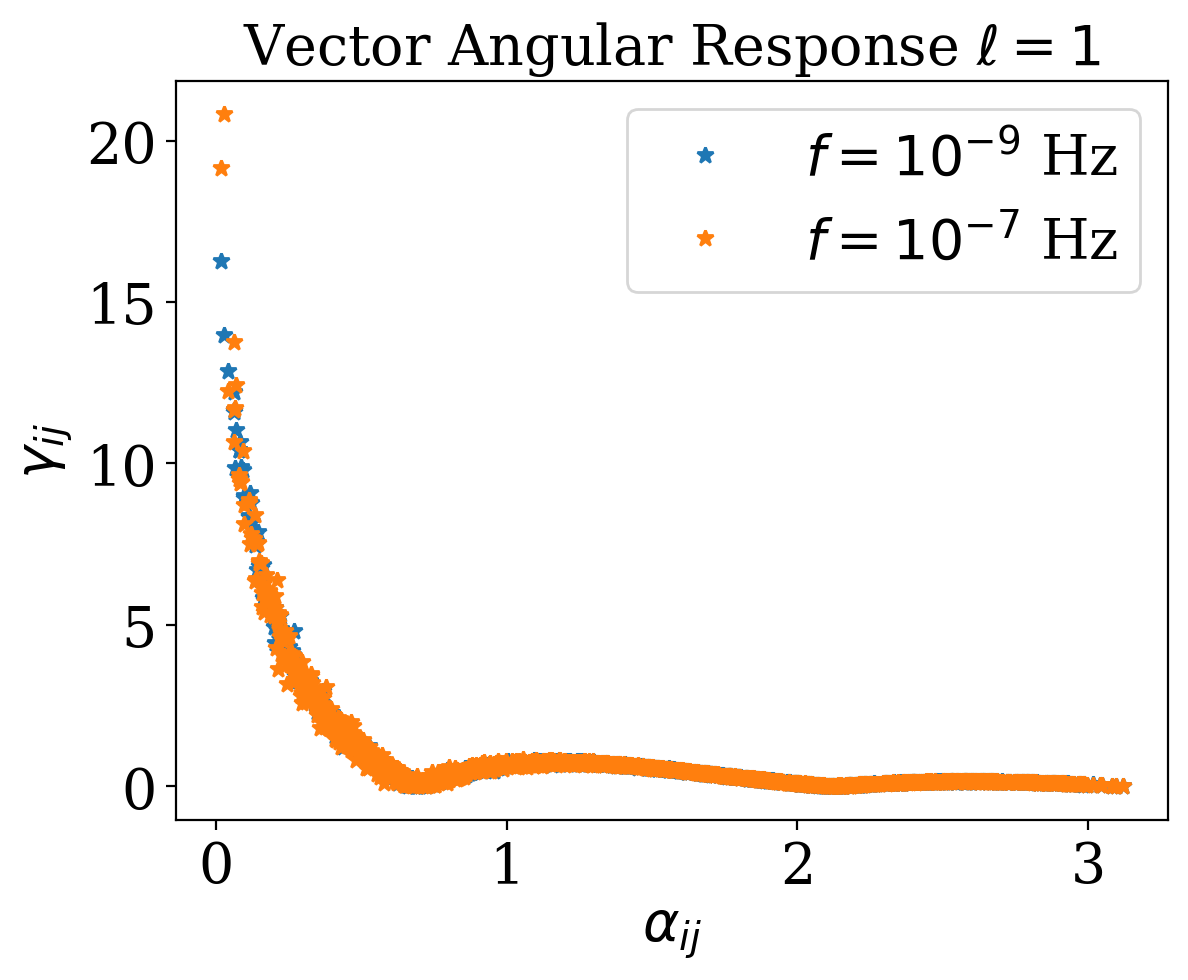

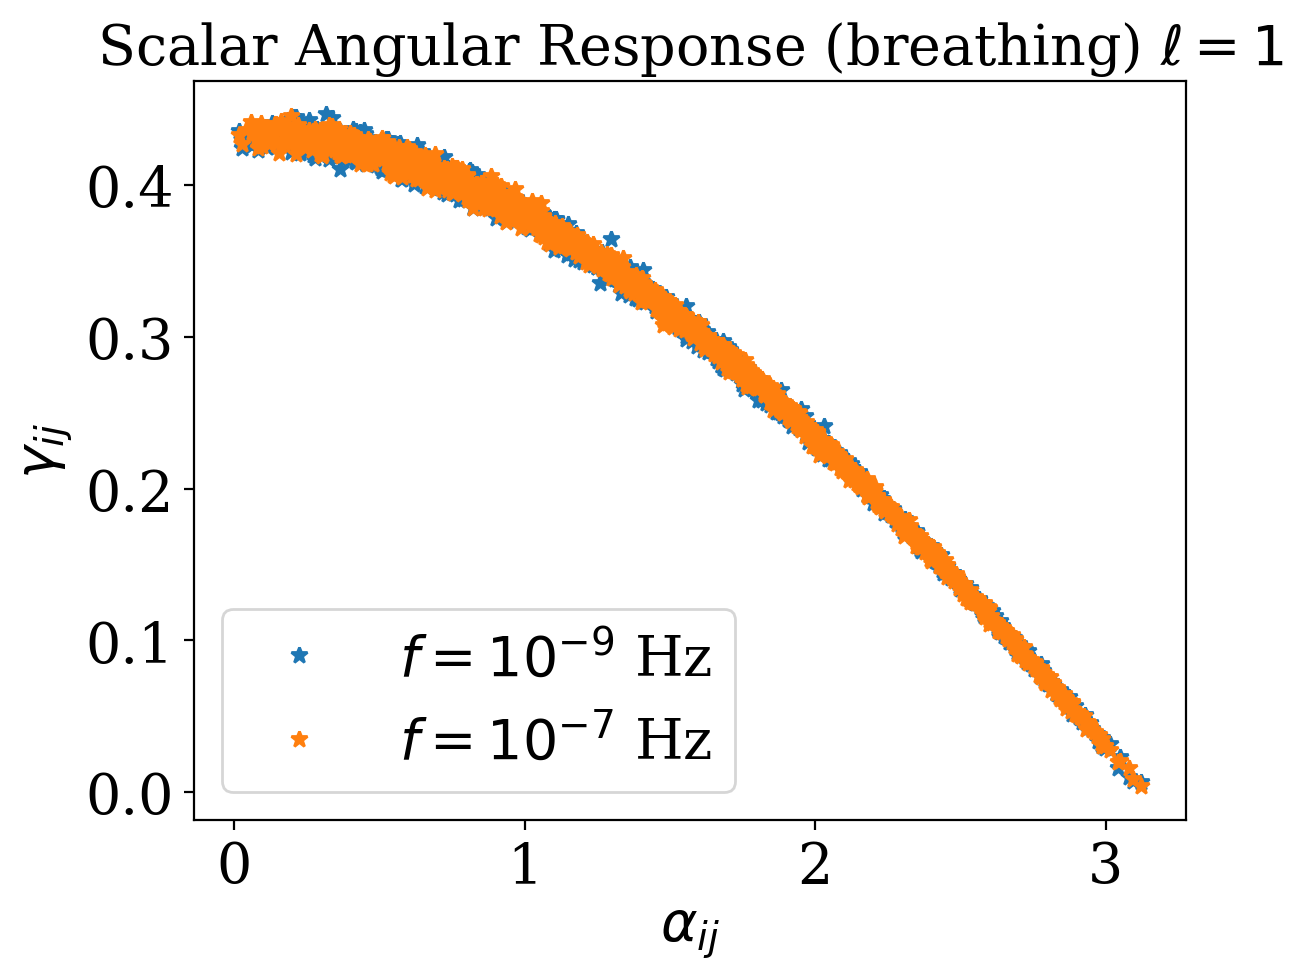

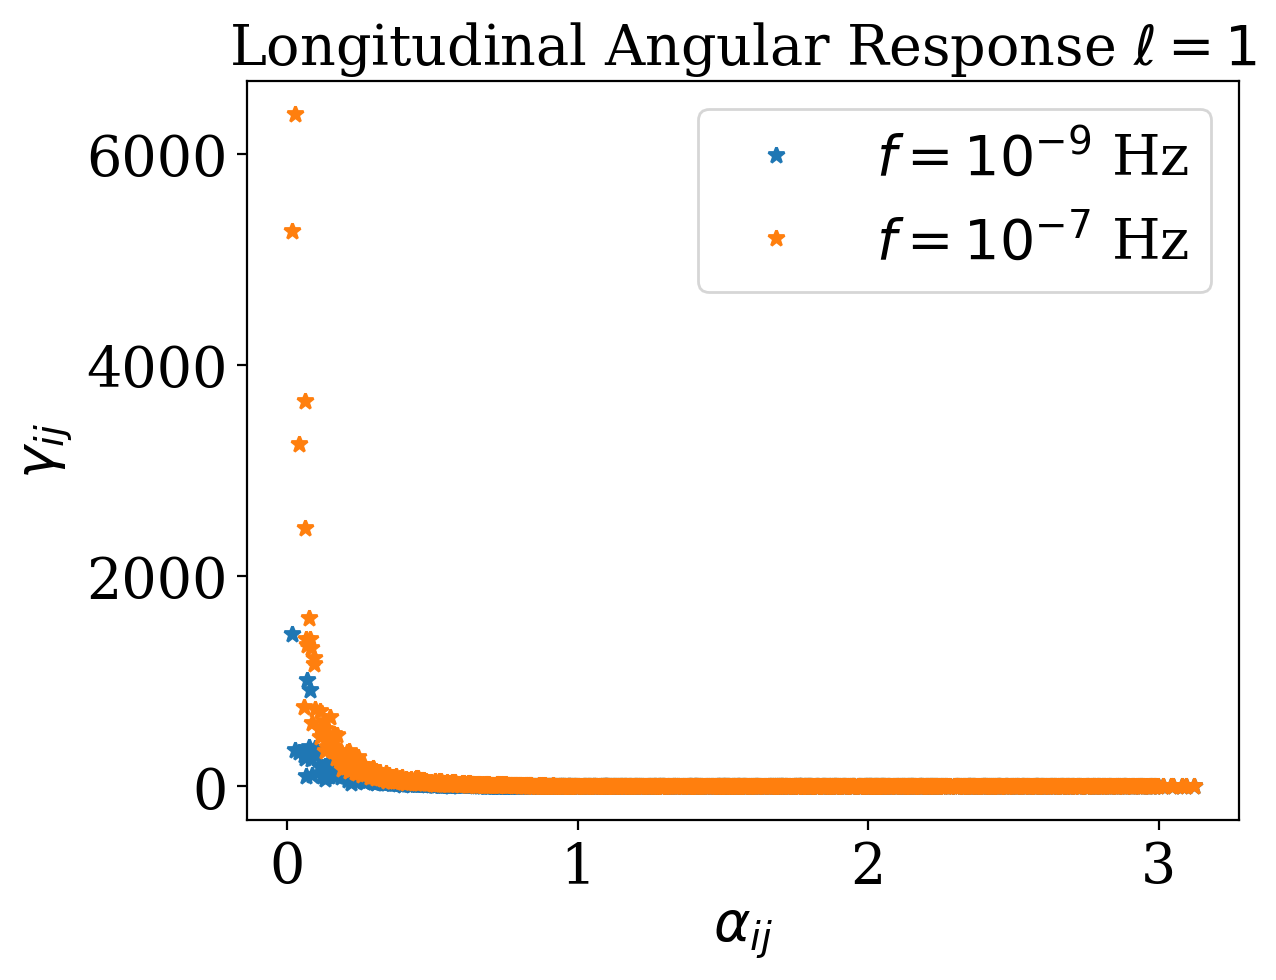

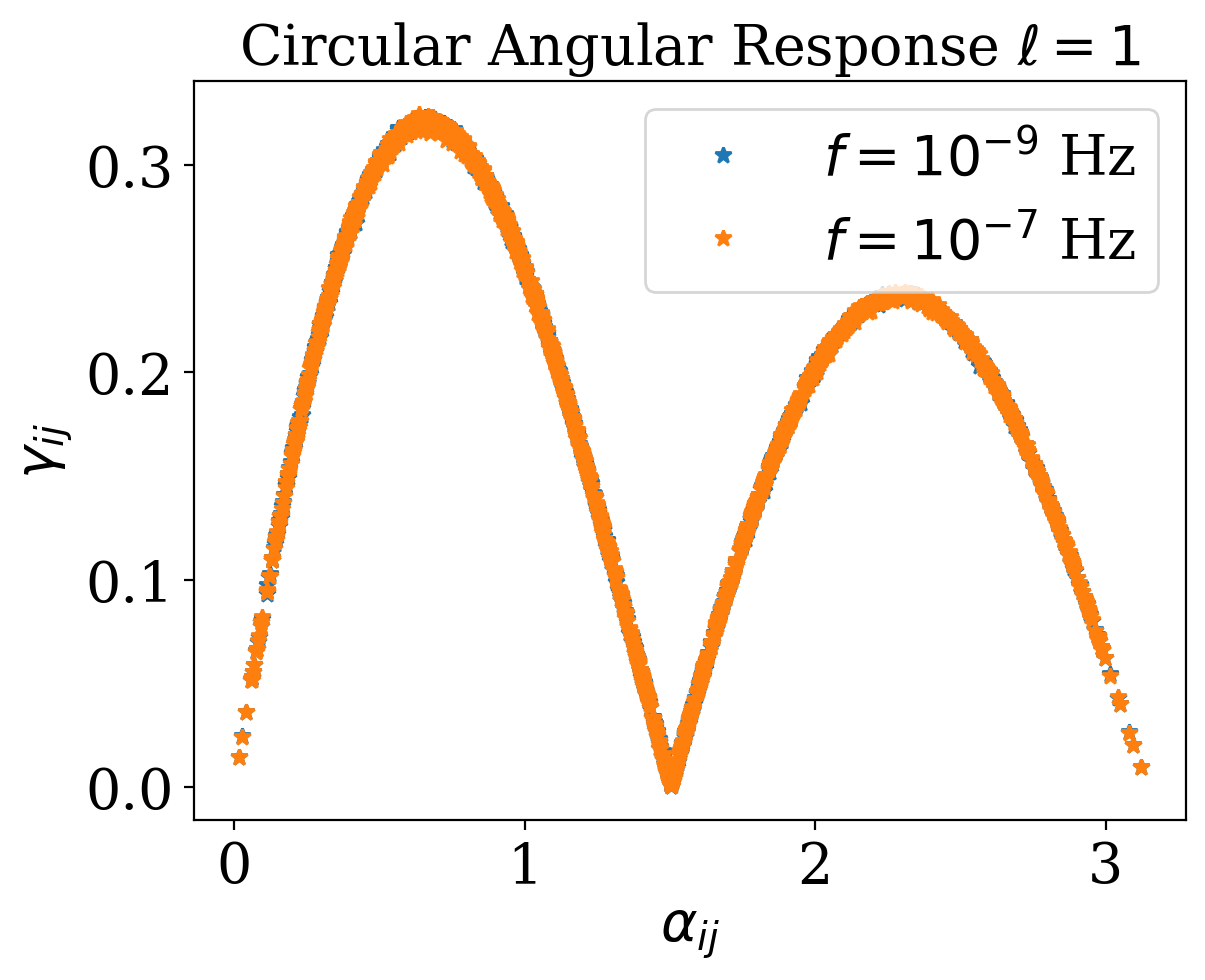

In [31]:
plt.plot(alpha_ij, gamma1_ij_t[:,0], '*', label='$f=10^{-9}$ Hz')
plt.plot(alpha_ij, gamma1_ij_t[:,-1], '*', label='$f=10^{-7}$ Hz')
plt.xlabel(r'$\alpha_{ij}$')
plt.ylabel(r'$\gamma_{ij}$')
plt.title('Tensor Angular Response $\ell=1$')
plt.legend()
plt.show()

plt.plot(alpha_ij, gamma1_ij_v[:,0], '*', label='$f=10^{-9}$ Hz')
plt.plot(alpha_ij, gamma1_ij_v[:,-1], '*', label='$f=10^{-7}$ Hz')
plt.xlabel(r'$\alpha_{ij}$')
plt.ylabel(r'$\gamma_{ij}$')
plt.title('Vector Angular Response $\ell=1$')
plt.legend()
plt.show()

plt.plot(alpha_ij, gamma1_ij_s[:,0], '*', label='$f=10^{-9}$ Hz')
plt.plot(alpha_ij, gamma1_ij_s[:,-1], '*', label='$f=10^{-7}$ Hz')
plt.xlabel(r'$\alpha_{ij}$')
plt.ylabel(r'$\gamma_{ij}$')
plt.title('Scalar Angular Response (breathing) $\ell=1$')
plt.legend()
plt.show()

plt.plot(alpha_ij, gamma1_ij_l[:,0], '*', label='$f=10^{-9}$ Hz')
plt.plot(alpha_ij, gamma1_ij_l[:,-1], '*', label='$f=10^{-7}$ Hz')
plt.xlabel(r'$\alpha_{ij}$')
plt.ylabel(r'$\gamma_{ij}$')
plt.title('Longitudinal Angular Response $\ell=1$')
plt.legend()
plt.show()

plt.plot(alpha_ij, gamma1_ij_V[:,0], '*', label='$f=10^{-9}$ Hz')
plt.plot(alpha_ij, gamma1_ij_V[:,-1], '*', label='$f=10^{-7}$ Hz')
plt.xlabel(r'$\alpha_{ij}$')
plt.ylabel(r'$\gamma_{ij}$')
plt.title('Circular Angular Response $\ell=1$')
plt.legend()
plt.show()

In [32]:
gamma2_ij_t = []
gamma2_ij_v = []
gamma2_ij_s = []
gamma2_ij_l = []
gamma2_ij_V = []
alpha_ij = []
ell=2
psi = 0
for i in range(N):
    for j in range(i+1, N):
        alpha_ij.append(np.arccos(np.dot(pulsar_xyz[i], pulsar_xyz[j])))
        gamma2_ij_t.append(AngularResponse.R_ell_pairwise(ell, pulsar_xyz[i], pulsar_xyz[j],  d[i], d[j], f, 't', psi))
        gamma2_ij_v.append(AngularResponse.R_ell_pairwise(ell, pulsar_xyz[i], pulsar_xyz[j],  d[i], d[j],f, 'v', psi))
        gamma2_ij_s.append(AngularResponse.R_ell_pairwise(ell, pulsar_xyz[i], pulsar_xyz[j],  d[i], d[j],f, 's', psi))
        gamma2_ij_l.append(AngularResponse.R_ell_pairwise(ell, pulsar_xyz[i], pulsar_xyz[j],  d[i], d[j],f, 'l', psi))
        gamma2_ij_V.append(AngularResponse.R_ell_pairwise(ell, pulsar_xyz[i], pulsar_xyz[j],  d[i], d[j],f, 'V', psi))

gamma2_ij_t = np.array(gamma2_ij_t)
gamma2_ij_v = np.array(gamma2_ij_v)
gamma2_ij_s = np.array(gamma2_ij_s)
gamma2_ij_l = np.array(gamma2_ij_l)
gamma2_ij_V = np.array(gamma2_ij_V)
alpha_ij = np.array(alpha_ij)

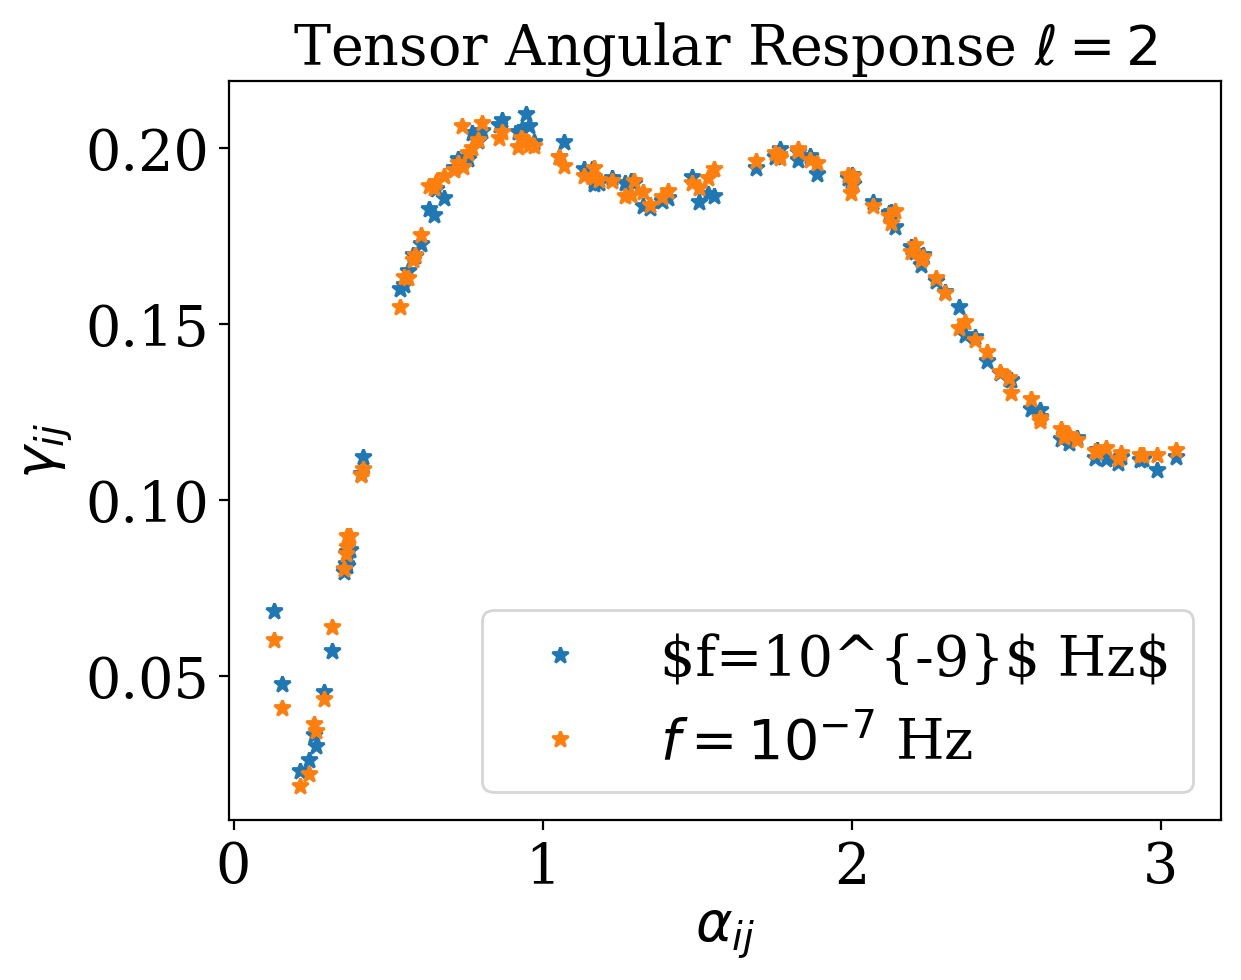

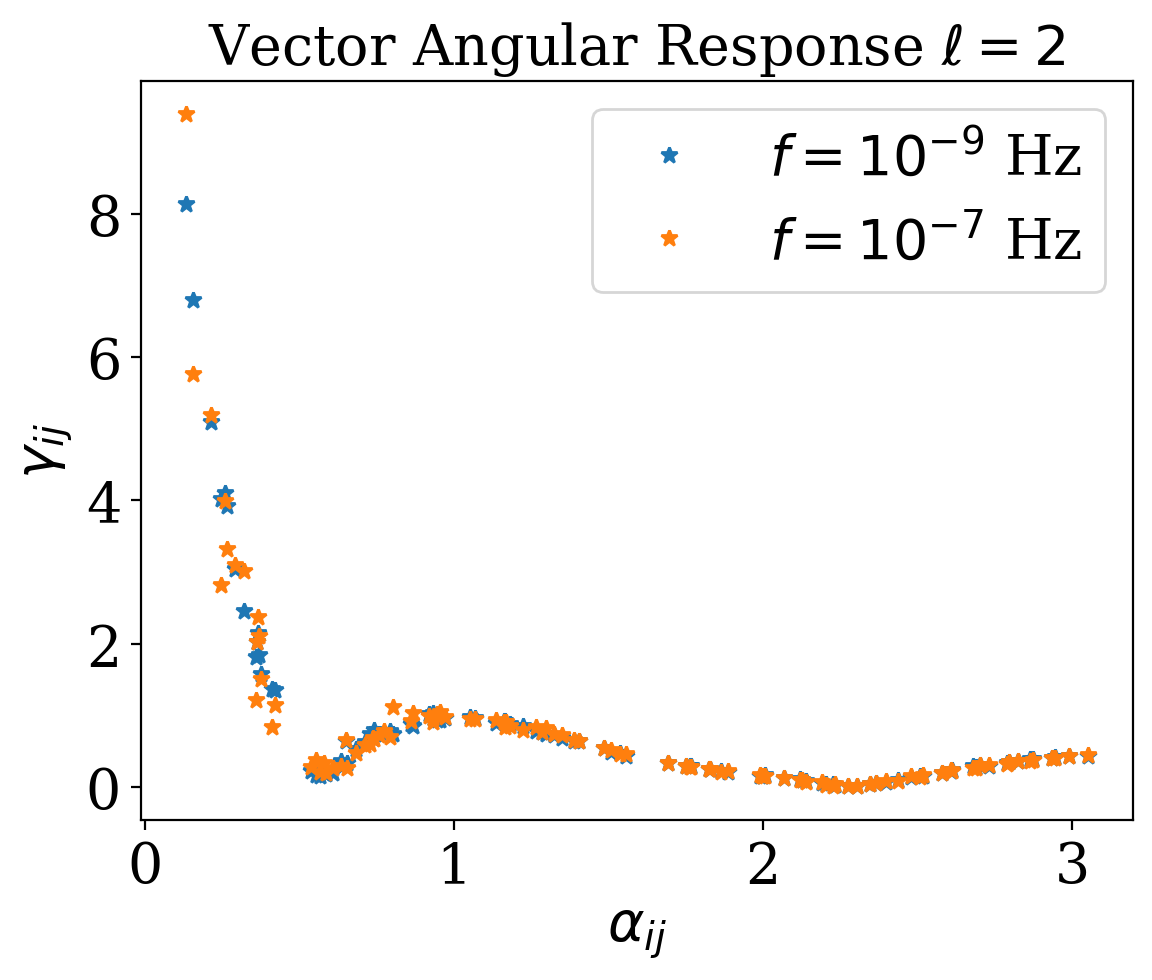

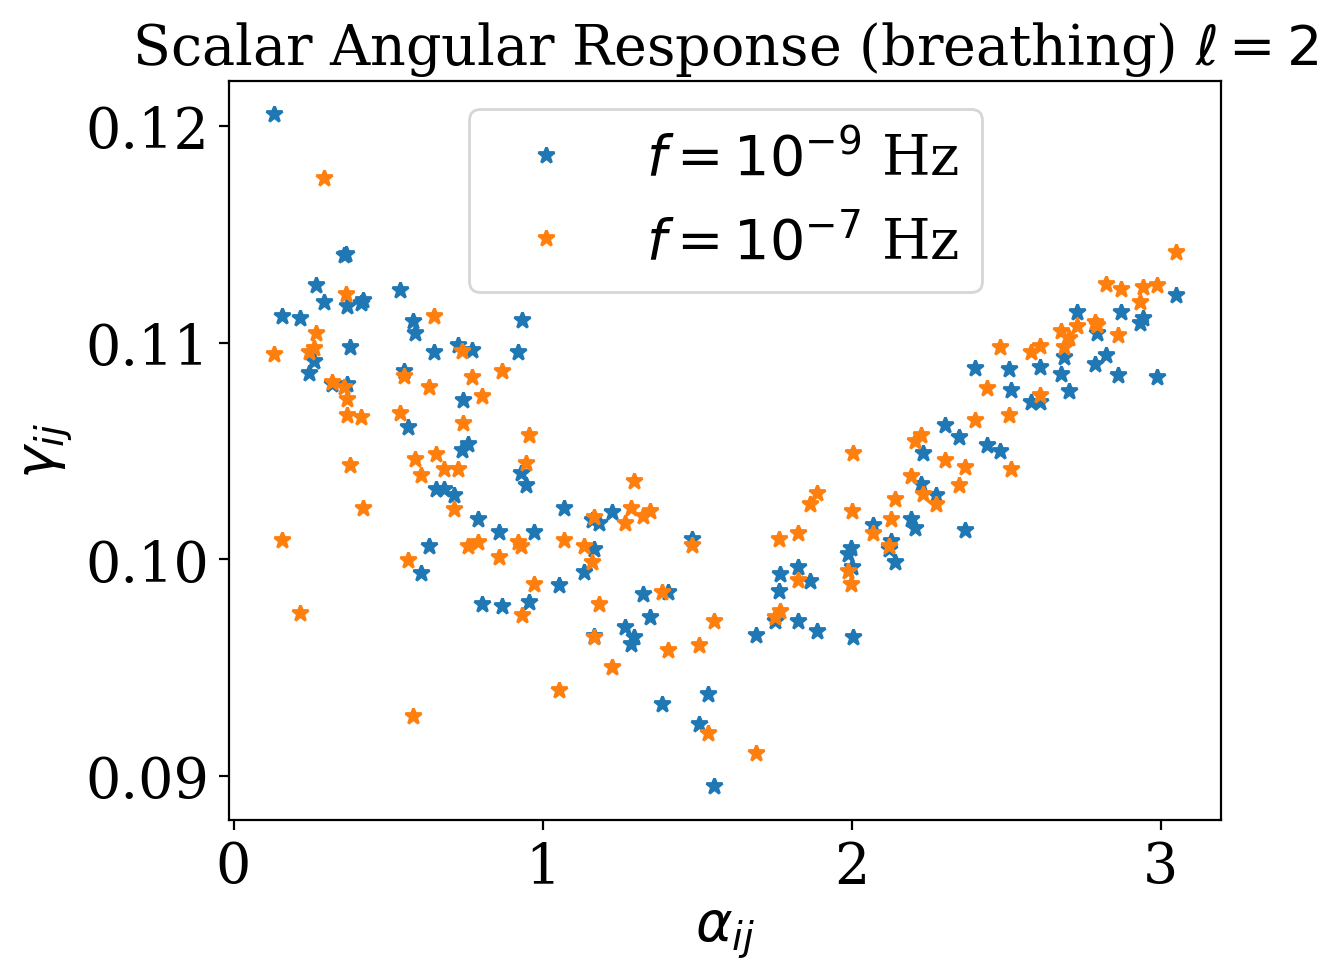

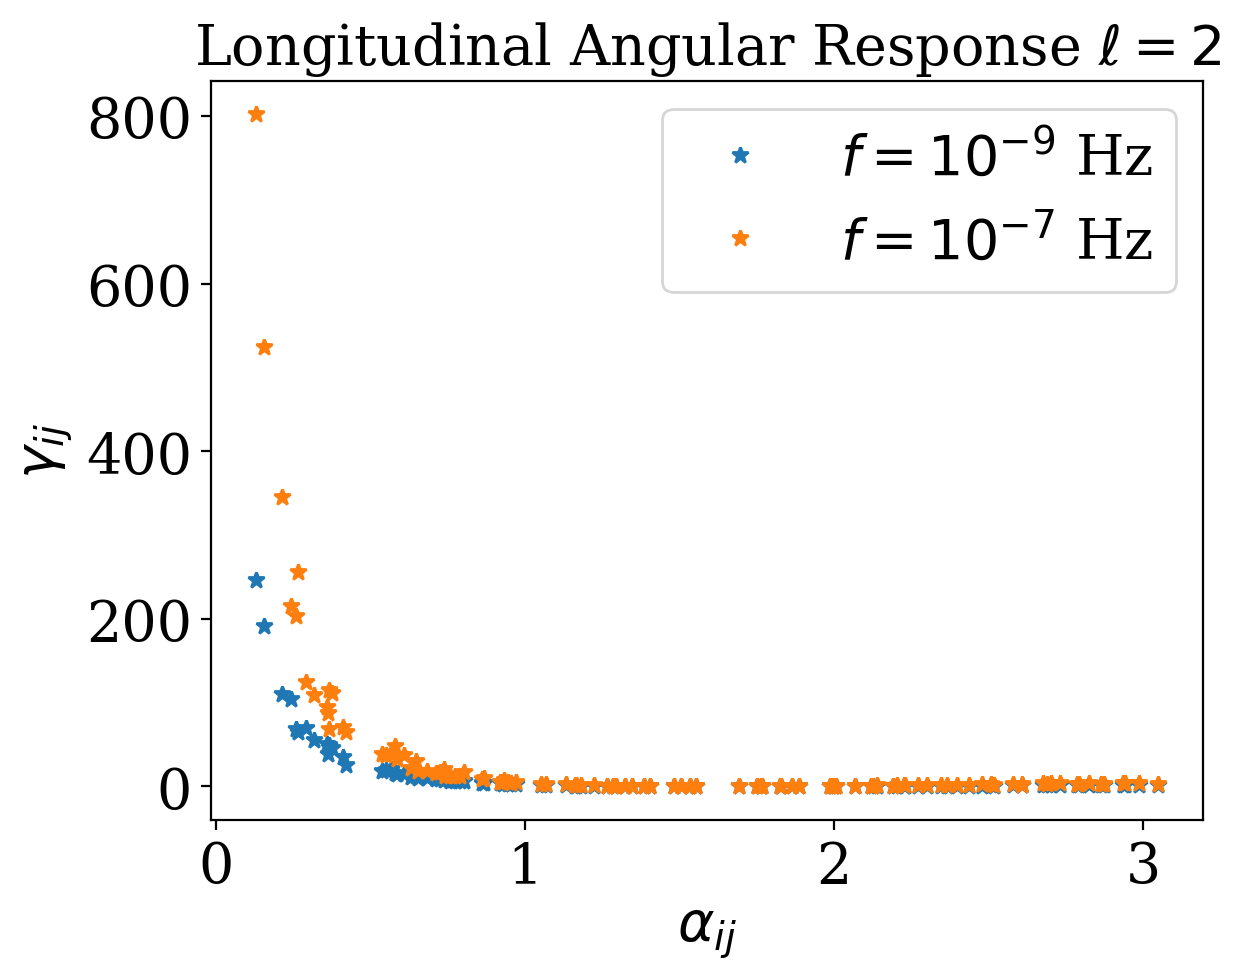

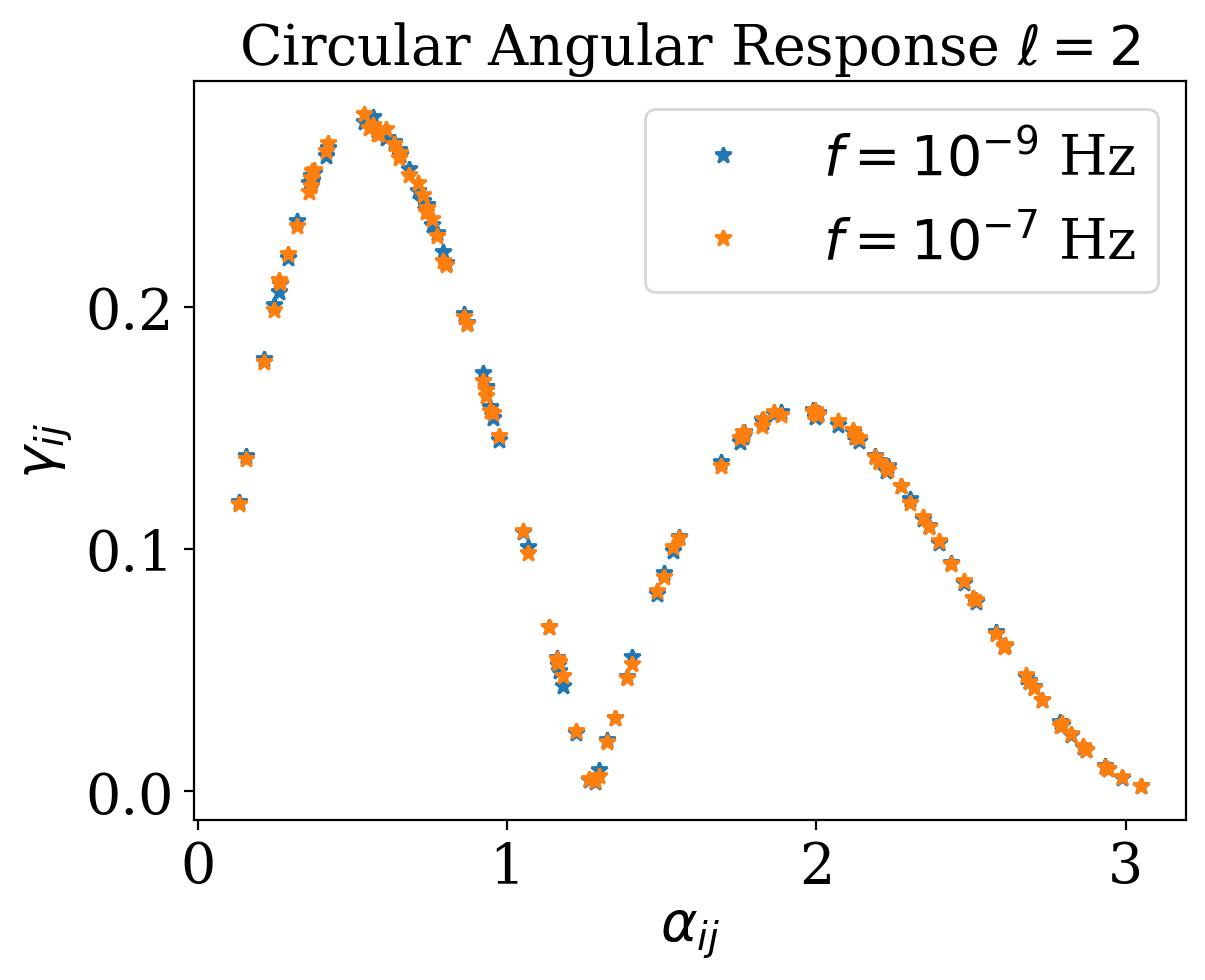

In [ ]:
plt.plot(alpha_ij, gamma2_ij_t[:,0], '*', label='$f=10^{-9}$ Hz$')
plt.plot(alpha_ij, gamma2_ij_t[:,-1], '*', label='$f=10^{-7}$ Hz')
plt.xlabel(r'$\alpha_{ij}$')
plt.ylabel(r'$\gamma_{ij}$')
plt.title('Tensor Angular Response $\ell=2$')
plt.legend()
plt.show()

plt.plot(alpha_ij, gamma2_ij_v[:,0], '*', label='$f=10^{-9}$ Hz')
plt.plot(alpha_ij, gamma2_ij_v[:,-1], '*', label='$f=10^{-7}$ Hz')
plt.xlabel(r'$\alpha_{ij}$')
plt.ylabel(r'$\gamma_{ij}$')
plt.title('Vector Angular Response $\ell=2$')
plt.legend()
plt.show()

plt.plot(alpha_ij, gamma2_ij_s[:,0], '*', label='$f=10^{-9}$ Hz')
plt.plot(alpha_ij, gamma2_ij_s[:,-1], '*', label='$f=10^{-7}$ Hz')
plt.xlabel(r'$\alpha_{ij}$')
plt.ylabel(r'$\gamma_{ij}$')
plt.title('Scalar Angular Response (breathing) $\ell=2$')
plt.legend()
plt.show()

plt.plot(alpha_ij, gamma2_ij_l[:,0], '*', label='$f=10^{-9}$ Hz')
plt.plot(alpha_ij, gamma2_ij_l[:,-1], '*', label='$f=10^{-7}$ Hz')
plt.xlabel(r'$\alpha_{ij}$')
plt.ylabel(r'$\gamma_{ij}$')
plt.title('Longitudinal Angular Response $\ell=2$')
plt.legend()
plt.show()

plt.plot(alpha_ij, gamma2_ij_V[:,0], '*', label='$f=10^{-9}$ Hz')
plt.plot(alpha_ij, gamma2_ij_V[:,-1], '*', label='$f=10^{-7}$ Hz')
plt.xlabel(r'$\alpha_{ij}$')
plt.ylabel(r'$\gamma_{ij}$')
plt.title('Circular Angular Response $\ell=2$')
plt.legend()
plt.show()

In [ ]:
gamma3_ij_t = []
gamma3_ij_v = []
gamma3_ij_s = []
gamma3_ij_l = []
gamma3_ij_V = []
alpha_ij = []
ell=3
psi = 0
for i in range(N):
    for j in range(i+1, N):
        alpha_ij.append(np.arccos(np.dot(pulsar_xyz[i], pulsar_xyz[j])))
        gamma3_ij_t.append(AngularResponse.R_ell_pairwise(ell, pulsar_xyz[i], pulsar_xyz[j], d[i], d[j], f, 't', psi))
        gamma3_ij_v.append(AngularResponse.R_ell_pairwise(ell, pulsar_xyz[i], pulsar_xyz[j], d[i], d[j],f, 'v', psi))
        gamma3_ij_s.append(AngularResponse.R_ell_pairwise(ell, pulsar_xyz[i], pulsar_xyz[j], d[i], d[j],f, 's', psi))
        gamma3_ij_l.append(AngularResponse.R_ell_pairwise(ell, pulsar_xyz[i], pulsar_xyz[j], d[i], d[j],f, 'l', psi))
        gamma3_ij_V.append(AngularResponse.R_ell_pairwise(ell, pulsar_xyz[i], pulsar_xyz[j], d[i], d[j],f, 'V', psi))

gamma3_ij_t = np.array(gamma3_ij_t)
gamma3_ij_v = np.array(gamma3_ij_v)
gamma3_ij_s = np.array(gamma3_ij_s)
gamma3_ij_l = np.array(gamma3_ij_l)
gamma3_ij_V = np.array(gamma3_ij_V)

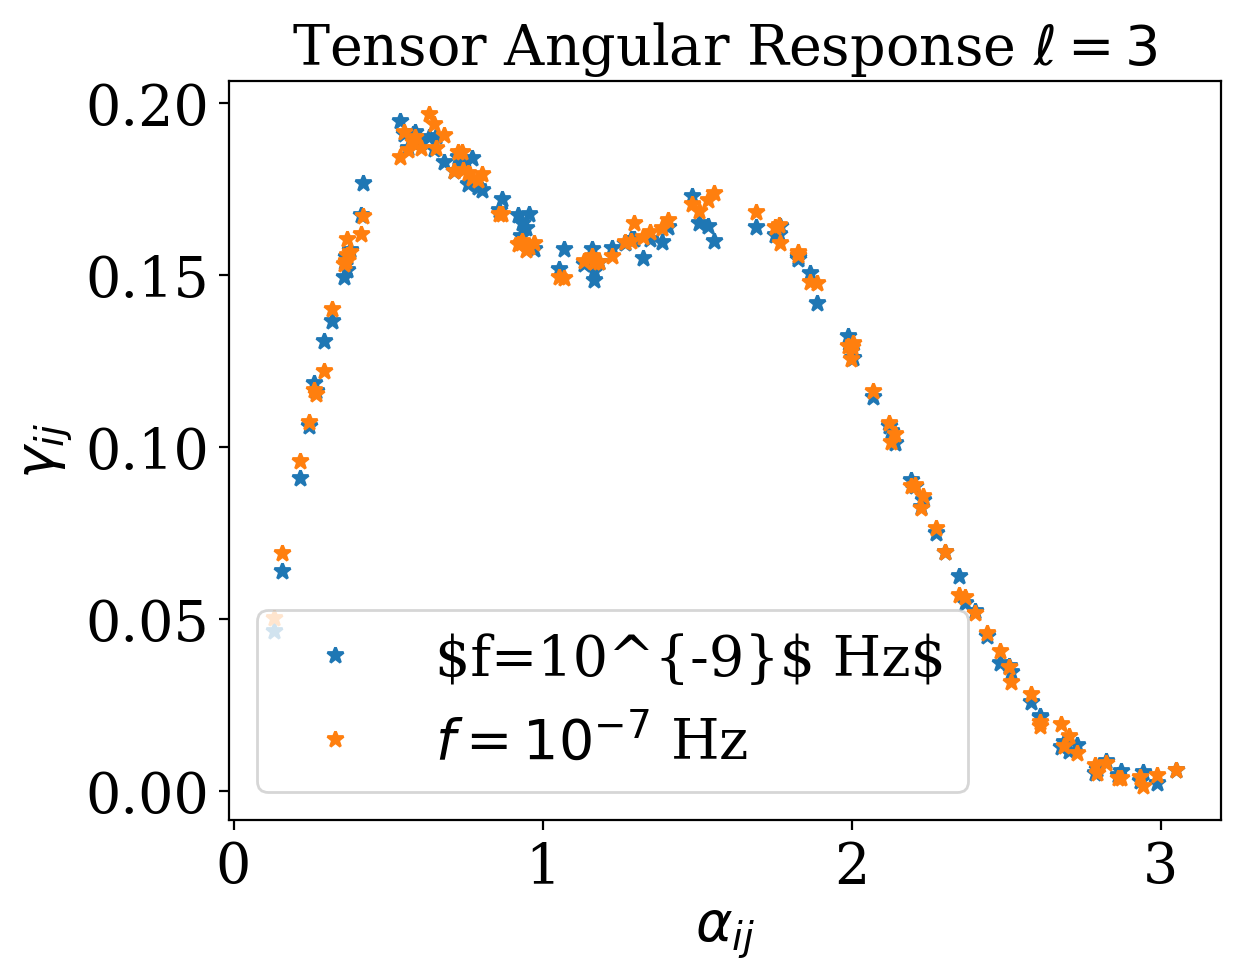

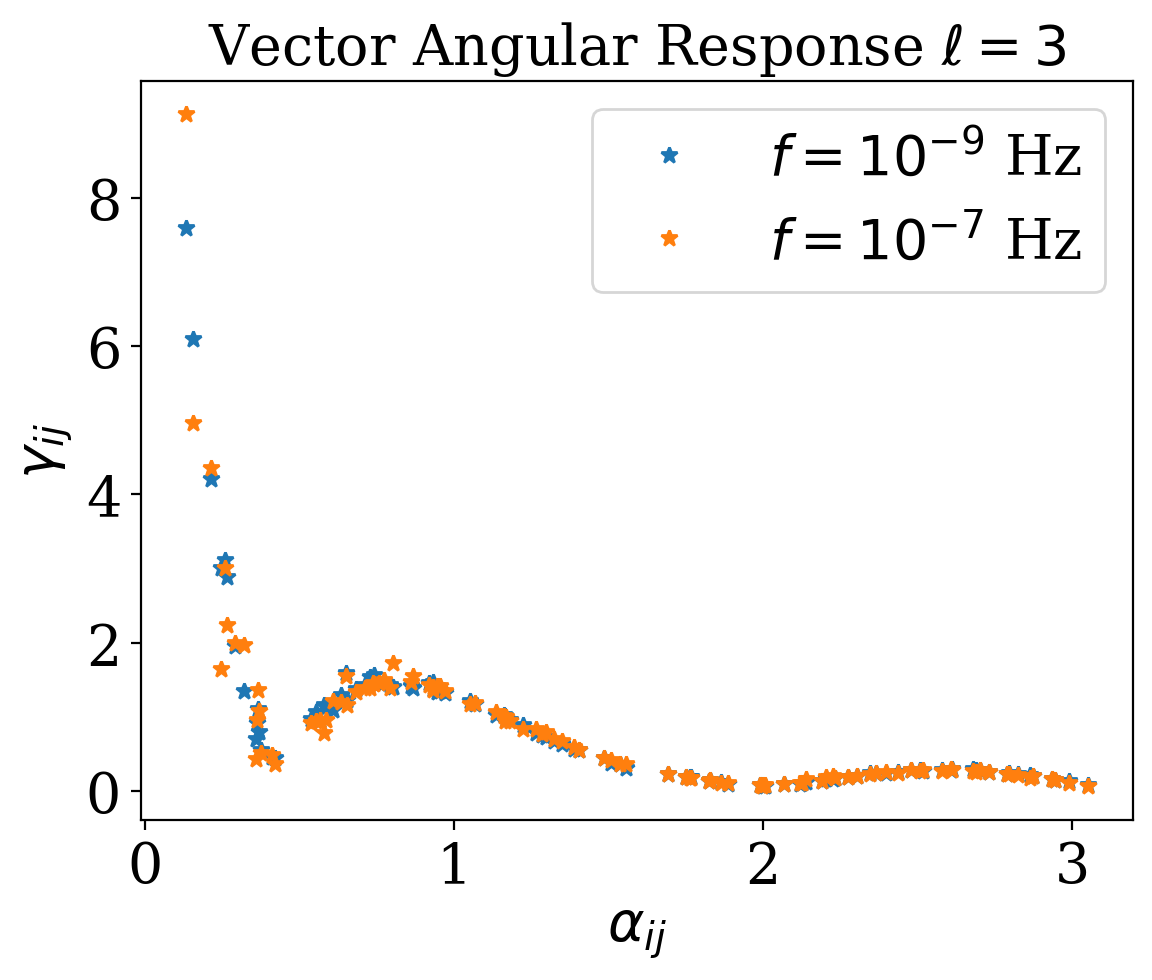

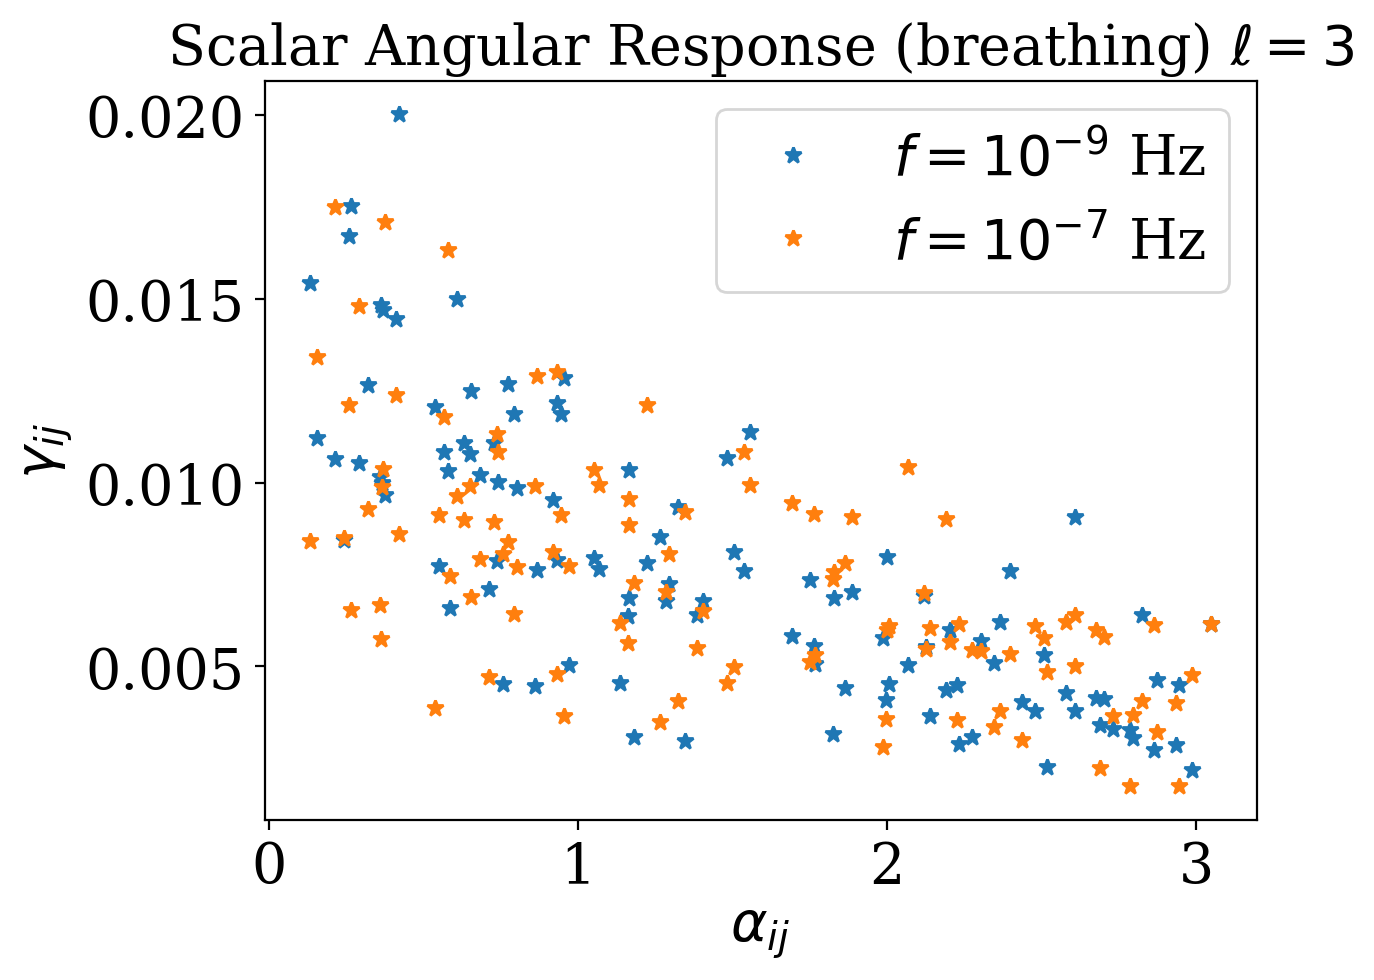

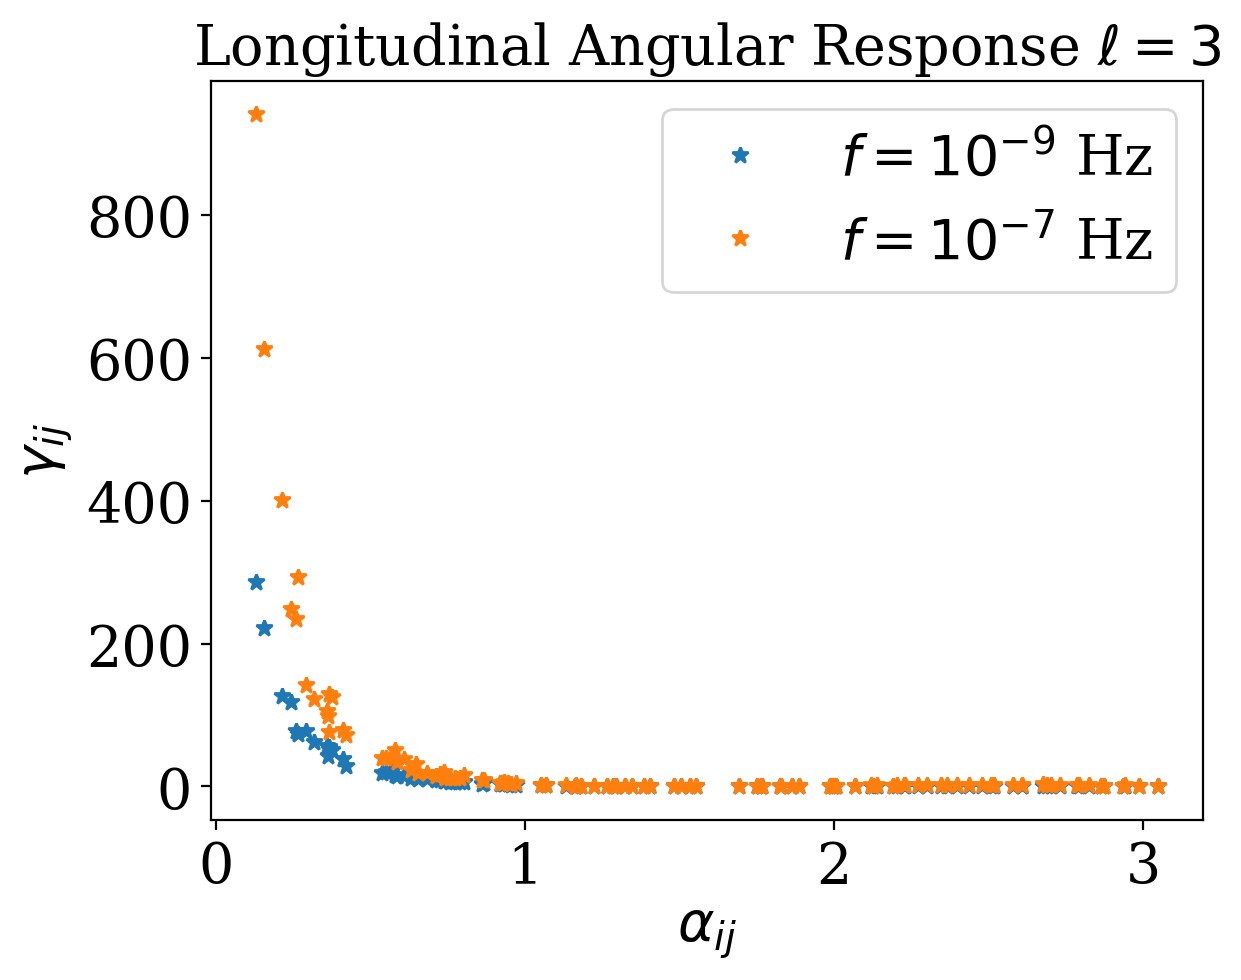

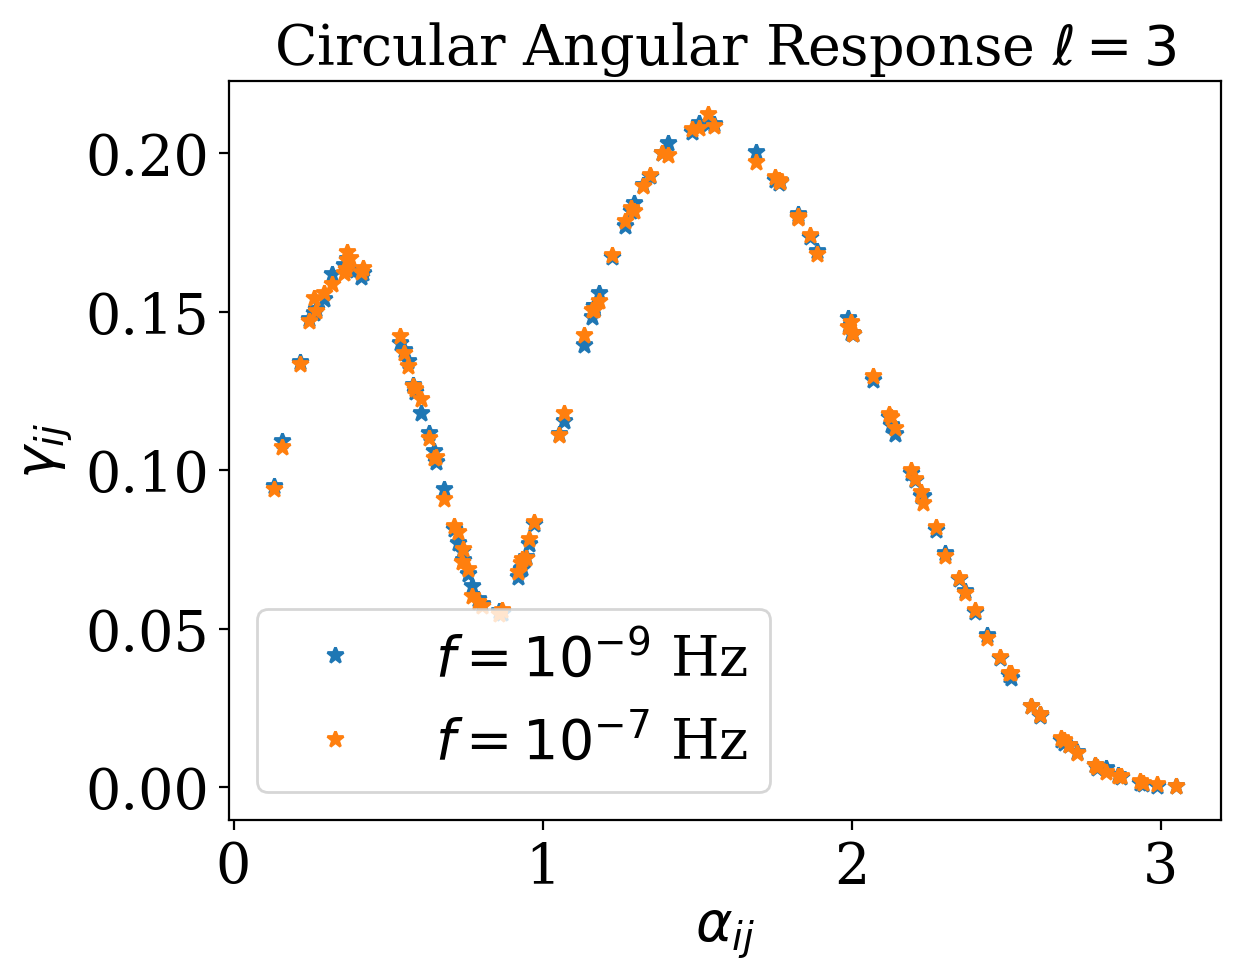

In [ ]:
plt.plot(alpha_ij, gamma3_ij_t[:,0], '*', label='$f=10^{-9}$ Hz$')
plt.plot(alpha_ij, gamma3_ij_t[:,-1], '*', label='$f=10^{-7}$ Hz')
plt.xlabel(r'$\alpha_{ij}$')
plt.ylabel(r'$\gamma_{ij}$')
plt.title('Tensor Angular Response $\ell=3$')
plt.legend()
plt.show()

plt.plot(alpha_ij, gamma3_ij_v[:,0], '*', label='$f=10^{-9}$ Hz')
plt.plot(alpha_ij, gamma3_ij_v[:,-1], '*', label='$f=10^{-7}$ Hz')
plt.xlabel(r'$\alpha_{ij}$')
plt.ylabel(r'$\gamma_{ij}$')
plt.title('Vector Angular Response $\ell=3$')
plt.legend()
plt.show()

plt.plot(alpha_ij, gamma3_ij_s[:,0], '*', label='$f=10^{-9}$ Hz')
plt.plot(alpha_ij, gamma3_ij_s[:,-1], '*', label='$f=10^{-7}$ Hz')
plt.xlabel(r'$\alpha_{ij}$')
plt.ylabel(r'$\gamma_{ij}$')
plt.title('Scalar Angular Response (breathing) $\ell=3$')
plt.legend()
plt.show()

plt.plot(alpha_ij, gamma3_ij_l[:,0], '*', label='$f=10^{-9}$ Hz')
plt.plot(alpha_ij, gamma3_ij_l[:,-1], '*', label='$f=10^{-7}$ Hz')
plt.xlabel(r'$\alpha_{ij}$')
plt.ylabel(r'$\gamma_{ij}$')
plt.title('Longitudinal Angular Response $\ell=3$')
plt.legend()
plt.show()

plt.plot(alpha_ij, gamma3_ij_V[:,0], '*', label='$f=10^{-9}$ Hz')
plt.plot(alpha_ij, gamma3_ij_V[:,-1], '*', label='$f=10^{-7}$ Hz')
plt.xlabel(r'$\alpha_{ij}$')
plt.ylabel(r'$\gamma_{ij}$')
plt.title('Circular Angular Response $\ell=3$') 
plt.legend()
plt.show()

In [ ]:

f_index = np.argmin(np.abs(f - 1e-8))

gamma_ij_t_f_index = gamma_ij_t[:,f_index]
gamma_ij_v_f_index = gamma_ij_v[:,f_index]
gamma_ij_s_f_index = gamma_ij_s[:,f_index]
gamma_ij_l_f_index = gamma_ij_l[:,f_index]
gamma_ij_V_f_index = gamma_ij_V[:,f_index]

gamma1_ij_t_f_index = gamma1_ij_t[:,f_index]
gamma1_ij_v_f_index = gamma1_ij_v[:,f_index]
gamma1_ij_s_f_index = gamma1_ij_s[:,f_index]
gamma1_ij_l_f_index = gamma1_ij_l[:,f_index]
gamma1_ij_V_f_index = gamma1_ij_V[:,f_index]

gamma2_ij_t_f_index = gamma2_ij_t[:,f_index]
gamma2_ij_v_f_index = gamma2_ij_v[:,f_index]
gamma2_ij_s_f_index = gamma2_ij_s[:,f_index]
gamma2_ij_l_f_index = gamma2_ij_l[:,f_index]
gamma2_ij_V_f_index = gamma2_ij_V[:,f_index]

gamma3_ij_t_f_index = gamma3_ij_t[:,f_index]
gamma3_ij_v_f_index = gamma3_ij_v[:,f_index]
gamma3_ij_s_f_index = gamma3_ij_s[:,f_index]
gamma3_ij_l_f_index = gamma3_ij_l[:,f_index]
gamma3_ij_V_f_index = gamma3_ij_V[:,f_index]

In [ ]:
# https://arxiv.org/pdf/1306.5394

# ell = 1 tensors

def R_1_1(alpha):
    term1 = -0.5* np.sqrt(np.pi/6)*np.sin(alpha)
    term2 =  3*(1-np.cos(alpha))
    term3 = (1 + 4/(1+np.cos(alpha))*np.log(np.sin(alpha/2)))
    return term1 * (1+term2*term3)


def R_11(alpha):
    return  -R_1_1(alpha) 


def R_10(alpha):
    term1 =-0.5 *np.sqrt(np.pi/3)
    term2 = 1+ np.cos(alpha)
    term3= 3 * (1-np.cos(alpha))
    term4 = 4*np.log(np.sin(alpha/2))
    return term1 * (term2 + term3 * (term2 + term4))

def R_1(alpha):
    term1 = R_1_1(alpha)
    term2 = R_11(alpha)
    term3 = R_10(alpha)
    return np.sqrt(term1**2 + term2**2 + term3**2)

# ell = 2 tensors

def R_22(alpha):
    term1 = -0.25 * np.sqrt(5*np.pi/6) * (1-np.cos(alpha))/(1+ cos(alpha))
    term2 = (1+ np.cos(alpha)) *((np.cos(alpha))**2 + 4* np.cos(alpha)-9)
    term3 = -24 * (1-cos(alpha)) * np.log(np.sin(alpha/2))
    return term1 * (term2 + term3)  

def R_21(alpha):
    term1 = 0.25*np.sqrt(2*np.pi/15)*np.sin(alpha)
    term2 = 5*(np.cos(alpha)**2) + 15*np.cos(alpha) -21
    term3 = -60*(1-np.cos(alpha))/(1+np.cos(alpha))*np.log(np.sin(alpha/2))
    return term1 * (term2 + term3)

def R_20(alpha):
    term1 = np.sqrt(np.pi/5)/3
    term2 = np.cos(alpha) 
    term3 = 15*(1-np.cos(alpha))/4
    term4 = (1+np.cos(alpha))*(np.cos(alpha)+3) + 8*np.log(np.sin(alpha/2))
    return term1*(term2 + term3*term4)

def R_2_2(alpha):
    return - R_22(alpha)

def R_2_1(alpha):
    return - R_21(alpha)

def R_2(alpha):
    term1 = R_2_2(alpha)
    term2 = R_2_1(alpha)
    term3 = R_20(alpha)
    term4 = R_21(alpha)
    term5 = R_22(alpha)
    return np.sqrt(term1**2 + term2**2 + term3**2 + term4**2 + term5**2)

# ell = 3 tensors

# checks with https://journals.aps.org/prd/pdf/10.1103/PhysRevD.93.062003 l = 3 appendix B

def R_3_3(alpha):
    term1 = -np.sqrt(35*np.pi)/48 * (1-np.cos(alpha))**2 /(np.sin(alpha))
    term2 = 34 - 17* np.cos(alpha) - 4*np.cos(alpha)**2 - np.cos(alpha)**3
    ratio = (1-np.cos(alpha))/(1+np.cos(alpha))
    term3 = 96 * ratio * np.log(np.sin(alpha/2))
    return term1 * (term2 + term3)

def R_3_2(alpha):
    term1 = - np.sqrt(210*np.pi)/48 * (1- np.cos(alpha))
    term2 = 17 - 9*np.cos(alpha) - 3*np.cos(alpha)**2 - np.cos(alpha)**3
    ratio = (1-np.cos(alpha))/(1+np.cos(alpha))
    term3 = 48 * ratio * np.log(np.sin(alpha/2))
    return term1 * (term2 + term3)

def R_3_1(alpha):
    term1 = - np.sqrt(21*np.pi)/48 * (1- np.cos(alpha)) * np.sin(alpha)
    term2 = 34 +15*np.cos(alpha) + 5*np.cos(alpha)**2
    term3 = 96/(1+np.cos(alpha)) * np.log(np.sin(alpha/2))
    return term1 * (term2 + term3)

def R_3_0(alpha):
    term1 = -np.sqrt(7*np.pi)/24 * (1-np.cos(alpha))
    term2 = (1+np.cos(alpha) )
    term3 = (17 + 10*np.cos(alpha) + 5*np.cos(alpha)**2 )
    term4 = 48 * np.log(np.sin(alpha/2))
    return term1 * (term2 * term3 + term4)

def R_31(alpha):
    return - R_3_1(alpha)

def R_32(alpha):
    return R_3_2(alpha)

def R_33(alpha):
    return - R_3_3(alpha)

def R_3(alpha):
    term1 = R_3_0(alpha)
    term2 = R_3_1(alpha)
    term3 = R_3_2(alpha)
    term4 = R_3_3(alpha)
    term5 = R_31(alpha)
    term6 = R_32(alpha)
    term7 = R_33(alpha)
    return np.sqrt(term1**2 + term2**2 + term3**2 + term4**2 + term5**2 + term6**2 + term7**2)


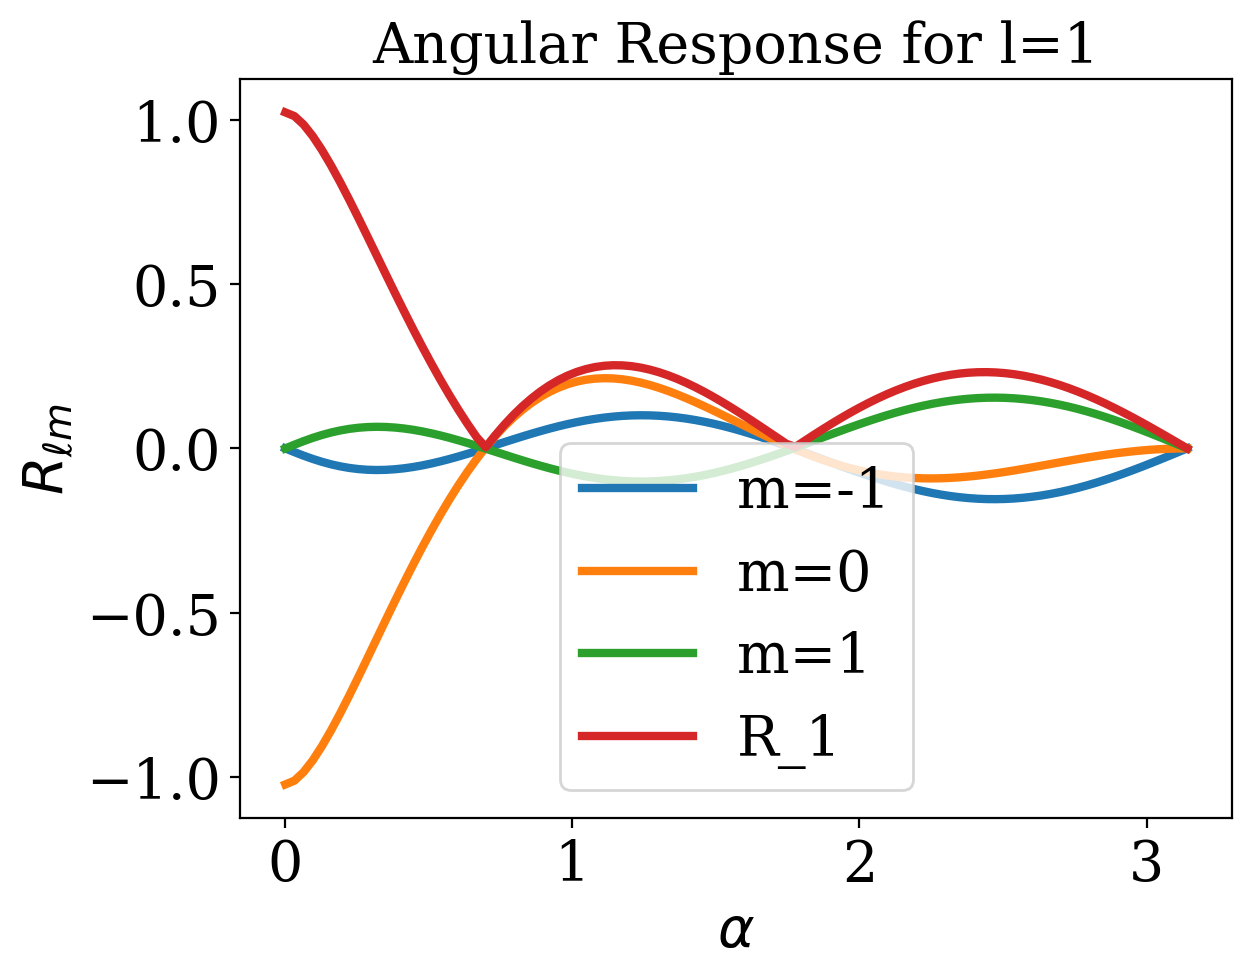

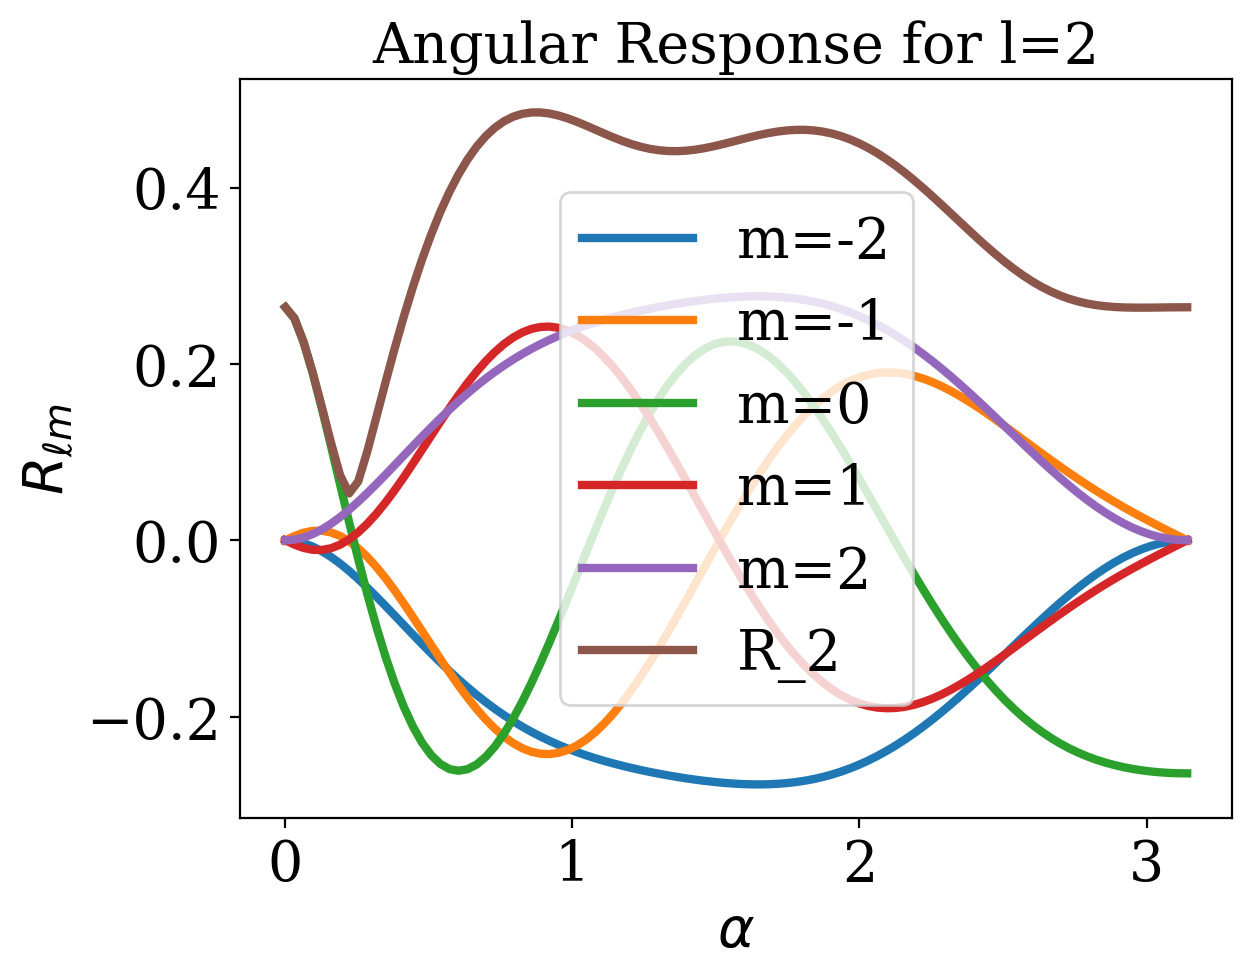

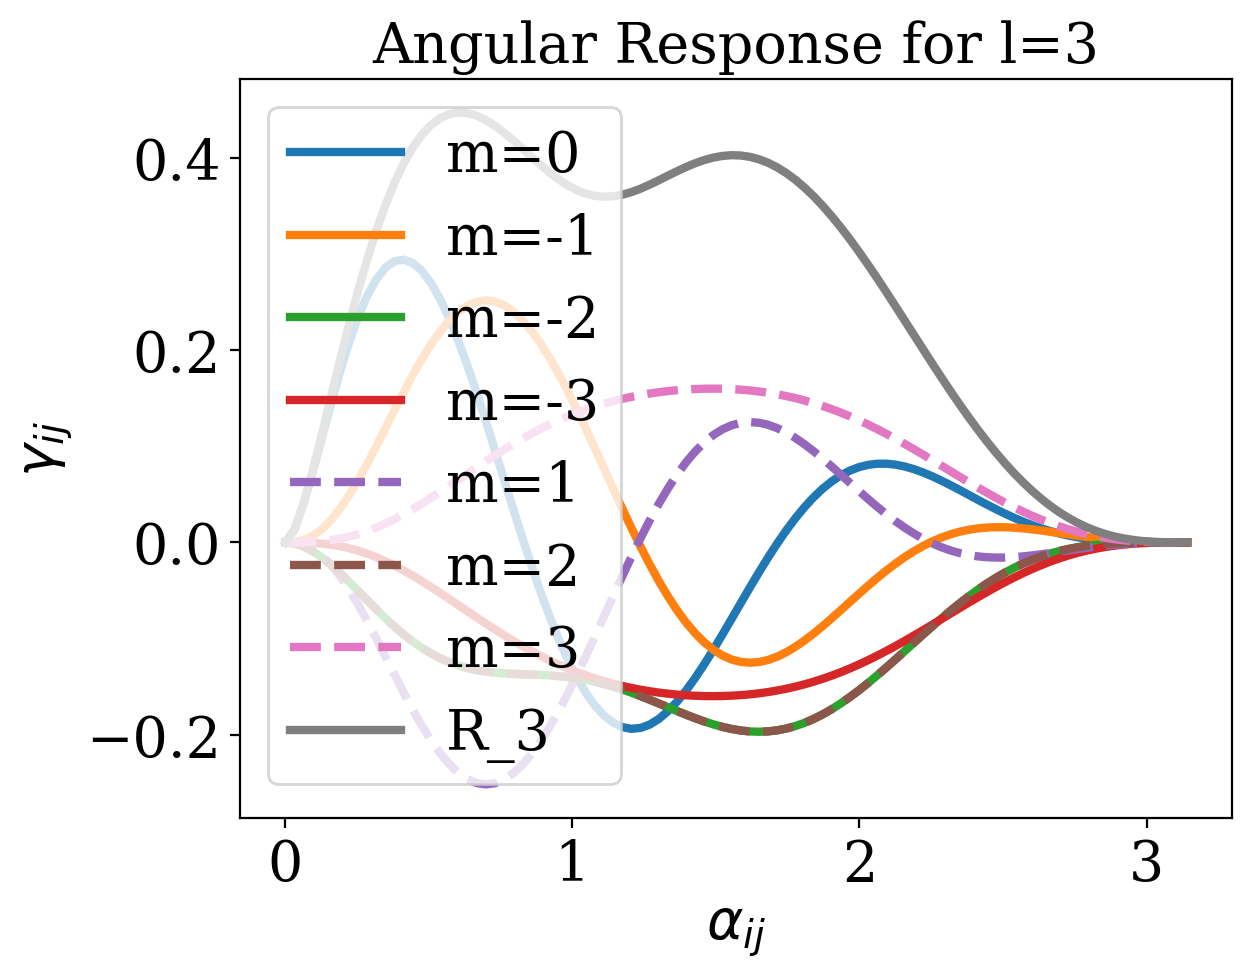

In [ ]:
epsilon = 1e-5
alpha= np.linspace(epsilon, np.pi- epsilon, 100)

# l = 1 
plt.plot(alpha,R_1_1(alpha), label='m=-1' )
plt.plot(alpha, R_10(alpha), label='m=0')
plt.plot(alpha, R_11(alpha), label='m=1')
plt.plot(alpha, R_1(alpha), label='R_1')
plt.title('Angular Response for l=1')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$R_{\ell m}$')
plt.legend()
plt.show()

# l = 2 
plt.plot(alpha, R_2_2(alpha), label='m=-2')
plt.plot(alpha, R_2_1(alpha), label='m=-1')
plt.plot(alpha, R_20(alpha), label='m=0')
plt.plot(alpha, R_21(alpha), label='m=1')
plt.plot(alpha, R_22(alpha), label='m=2')
plt.plot(alpha, R_2(alpha), label='R_2')
plt.title('Angular Response for l=2')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$R_{\ell m}$')
plt.legend()
plt.show()


# l = 3

plt.plot(alpha, R_3_0(alpha), label='m=0')
plt.plot(alpha, R_3_1(alpha), label='m=-1')
plt.plot(alpha, R_3_2(alpha), label='m=-2')
plt.plot(alpha, R_3_3(alpha), label='m=-3')
plt.plot(alpha, R_31(alpha), label='m=1', linestyle='dashed')
plt.plot(alpha, R_32(alpha), label='m=2', linestyle='dashed')
plt.plot(alpha, R_33(alpha), label='m=3', linestyle='dashed')
plt.plot(alpha, R_3(alpha), label='R_3')
plt.legend()
plt.xlabel(r'$\alpha_{ij}$')
plt.ylabel(r'$\gamma_{ij}$')
plt.title('Angular Response for l=3')
plt.show()


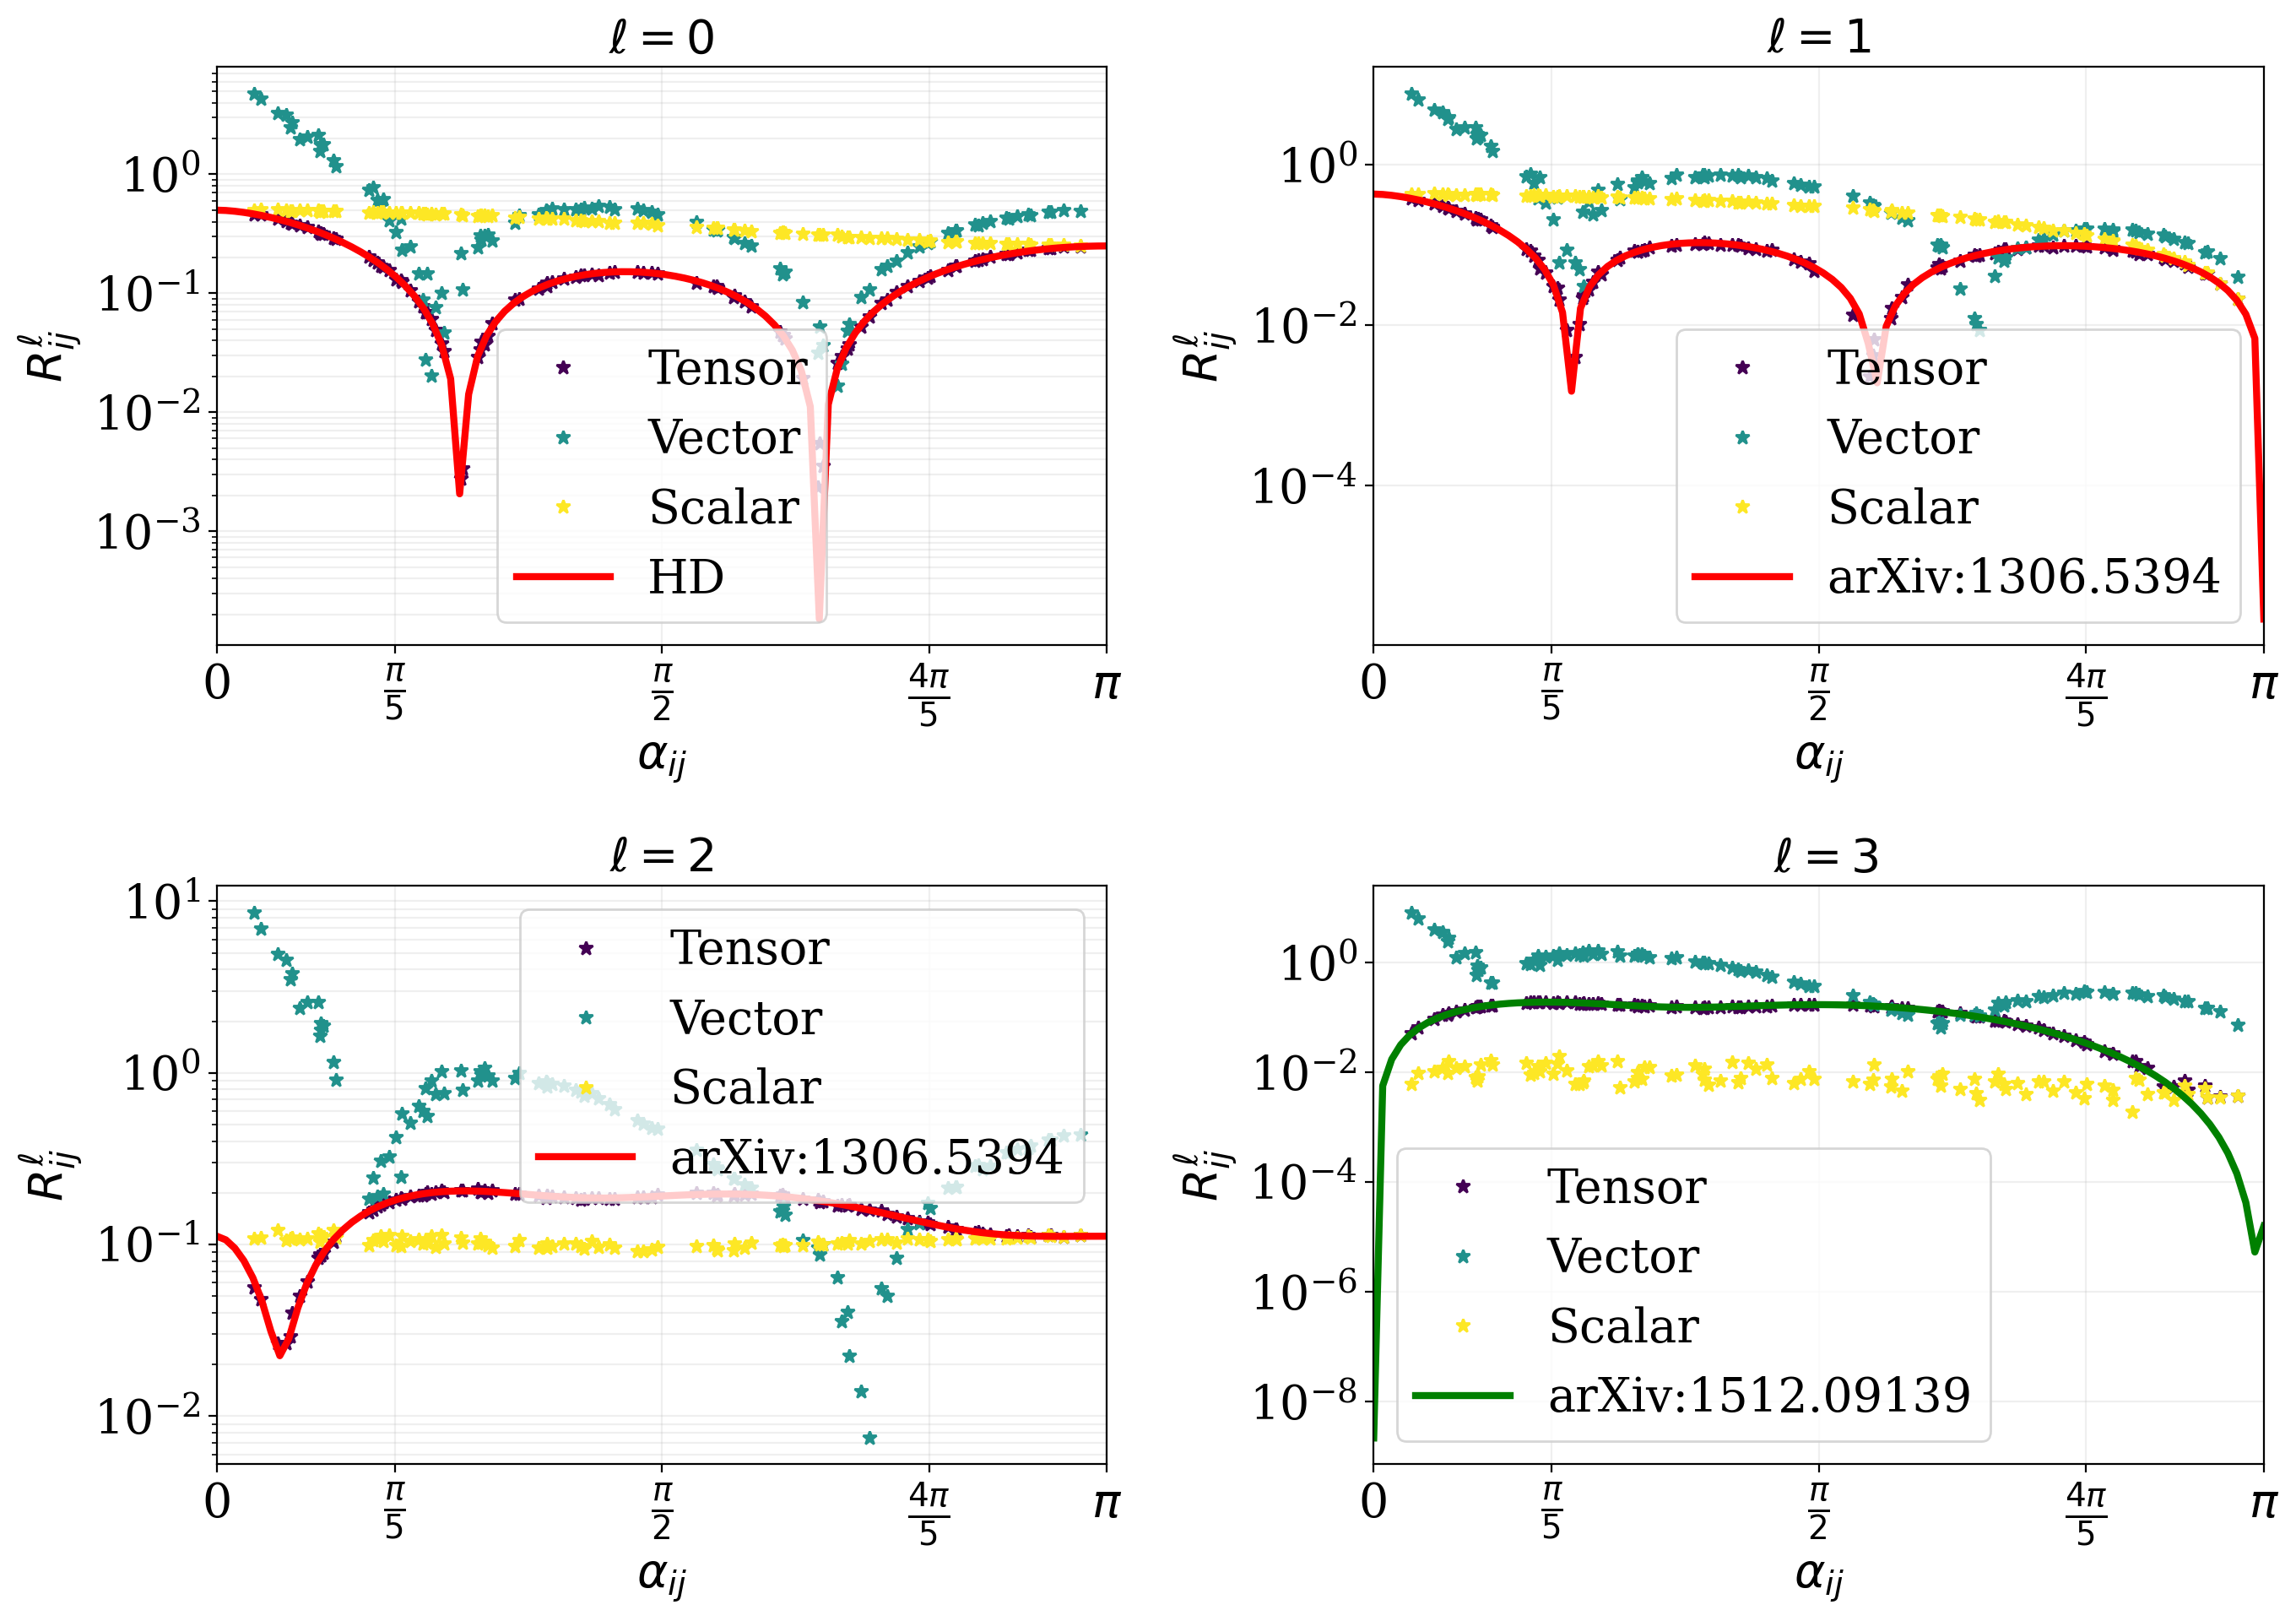

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
 
# Plot per ℓ=0
ax[0, 0].semilogy(alpha_ij, np.abs(gamma_ij_t_f_index), '*', color=colors[0], label='Tensor')
ax[0, 0].semilogy(alpha_ij, np.abs(gamma_ij_v_f_index), '*', color=colors[1], label='Vector')
ax[0, 0].semilogy(alpha_ij, np.abs(gamma_ij_s_f_index), '*', color=colors[2], label='Scalar')
ax[0, 0].semilogy(alpha, np.abs(hellings_downs(alpha)), color='red', label='HD')
ax[0, 0].set_xlabel(r'$\alpha_{ij}$')
ax[0, 0].set_ylabel(r'$R_{ij}^{\ell}$')
ax[0, 0].grid(which='both', alpha=0.2)
ax[0, 0].set_title(r'$\ell=0$')
ax[0, 0].set_xticks(custom_ticks)
ax[0, 0].set_xlim(0, np.pi)
ax[0, 0].legend()
ax[0, 0].xaxis.set_major_formatter(FuncFormatter(custom_pi_formatter))

# Plot per ℓ=1
ax[0, 1].semilogy(alpha_ij, gamma1_ij_t_f_index, '*', color=colors[0], label='Tensor')
ax[0, 1].semilogy(alpha_ij, gamma1_ij_v_f_index, '*', color=colors[1], label='Vector')
ax[0, 1].semilogy(alpha_ij, gamma1_ij_s_f_index, '*', color=colors[2], label='Scalar')
ax[0, 1].semilogy(alpha, 3*np.sqrt(4*np.pi)/(8*np.pi)* R_1(alpha), color='red', label='arXiv:1306.5394')
ax[0, 1].set_xlabel(r'$\alpha_{ij}$')
ax[0, 1].set_ylabel(r'$R_{ij}^{\ell}$')
ax[0, 1].grid(which='both', alpha=0.2)
ax[0, 1].set_title(r'$\ell=1$')
ax[0, 1].set_xticks(custom_ticks)
ax[0, 1].set_xlim(0, np.pi)
ax[0, 1].legend()
ax[0, 1].xaxis.set_major_formatter(FuncFormatter(custom_pi_formatter))

# Plot per ℓ=2
ax[1, 0].semilogy(alpha_ij, gamma2_ij_t_f_index, '*', color=colors[0], label='Tensor')
ax[1, 0].semilogy(alpha_ij, gamma2_ij_v_f_index, '*', color=colors[1], label='Vector')
ax[1, 0].semilogy(alpha_ij, gamma2_ij_s_f_index, '*', color=colors[2], label='Scalar')
ax[1, 0].semilogy(alpha, 3*np.sqrt(4*np.pi)/(8*np.pi)*R_2(alpha), color='red', label='arXiv:1306.5394')
ax[1, 0].set_xlabel(r'$\alpha_{ij}$')
ax[1, 0].set_ylabel(r'$R_{ij}^{\ell}$')
ax[1, 0].grid(which='both', alpha=0.2)
ax[1, 0].set_title(r'$\ell=2$')
ax[1, 0].set_xticks(custom_ticks)
ax[1, 0].legend()
ax[1, 0].set_xlim(0, np.pi)
ax[1, 0].xaxis.set_major_formatter(FuncFormatter(custom_pi_formatter))

# Plot per ℓ=3
ax[1, 1].semilogy(alpha_ij, gamma3_ij_t_f_index, '*', color=colors[0], label='Tensor')
ax[1, 1].semilogy(alpha_ij, gamma3_ij_v_f_index, '*', color=colors[1], label='Vector')
ax[1, 1].semilogy(alpha_ij, gamma3_ij_s_f_index, '*', color=colors[2], label='Scalar')
ax[1, 1].semilogy(alpha, 3*np.sqrt(4*np.pi)/(8*np.pi)*R_3(alpha), color='green', label='arXiv:1512.09139')
ax[1, 1].set_xlabel(r'$\alpha_{ij}$')
ax[1, 1].set_ylabel(r'$R_{ij}^{\ell}$')
ax[1, 1].grid(which='both', alpha=0.2)
ax[1, 1].set_title(r' $\ell=3$')
ax[1, 1].set_xticks(custom_ticks)
ax[1, 1].legend()
ax[1, 1].set_xlim(0, np.pi)
ax[1, 1].xaxis.set_major_formatter(FuncFormatter(custom_pi_formatter))

plt.tight_layout()
plt.show()

circular polarization

In [ ]:
# functions to check the angular response https://journals.aps.org/prd/pdf/10.1103/PhysRevD.93.062003

# l=0
def RV_0(alpha):
    return np.zeros(len(alpha))

# l=1
def RV_1_1(alpha):
    return - np.sqrt(6*np.pi)/3 * np.sin(alpha) * ( 1 + 3*((1-np.cos(alpha))/(1+np.cos(alpha)))*np.log(np.sin(alpha/2)) )

def RV_11(alpha):
    return RV_1_1(alpha)

def RV_10(alpha):
    return np.zeros(len(alpha))

def RV_1(alpha):
    term1 = RV_1_1(alpha)
    term2 = RV_11(alpha)
    term3 = RV_10(alpha)
    return np.sqrt(term1**2 + term2**2 + term3**2)

# l=2
def RV_2_2(alpha):
    term1 = np.sqrt(30*np.pi)/6 * (1- np.cos(alpha))
    term2 = (2 - np.cos(alpha))
    term3 = 6 * ((1- np.cos(alpha))/(1+ np.cos(alpha))) * np.log(np.sin(alpha/2))
    return term1* (term2 + term3)

def RV_2_1(alpha):
    term1 = np.sqrt(30*np.pi)/6 * (np.sin(alpha)/(1+ np.cos(alpha)))
    term2 = 2
    term3 = (1- np.cos(alpha))
    term4 = (np.cos(alpha) + 6* np.log(np.sin(alpha/2)))
    return term1* (term2 + term3*term4)

def RV_20(alpha):
    return np.zeros(len(alpha))

def RV_21(alpha):
    return RV_2_1(alpha)

def RV_22(alpha):
    return -RV_2_2(alpha)

def RV_2(alpha):
    term1 = RV_2_2(alpha)
    term2 = RV_2_1(alpha)
    term3 = RV_20(alpha)
    term4 = RV_21(alpha)
    term5 = RV_22(alpha)
    return np.sqrt(term1**2 + term2**2 + term3**2 + term4**2 + term5**2)

# l = 3

def RV_3_3(alpha):
    ratio = (1-np.cos(alpha))/(1+np.cos(alpha))
    term1 = - np.sqrt(35*np.pi)/16 * np.sin(alpha) * ratio
    term2 = 11 - 6*np.cos(alpha) - np.cos(alpha)**2
    term3 = 32 * ratio * np.log(np.sin(alpha/2))
    return term1 * (term2 + term3)

def RV_3_2(alpha):
    term1 = - np.sqrt(210*np.pi)/24 * (1 - np.cos(alpha))
    term2 = 8 - 5*np.cos(alpha) - np.cos(alpha)**2
    ratio = (1-np.cos(alpha))/(1+np.cos(alpha))
    term3 = 24*ratio*np.log(np.sin(alpha/2))
    return term1 * (term2 + term3)

def RV_3_1(alpha):
    term1 = - np.sqrt(21*np.pi)/48 * np.sin(alpha)
    term2 = 33 - 20*np.cos(alpha) - 5*np.cos(alpha)**2
    ratio = (1-np.cos(alpha))/(1+np.cos(alpha))
    term3 = 96* ratio *np.log(np.sin(alpha/2))
    return term1 * (term2 + term3)

def RV_3_0(alpha):
    return np.zeros(len(alpha))

def RV_31(alpha):
    return RV_3_1(alpha)

def RV_32(alpha):
    return -RV_3_2(alpha)

def RV_33(alpha):
    return RV_3_3(alpha)

def RV_3(alpha):
    term1 = RV_3_3(alpha)
    term2 = RV_3_2(alpha)
    term3 = RV_3_1(alpha)
    term4 = RV_3_0(alpha)
    term5 = RV_31(alpha)
    term6 = RV_32(alpha)
    term7 = RV_33(alpha)
    return np.sqrt(term1**2 + term2**2 + term3**2 + term4**2 + term5**2 + term6**2 + term7**2)


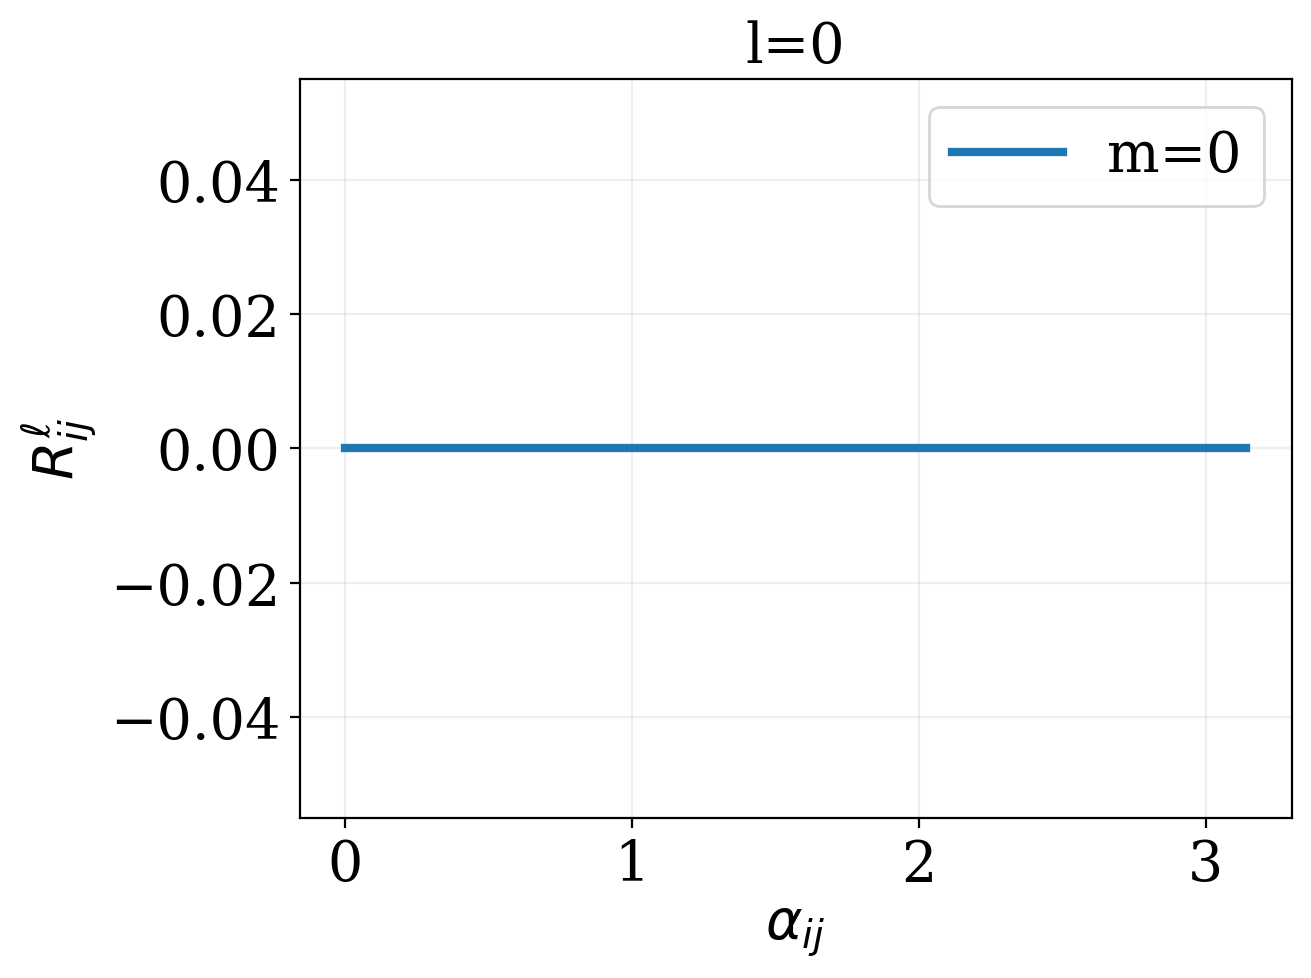

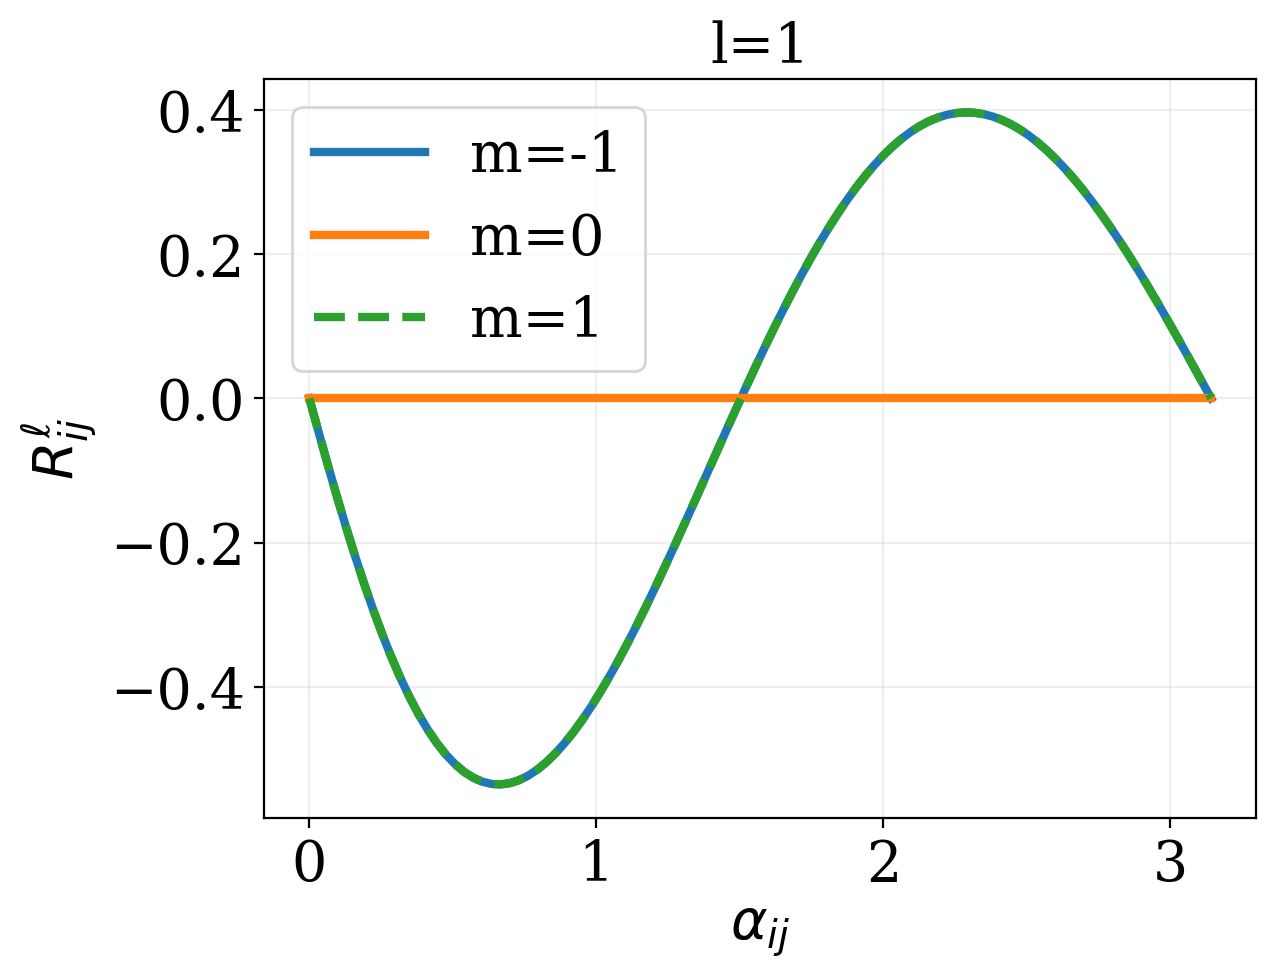

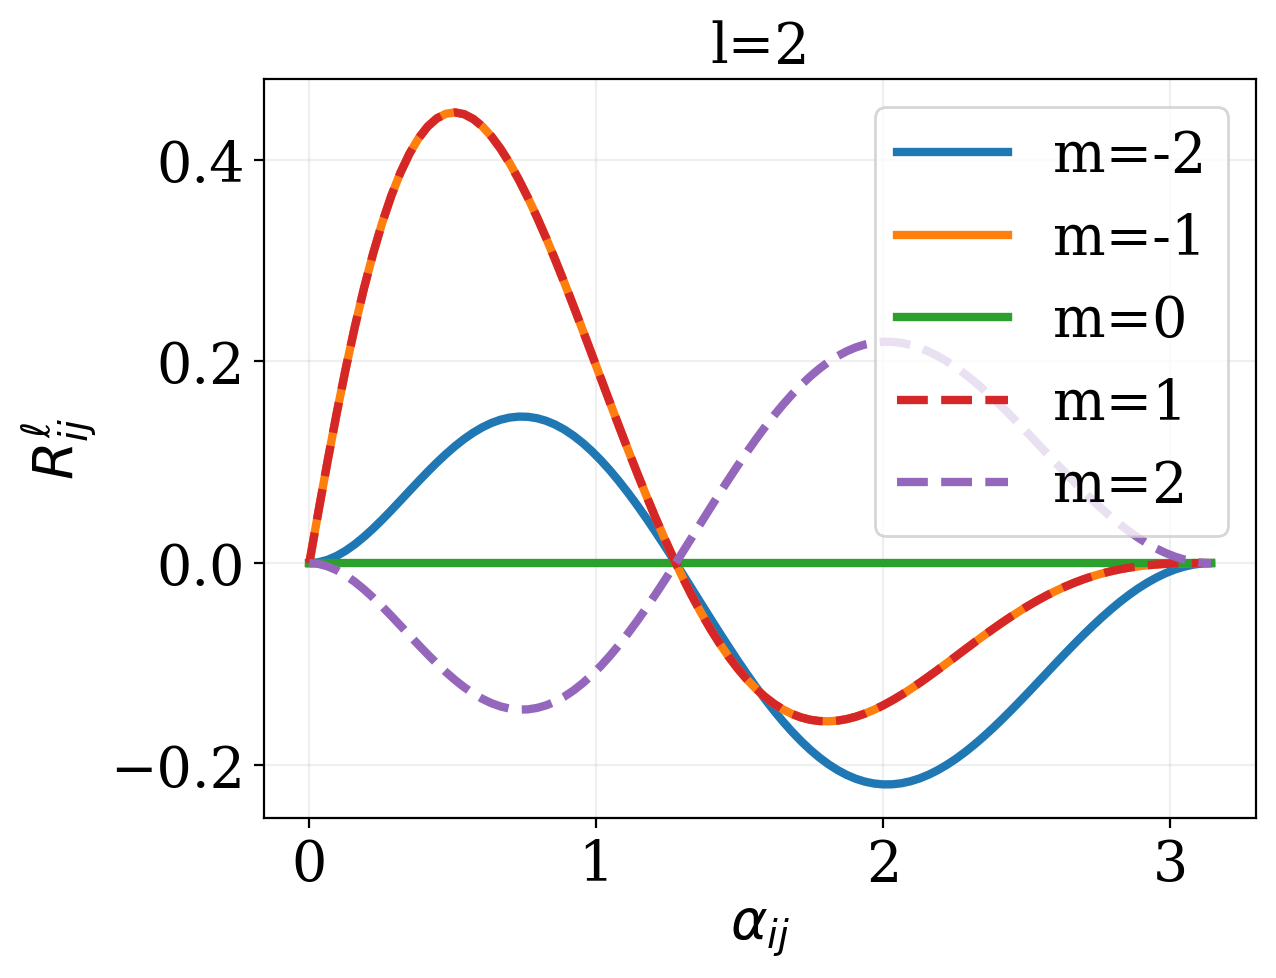

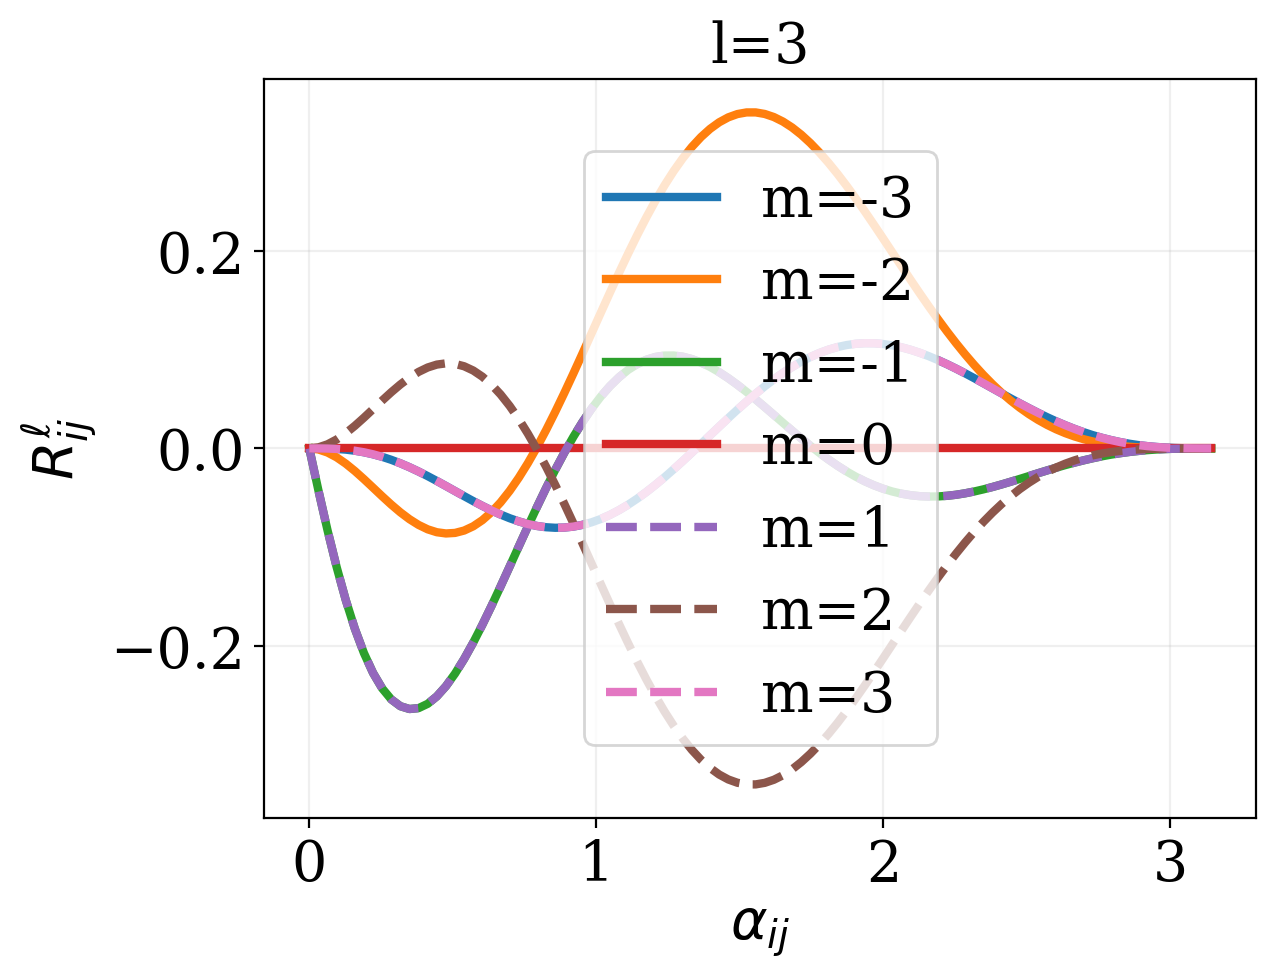

In [ ]:
alpha = np.linspace(epsilon, np.pi - epsilon, 100)

# l = 0

plt.plot(alpha, RV_0(alpha), label='m=0')
plt.xlabel(r'$\alpha_{ij}$')
plt.ylabel(r'$R_{ij}^{\ell}$')
plt.title('l=0')
plt.grid(which='both', alpha=0.2)
plt.legend()
plt.show()

# l = 1
plt.plot(alpha, RV_1_1(alpha), label='m=-1')
plt.plot(alpha, RV_10(alpha), label='m=0')
plt.plot(alpha, RV_11(alpha), label='m=1', linestyle = '--')
plt.xlabel(r'$\alpha_{ij}$')
plt.ylabel(r'$R_{ij}^{\ell}$')
plt.title('l=1')
plt.grid(which='both', alpha=0.2)
plt.legend()
plt.show()

# l = 2
plt.plot(alpha, RV_2_2(alpha), label='m=-2')
plt.plot(alpha, RV_2_1(alpha), label='m=-1')
plt.plot(alpha, RV_20(alpha), label='m=0')
plt.plot(alpha, RV_21(alpha), label='m=1', linestyle = '--')
plt.plot(alpha, RV_22(alpha), label='m=2', linestyle = '--')
plt.xlabel(r'$\alpha_{ij}$')
plt.ylabel(r'$R_{ij}^{\ell}$')
plt.title('l=2')
plt.grid(which='both', alpha=0.2)
plt.legend()
plt.show()

# l = 3
plt.plot(alpha, RV_3_3(alpha), label='m=-3')
plt.plot(alpha, RV_3_2(alpha), label='m=-2')
plt.plot(alpha, RV_3_1(alpha), label='m=-1')
plt.plot(alpha, RV_3_0(alpha), label='m=0')
plt.plot(alpha, RV_31(alpha), label='m=1', linestyle = '--')
plt.plot(alpha, RV_32(alpha), label='m=2', linestyle = '--')
plt.plot(alpha, RV_33(alpha), label='m=3', linestyle = '--')
plt.xlabel(r'$\alpha_{ij}$')
plt.ylabel(r'$R_{ij}^{\ell}$')
plt.title('l=3')
plt.grid(which='both', alpha=0.2)
plt.legend()
plt.show()


# ******* WIP *******

# Sensitivity Curves

In [4]:
psi = 0
Tobs_PTA = 15
snr_ = 1

f_PTA = np.logspace(-9, -7, 100)
colors = cm.viridis(np.linspace(0, 1, 3))
pls_NANOGrav_t = pls.PLS_PTA(f_PTA, snr_, Tobs_PTA, 't', psi)
pls_NANOGrav_v = pls.PLS_PTA(f_PTA, snr_, Tobs_PTA, 'v', psi)
pls_NANOGrav_s = pls.PLS_PTA(f_PTA, snr_, Tobs_PTA, 's', psi)
#pls_NANOGrav_V = pls.APLS_PTA(f_PTA, snr_, Tobs_PTA, 'V', psi)



2025-06-13 11:21:05.982 | DEBUG    | pint.models.binary_ddk:validate:211 - Validating DDK model in ECL coordinates
2025-06-13 11:26:30.755 | DEBUG    | pint.models.binary_ddk:validate:211 - Validating DDK model in ECL coordinates
2025-06-13 11:31:54.967 | DEBUG    | pint.models.binary_ddk:validate:211 - Validating DDK model in ECL coordinates


Text(0.5, 1.0, 'PTA PLS')

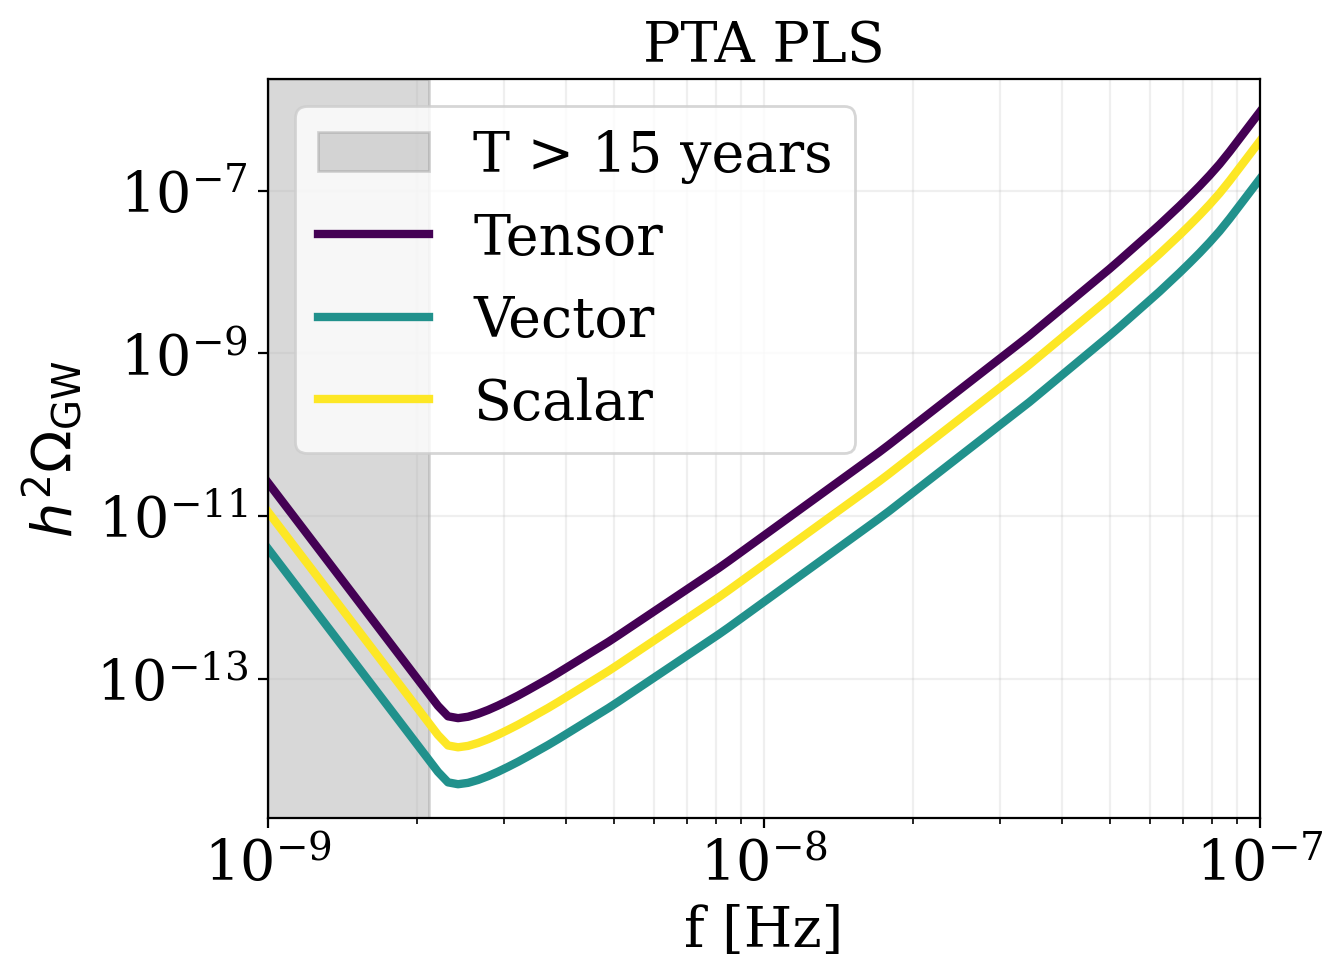

In [28]:
T_15_years = 15 * 365 * 24 * 3600  # in secondi
f_15_years = 1 / T_15_years  # in Hz
plt.axvspan(f_PTA.min(), f_15_years, color='gray', alpha=0.3, label='T > 15 years')
colors = cm.viridis(np.linspace(0, 1, 3))
plt.plot(f_PTA, pls_NANOGrav_t, label='Tensor', color=colors[0])
plt.plot(f_PTA, pls_NANOGrav_v, label='Vector', color=colors[1])
plt.plot(f_PTA, pls_NANOGrav_s, label='Scalar', color=colors[2])
#plt.plot(f_PTA, pls_NANOGrav_V, label='V', color='black')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2 \Omega_{\rm GW}$')
plt.xscale('log')
plt.yscale('log')
plt.grid(which='both', alpha=0.2)
plt.xlim(f_PTA.min(), f_PTA.max())
plt.legend()
plt.title('PTA PLS')

#beepy.beep(sound=1) 

In [6]:
print(np.min(pls_NANOGrav_t))
print(np.min(pls_NANOGrav_v))
print(np.min(pls_NANOGrav_s))

3.307759743938427e-14
5.103426676112317e-15
1.450222236993179e-14


6.77798365505009e-10
1.0225966903603887e-11
4.785946104159111e-10

1.1631995935335099e-11
1.7177910450965716e-12
5.100814777408018e-12

In [42]:
f = np.logspace(-9, -7, 100)
snr = 1
Tobs = 15
psi=0

colors = cm.viridis(np.linspace(0, 1, 4))

#tensors

T_15_years = 15 * 365 * 24 * 3600  # in s
f_15_years = 1 / T_15_years  # in Hz


pls_NANOGrav_0_t = Sensitivity_ell.APLS_ell_PTA(0, f, snr, Tobs, 1, 't', psi)
pls_NANOGrav_1_t = Sensitivity_ell.APLS_ell_PTA(1, f, snr, Tobs, 1e-3, 't', psi)
pls_NANOGrav_2_t = Sensitivity_ell.APLS_ell_PTA(2, f, snr, Tobs, 1e-3, 't', psi)
pls_NANOGrav_3_t = Sensitivity_ell.APLS_ell_PTA(3, f, snr, Tobs, 1e-3, 't', psi)

plt.axvspan(f_PTA.min(), f_15_years, color='gray', alpha=0.3, label='T > 15 years')



2025-06-17 09:55:40.647 | DEBUG    | pint.models.binary_ddk:validate:211 - Validating DDK model in ECL coordinates


KeyboardInterrupt: 

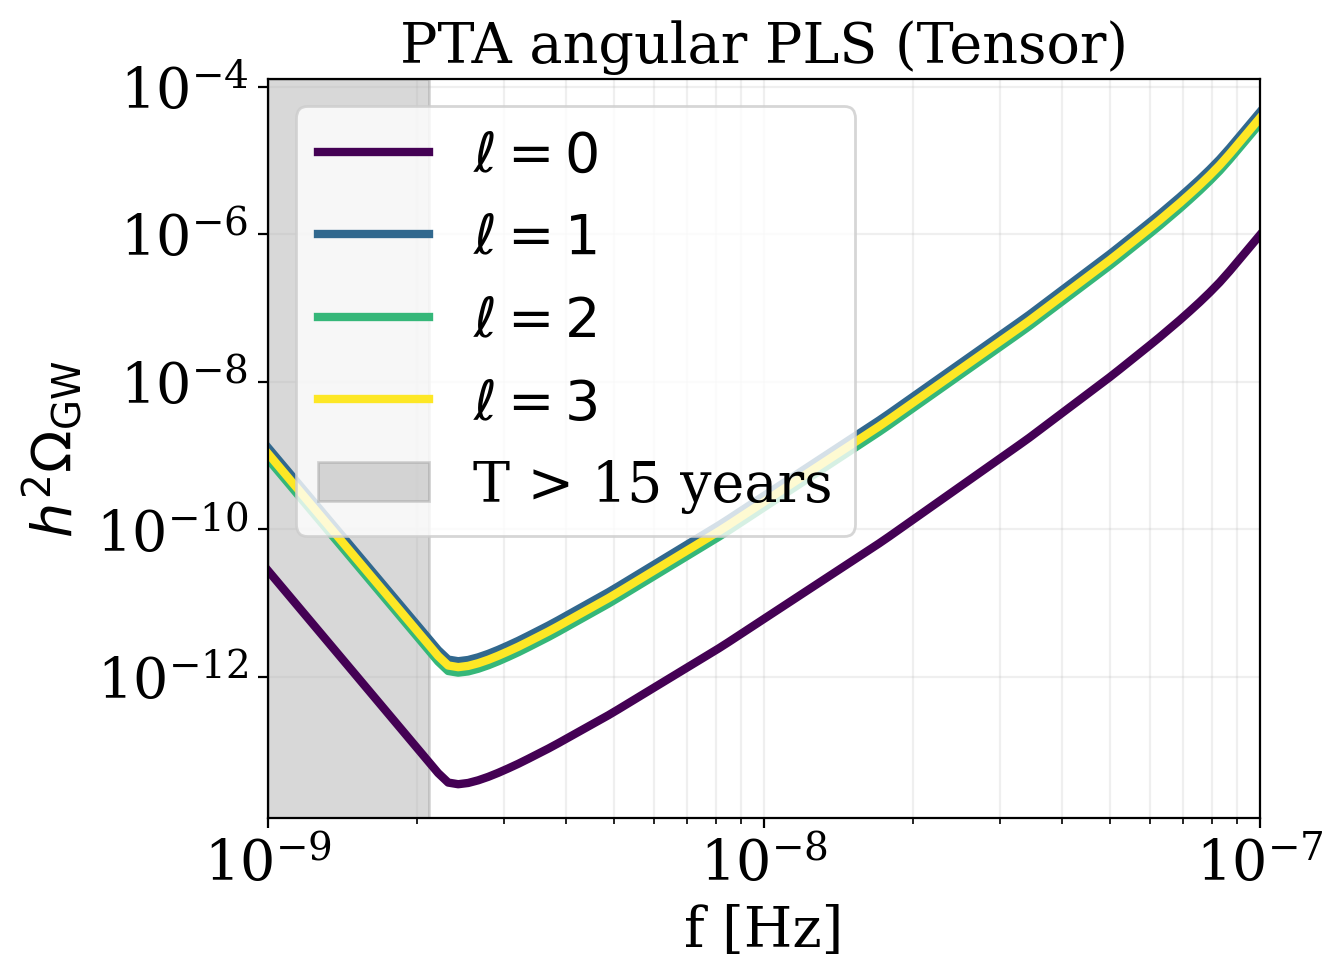

In [29]:
colors = cm.viridis(np.linspace(0, 1, 4))
plt.loglog(f, pls_NANOGrav_0_t, label=r'$\ell=0$', color=colors[0])
plt.loglog(f, pls_NANOGrav_1_t, label=r'$\ell=1$', color=colors[1])
plt.loglog(f, pls_NANOGrav_2_t, label=r'$\ell=2$', color=colors[2])
plt.loglog(f, pls_NANOGrav_3_t, label=r'$\ell=3$', color=colors[3])

plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2 \Omega_{\rm GW}$')
plt.xlim(f.min(), f.max())
plt.axvspan(f_PTA.min(), f_15_years, color='gray', alpha=0.3, label='T > 15 years')
plt.legend()
plt.title('PTA angular PLS (Tensor)')
plt.grid(which='both', alpha=0.2)

In [16]:
print(np.min(pls_NANOGrav_0_t))
print(np.min(pls_NANOGrav_1_t))
print(np.min(pls_NANOGrav_2_t))
print(np.min(pls_NANOGrav_3_t))

3.308113190389563e-14
1.544587813604936e-12
1.0803418379705477e-12
1.2834079770628486e-12


2025-06-15 13:07:29.899 | DEBUG    | pint.models.binary_ddk:validate:211 - Validating DDK model in ECL coordinates
2025-06-15 13:13:19.712 | DEBUG    | pint.models.binary_ddk:validate:211 - Validating DDK model in ECL coordinates
2025-06-15 13:30:24.963 | DEBUG    | pint.models.binary_ddk:validate:211 - Validating DDK model in ECL coordinates
2025-06-15 13:58:40.114 | DEBUG    | pint.models.binary_ddk:validate:211 - Validating DDK model in ECL coordinates


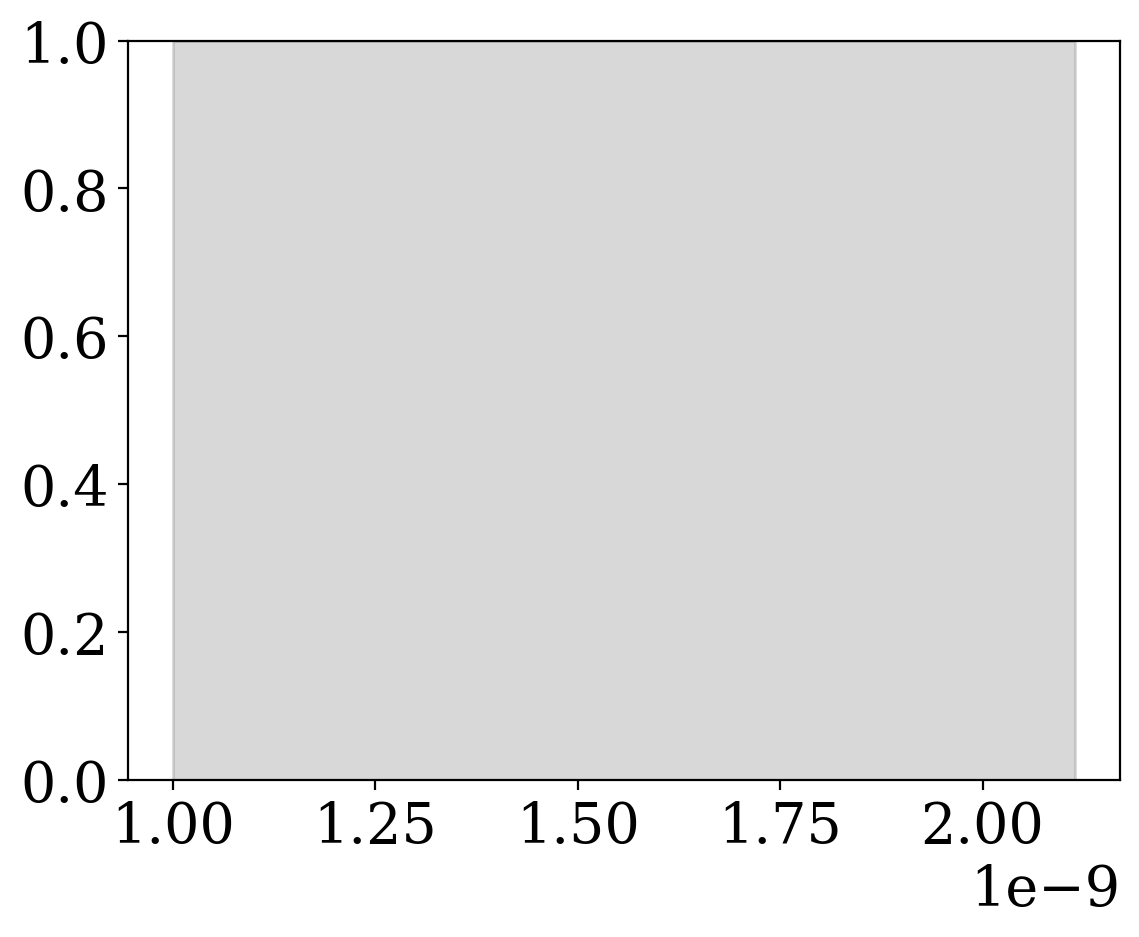

In [21]:
#vectors

pls_NANOGrav_0_v = Sensitivity_ell.APLS_ell_PTA(0, f, snr, Tobs, 1, 'v', psi)
pls_NANOGrav_1_v = Sensitivity_ell.APLS_ell_PTA(1, f, snr, Tobs, 1e-3, 'v', psi)
pls_NANOGrav_2_v = Sensitivity_ell.APLS_ell_PTA(2, f, snr, Tobs, 1e-3, 'v', psi)
pls_NANOGrav_3_v = Sensitivity_ell.APLS_ell_PTA(3, f, snr, Tobs, 1e-3, 'v', psi)

T_15_years = 15 * 365 * 24 * 3600  # in s
f_15_years = 1 / T_15_years  # in Hz
plt.axvspan(f_PTA.min(), f_15_years, color='gray', alpha=0.3, label='T > 15 years')




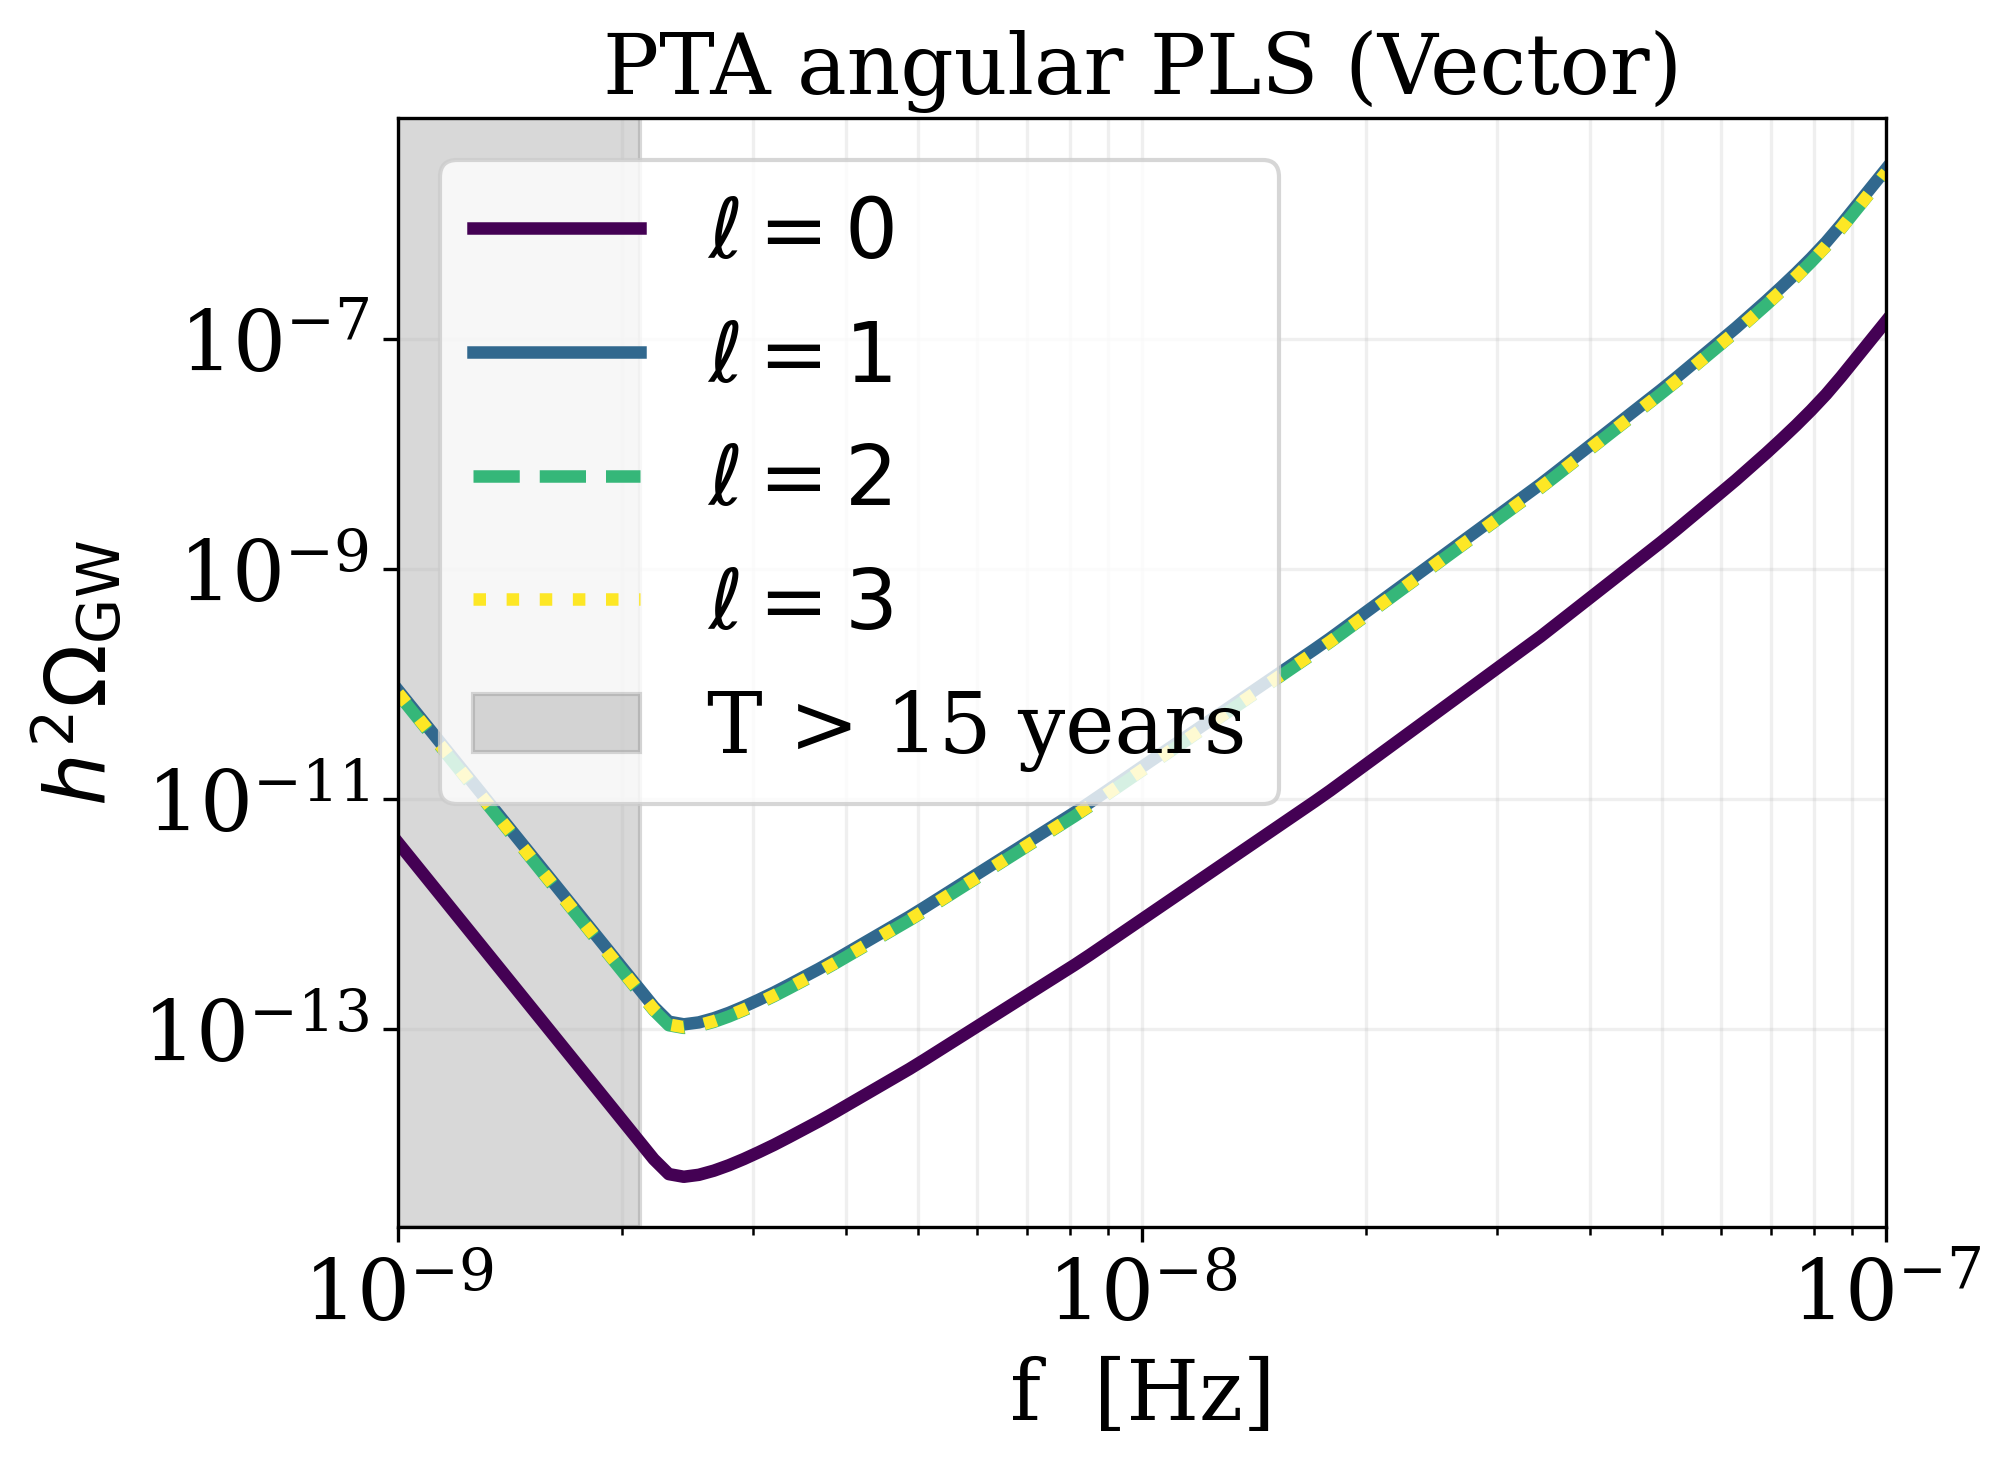

In [43]:

plt.loglog(f, pls_NANOGrav_0_v, label=r'$\ell=0$', color=colors[0])
plt.loglog(f, pls_NANOGrav_1_v, label=r'$\ell=1$', color=colors[1])
plt.loglog(f, pls_NANOGrav_2_v, label=r'$\ell=2$', color=colors[2], linestyle='dashed')
plt.loglog(f, pls_NANOGrav_3_v, label=r'$\ell=3$', color=colors[3], linestyle=':')
plt.axvspan(f_PTA.min(), f_15_years, color='gray', alpha=0.3, label='T > 15 years')

plt.xlabel('f  [Hz]')
plt.ylabel(r'$h^2 \Omega_{\rm GW}$')
plt.xlim(f.min(), f.max())
plt.legend()
plt.title('PTA angular PLS (Vector)')
plt.grid(which='both', alpha=0.2)


In [23]:
print(np.min(pls_NANOGrav_0_v))
print(np.min(pls_NANOGrav_1_v))
print(np.min(pls_NANOGrav_2_v))
print(np.min(pls_NANOGrav_3_v))

5.250437283874331e-15
1.1073214912490147e-13
1.031212949053017e-13
1.0460125912775417e-13


In [24]:
#scalars

pls_NANOGrav_0_s = Sensitivity_ell.APLS_ell_PTA(0, f, snr, Tobs, 1, 's', psi)
pls_NANOGrav_1_s = Sensitivity_ell.APLS_ell_PTA(1, f, snr, Tobs, 1e-3, 's', psi)
pls_NANOGrav_2_s = Sensitivity_ell.APLS_ell_PTA(2, f, snr, Tobs, 1e-3, 's', psi)
pls_NANOGrav_3_s = Sensitivity_ell.APLS_ell_PTA(3, f, snr, Tobs, 1e-3, 's', psi)



2025-06-15 21:54:54.718 | DEBUG    | pint.models.binary_ddk:validate:211 - Validating DDK model in ECL coordinates
2025-06-15 22:00:45.356 | DEBUG    | pint.models.binary_ddk:validate:211 - Validating DDK model in ECL coordinates
2025-06-15 22:17:59.355 | DEBUG    | pint.models.binary_ddk:validate:211 - Validating DDK model in ECL coordinates
2025-06-15 22:46:43.070 | DEBUG    | pint.models.binary_ddk:validate:211 - Validating DDK model in ECL coordinates


In [ ]:
T_15_years = 15 * 365 * 24 * 3600  # in s
f_15_years = 1 / T_15_years  # in Hz
plt.axvspan(f_PTA.min(), f_15_years, color='gray', alpha=0.3, label='T > 15 years')



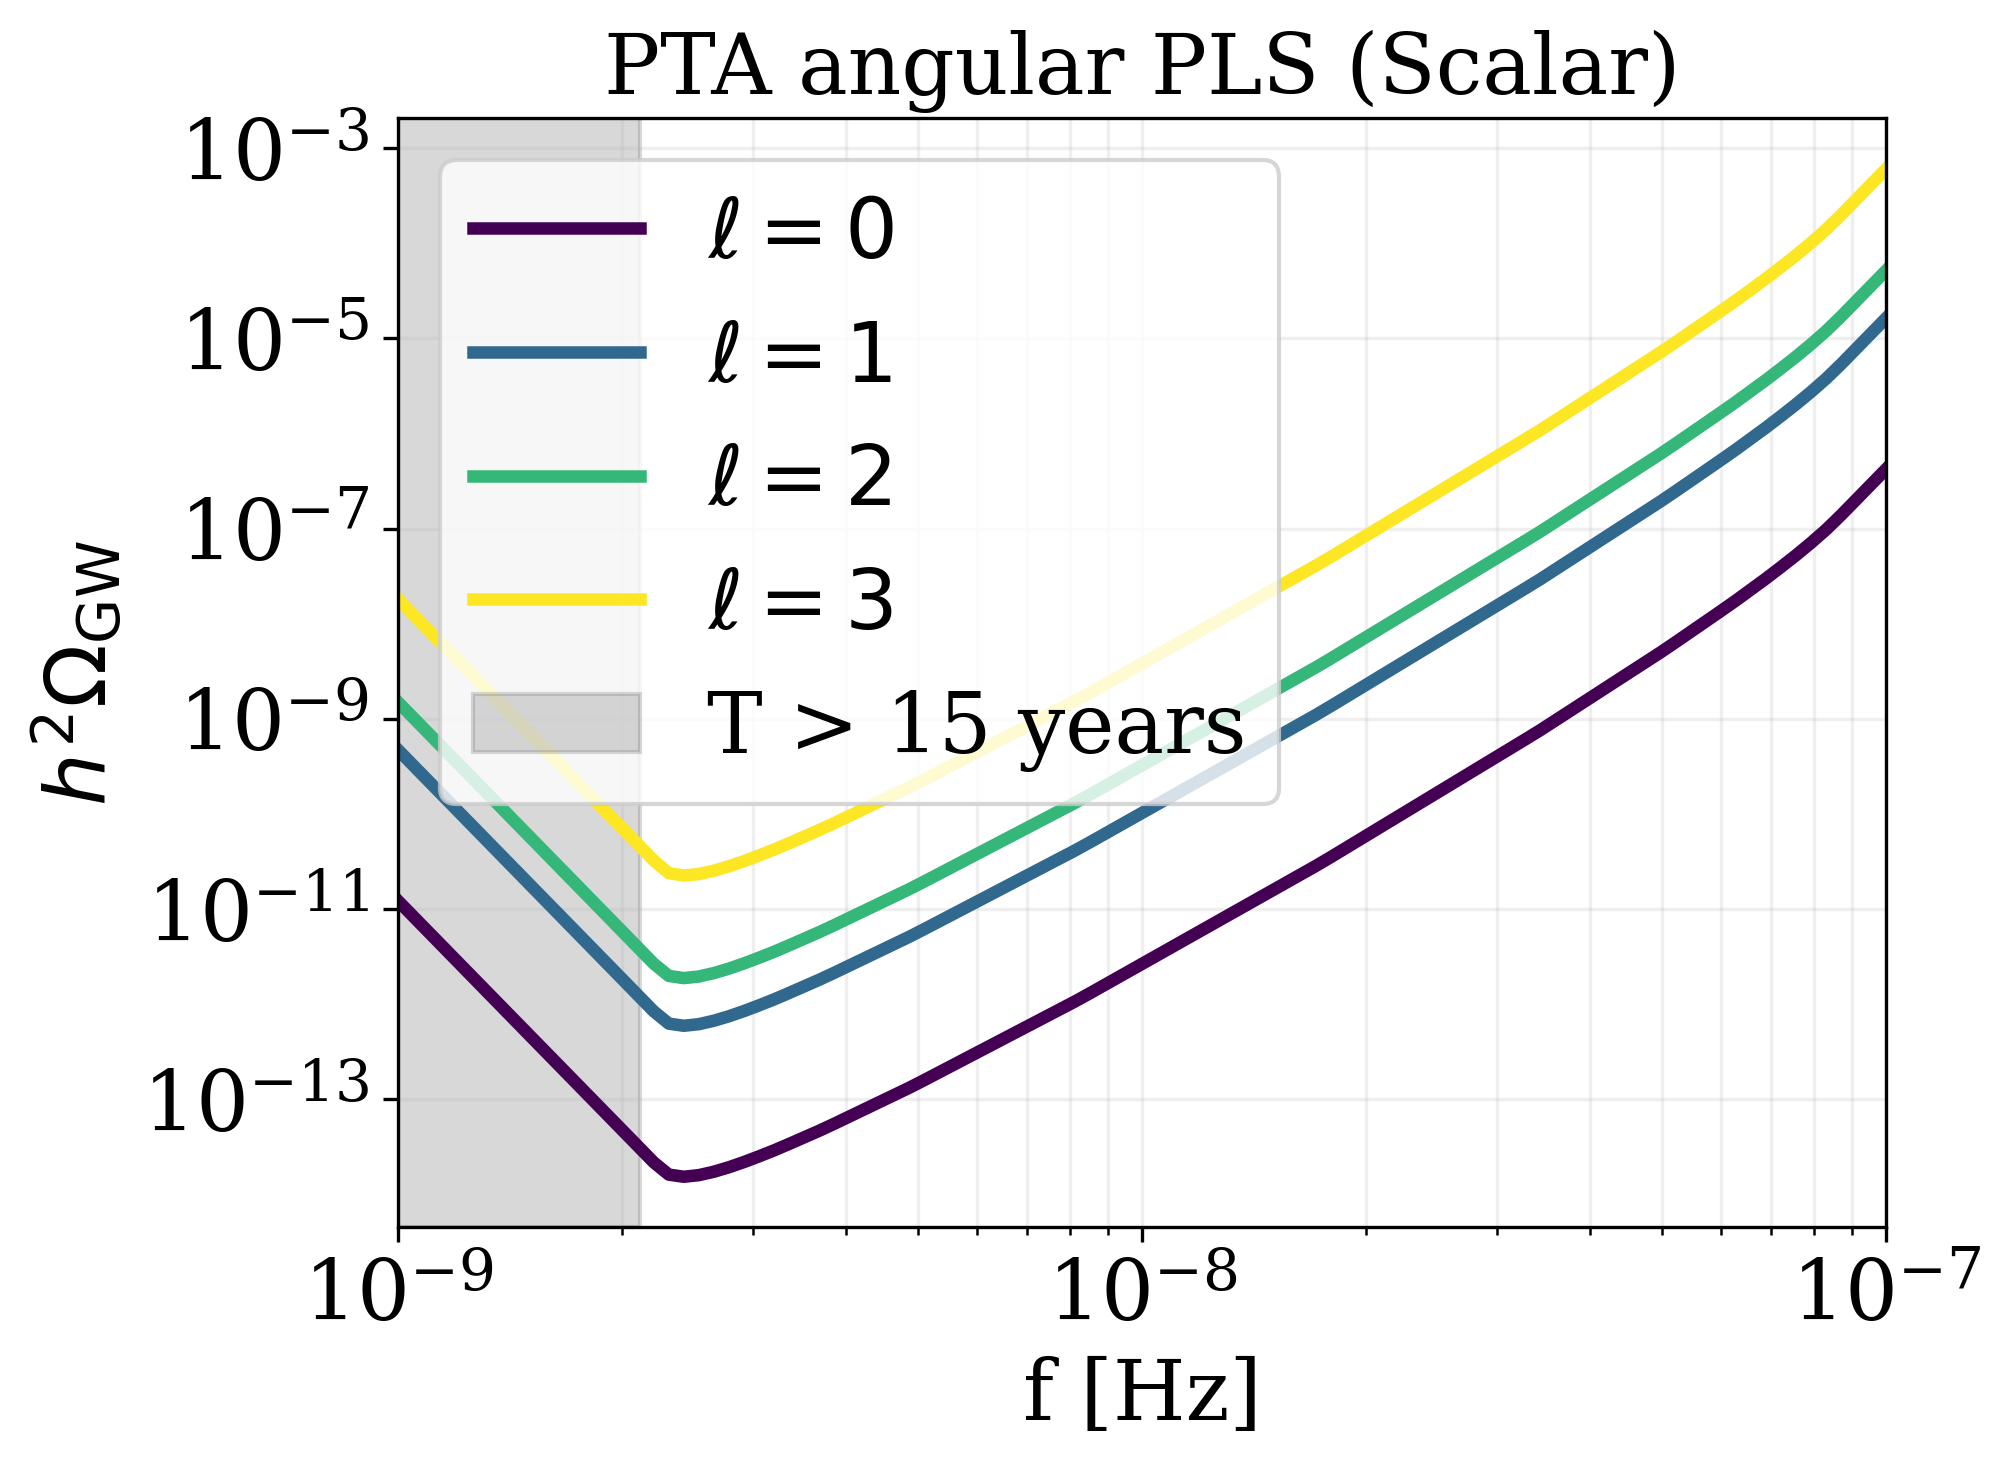

In [44]:
T_15_years = 15 * 365 * 24 * 3600  # in s
f_15_years = 1 / T_15_years  # in Hz
colors = cm.viridis(np.linspace(0, 1, 4))

plt.loglog(f, pls_NANOGrav_0_s, label=r'$\ell=0$', color=colors[0])
plt.loglog(f, pls_NANOGrav_1_s, label=r'$\ell=1$', color=colors[1])
plt.loglog(f, pls_NANOGrav_2_s, label=r'$\ell=2$', color=colors[2])
plt.loglog(f, pls_NANOGrav_3_s, label=r'$\ell=3$', color=colors[3])
plt.axvspan(f_PTA.min(), f_15_years, color='gray', alpha=0.3, label='T > 15 years')

plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2 \Omega_{\rm GW}$')
plt.xlim(f.min(), f.max())
plt.legend()
plt.title('PTA angular PLS (Scalar)')
plt.grid(which='both', alpha=0.2)

In [ ]:
print(np.min(pls_NANOGrav_0_s))
print(np.min(pls_NANOGrav_1_s))
print(np.min(pls_NANOGrav_2_s))
print(np.min(pls_NANOGrav_3_s))

1.450870370781445e-14
5.607412761767533e-13
1.7342373108764302e-12
6.6716080994415414e-12


2025-06-16 00:31:53.723 | DEBUG    | pint.models.binary_ddk:validate:211 - Validating DDK model in ECL coordinates
2025-06-16 03:29:35.933 | DEBUG    | pint.models.binary_ddk:validate:211 - Validating DDK model in ECL coordinates
2025-06-16 09:25:24.854 | DEBUG    | pint.models.binary_ddk:validate:211 - Validating DDK model in ECL coordinates


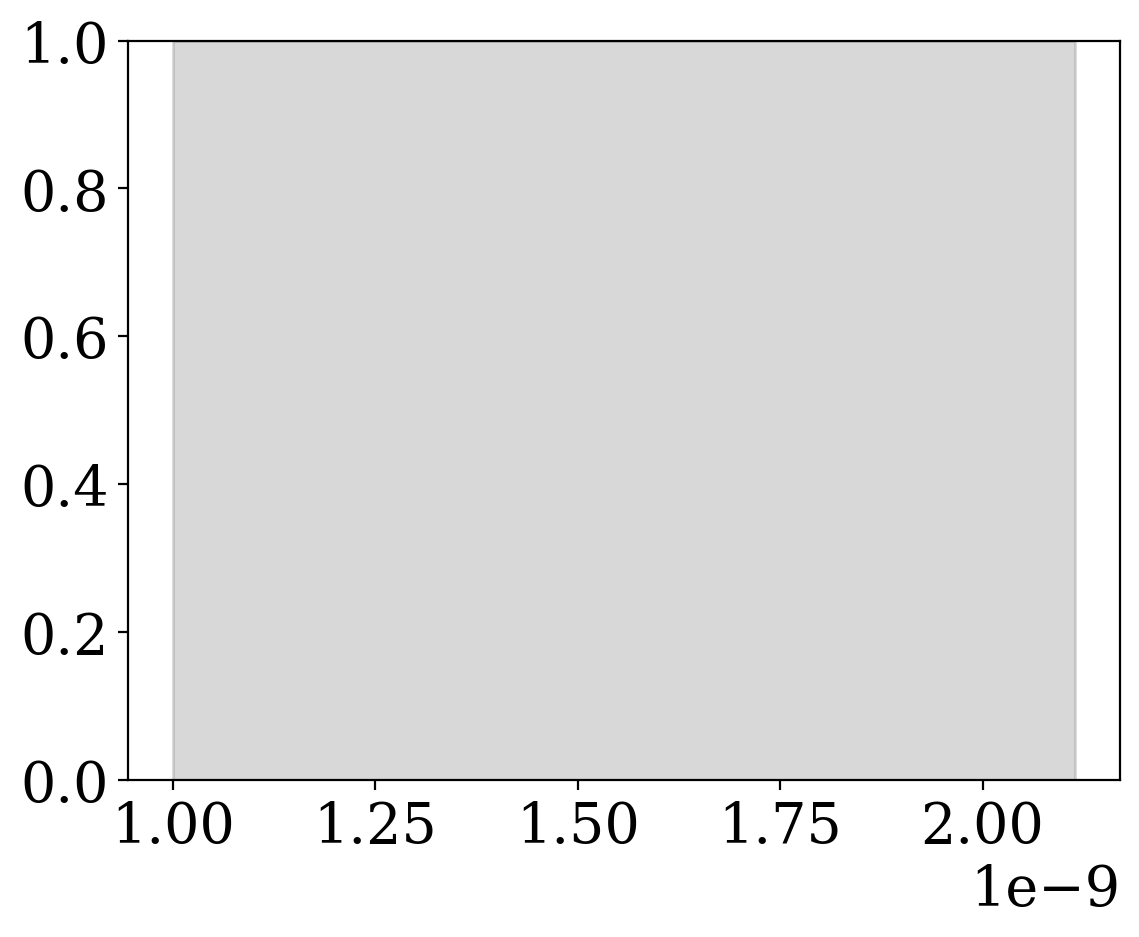

In [27]:
# circular polarization

#pls_NANOGrav_0_V = Sensitivity_ell.APLS_ell_PTA(0, f, snr, Tobs, 1, 'V', psi)
pls_NANOGrav_1_V = Sensitivity_ell.APLS_ell_PTA(1, f, snr, Tobs, 1e-3, 'V', psi)
pls_NANOGrav_2_V = Sensitivity_ell.APLS_ell_PTA(2, f, snr, Tobs, 1e-3, 'V', psi)
pls_NANOGrav_3_V = Sensitivity_ell.APLS_ell_PTA(3, f, snr, Tobs, 1e-3, 'V', psi)

T_15_years = 15 * 365 * 24 * 3600  # in s
f_15_years = 1 / T_15_years  # in Hz
plt.axvspan(f_PTA.min(), f_15_years, color='gray', alpha=0.3, label='T > 15 years')

#plt.loglog(f, pls_NANOGrav_0_V, label=r'$\ell=0$', color=colors[0])


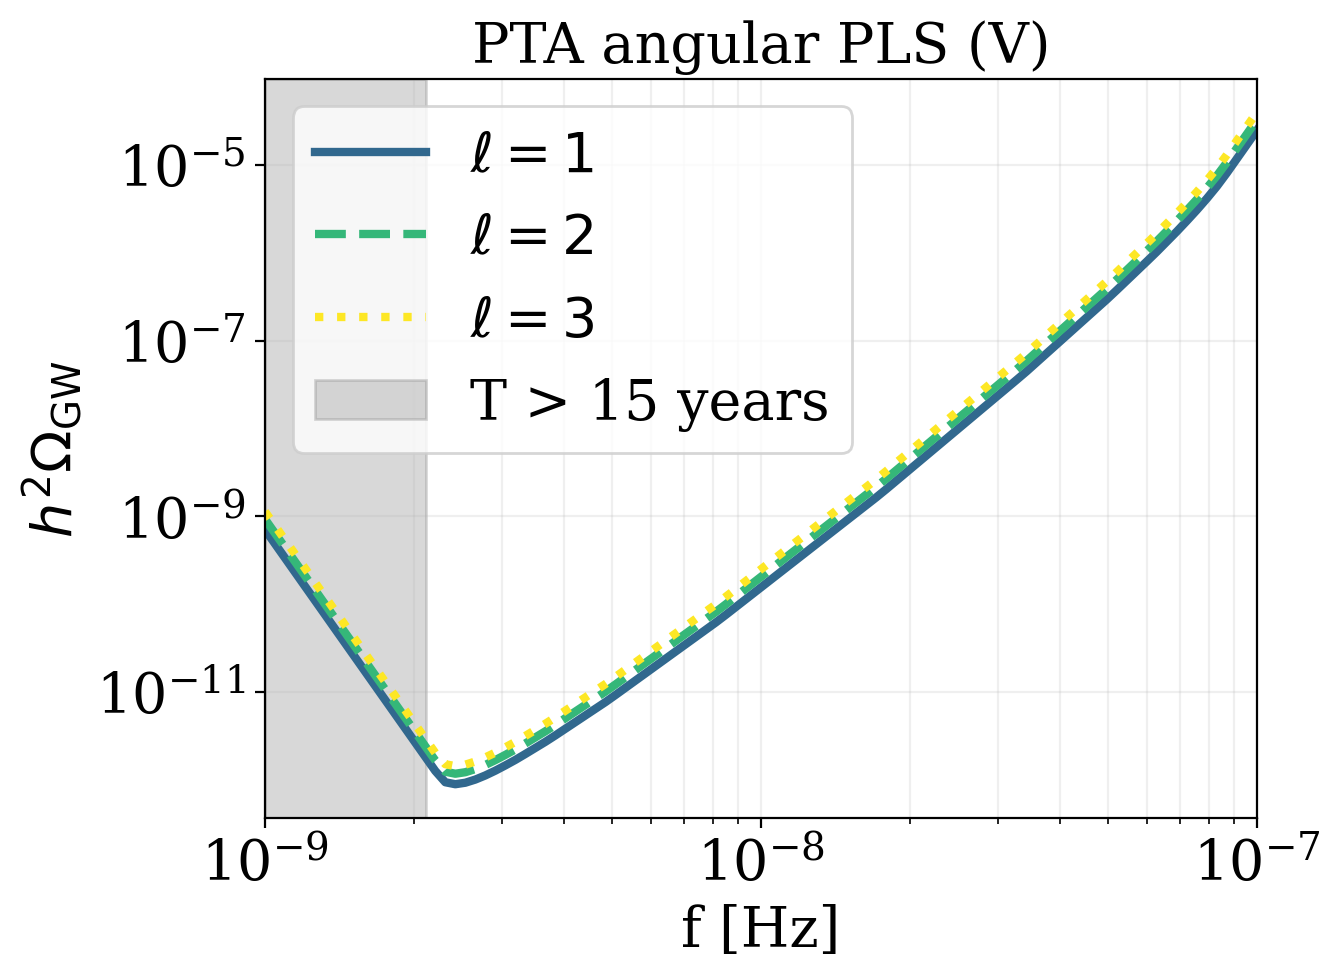

In [37]:
plt.loglog(f, pls_NANOGrav_1_V, label=r'$\ell=1$', color=colors[1])
plt.loglog(f, pls_NANOGrav_2_V, label=r'$\ell=2$', color=colors[2], linestyle='dashed')
plt.loglog(f, pls_NANOGrav_3_V, label=r'$\ell=3$', color=colors[3], linestyle=':')
plt.axvspan(f_PTA.min(), f_15_years, color='gray', alpha=0.3, label='T > 15 years')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2 \Omega_{\rm GW}$')
plt.xlim(f.min(), f.max())
plt.legend()
plt.title('PTA angular PLS (V)')
plt.grid(which='both', alpha=0.2)



In [38]:
# print minimum vor V

print(np.min(pls_NANOGrav_1_V))
print(np.min(pls_NANOGrav_2_V))
print(np.min(pls_NANOGrav_3_V))

8.935432377926118e-13
1.1767890759698704e-12
1.4341674495495174e-12


# Circular polarization tests

In [575]:
# check the circular polarization in the two frames (for the monopole)

# cosmic rest frame monopole


gamma_ij_V_crf = []
alpha_ij = []

psi = 0
for i in range(int(N/2)):
    for j in range(i+1, int(N/2)):
        alpha_ij.append(np.arccos(np.dot(pulsar_xyz[i], pulsar_xyz[j])))
        #gamma0_ij_V_crf.append(AngularResponse.R_ell_pairwise(0, pulsar_xyz[i], pulsar_xyz[j],  d[i], d[j], f, 'V', psi))
        gamma_ij_V_crf.append(Response.pairwise_overlap(f, pulsar_xyz[i], pulsar_xyz[j],  d[i], d[j], 'V', 0))


gamma_ij_V_crf = np.array(gamma_ij_V_crf)
alpha_ij = np.array(alpha_ij)

In [540]:
# cosmic rest frame ell = 0 

gamma0_ij_V_crf = []
alpha_ij = []

psi = 0
for i in range(int(N)):
    for j in range(i+1, int(N)):
        alpha_ij.append(np.arccos(np.dot(pulsar_xyz[i], pulsar_xyz[j])))
        gamma0_ij_V_crf.append(AngularResponse.R_ell_pairwise(0, pulsar_xyz[i], pulsar_xyz[j],  d[i], d[j], f, 'V', psi))


gamma0_ij_V_crf= np.array(gamma0_ij_V_crf)
alpha_ij = np.array(alpha_ij)

In [576]:
# computational frame

#gamma0_ij_V_comp = []
gamma_ij_V_comp = []
alpha_ij_comp = []

for i in range(int(N/2)):
    for j in range(i+1, int(N/2)):
        alpha = np.arccos(np.dot(pulsar_xyz[i], pulsar_xyz[j]))
        p_i_comp = np.array([0, 0, 1])
        p_j_comp = np.array([np.sin(alpha), 0, np.cos(alpha)])
        #gamma0_ij_V_comp.append(AngularResponse.R_ell_pairwise(0, p_i_comp, p_j_comp,  0, 0, f, 'V', psi))
        gamma_ij_V_comp.append(Response.pairwise_overlap(f, p_i_comp, p_j_comp,  d[i], d[j], 'V', 0))

        alpha_ij_comp.append(alpha)

gamma_ij_V_comp = np.array(gamma_ij_V_comp)
alpha_ij_comp = np.array(alpha_ij_comp)        

In [577]:
print(gamma_ij_V_comp)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [578]:
np.abs(gamma_ij_V_crf[:, 0])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.], dtype=float64)

In [579]:
print(alpha_ij.shape)
print(gamma_ij_V_crf.shape)
print(gamma_ij_V_comp.shape)


(21,)
(21, 100)
(21, 100)


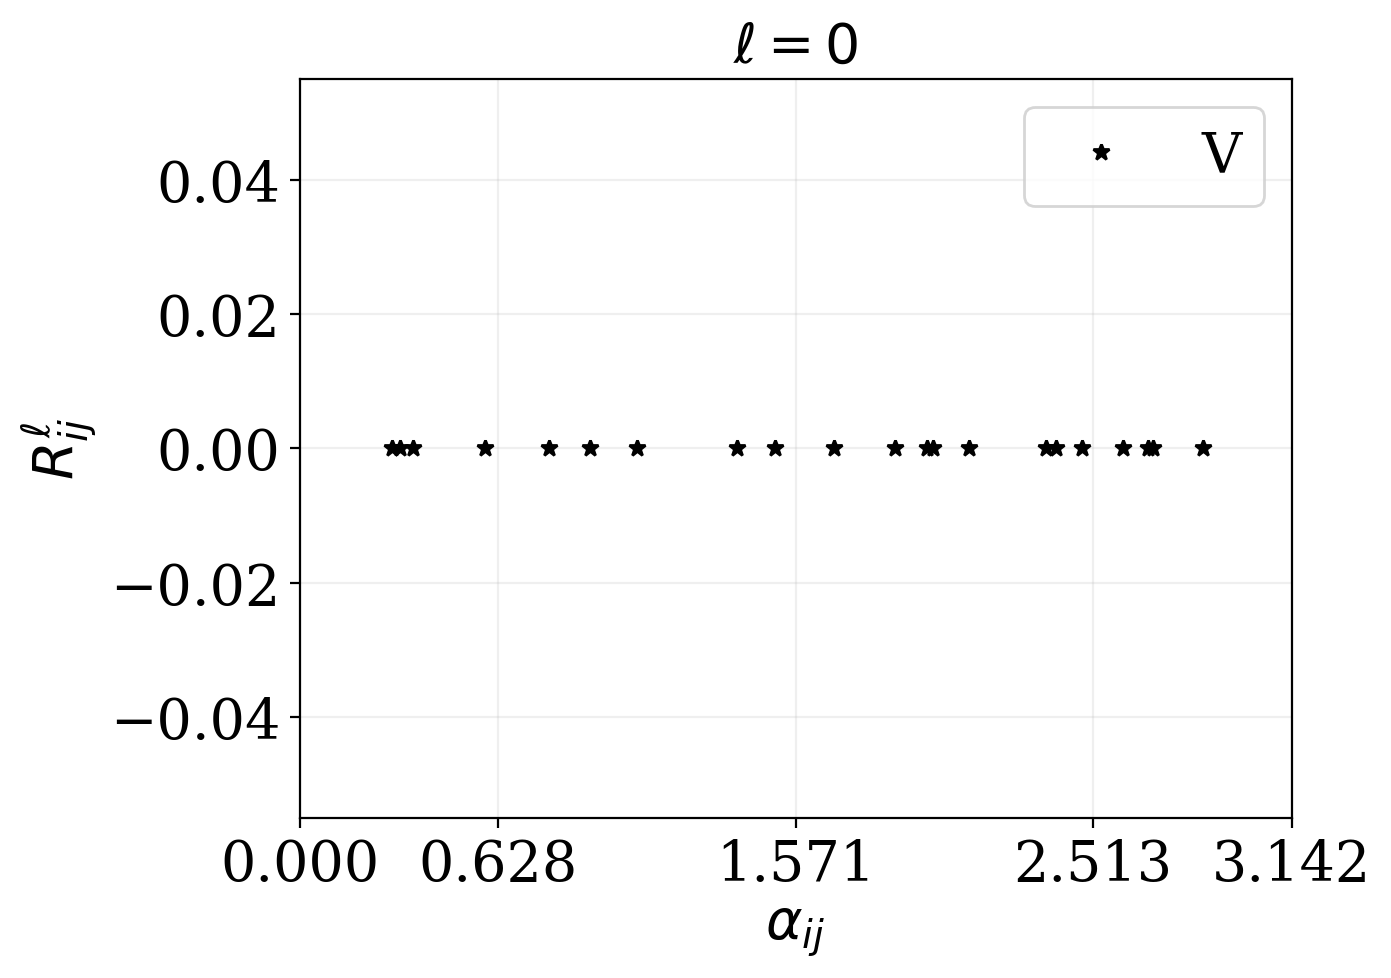

In [581]:
# Plot per ℓ=0
plt.plot(alpha_ij, np.abs(gamma_ij_V_crf[:, 0]), '*', color='black', label='V')
#plt.semilogy(alpha_ij, gamma0_ij_V_crf[:,0], '*', color=colors[0], label='V l=0')
#plt.plot(alpha_ij_comp, np.abs(gamma_ij_V_comp[:, 20]), '*', color=colors[1], label='V')
plt.xlabel(r'$\alpha_{ij}$')
plt.ylabel(r'$R_{ij}^{\ell}$')
plt.grid(which='both', alpha=0.2)
plt.title(r'$\ell=0$')
plt.xticks(custom_ticks)
plt.legend()
#plt.xaxis.major_formatter(FuncFormatter(custom_pi_formatter))

In [253]:
gamma0_ij_V = []
gamma1_ij_V = []
gamma2_ij_V = []
gamma3_ij_V = []

alpha_ij = []

psi = 0
for i in range(N):
    for j in range(i+1, N):
        alpha_ij.append(np.arccos(np.dot(pulsar_xyz[i], pulsar_xyz[j])))
        gamma0_ij_V.append(AngularResponse.R_ell_pairwise(0, pulsar_xyz[i], pulsar_xyz[j],  d[i], d[j], f, 'V', psi))
        gamma1_ij_V.append(AngularResponse.R_ell_pairwise(1, pulsar_xyz[i], pulsar_xyz[j],  d[i], d[j],f, 'V', psi))
        gamma2_ij_V.append(AngularResponse.R_ell_pairwise(2, pulsar_xyz[i], pulsar_xyz[j],  d[i], d[j],f, 'V', psi))
        gamma3_ij_V.append(AngularResponse.R_ell_pairwise(3, pulsar_xyz[i], pulsar_xyz[j],  d[i], d[j],f, 'V', psi))

gamma0_ij_V = np.array(gamma0_ij_V)
gamma1_ij_V = np.array(gamma1_ij_V)
gamma2_ij_V = np.array(gamma2_ij_V)
gamma3_ij_V = np.array(gamma3_ij_V)
alpha_ij = np.array(alpha_ij)


KeyboardInterrupt: 

In [54]:
gamma0_ij_V = []


alpha_ij = []

psi = 0
for i in range(N):
    for j in range(i+1, N):
        alpha_ij.append(np.arccos(np.dot(pulsar_xyz[i], pulsar_xyz[j])))
        gamma0_ij_V.append(AngularResponse.R_ell_pairwise(0, pulsar_xyz[i], pulsar_xyz[j],  d[i], d[j], f, 'V', -np.pi/2))

gamma0_ij_V = np.array(gamma0_ij_V)


In [52]:
f_index = np.argmin(np.abs(f - 1e-8))
print(f_index)
gamma0_ij_V_f_index = gamma0_ij_V[:,f_index]
gamma1_ij_V_f_index = gamma1_ij_V[:,f_index]
gamma2_ij_V_f_index = gamma2_ij_V[:,f_index]
gamma3_ij_V_f_index = gamma3_ij_V[:,f_index]


49


In [48]:
# functions to check the angular response https://journals.aps.org/prd/pdf/10.1103/PhysRevD.93.062003

# l=0
def RV_0(alpha):
    return np.zeros(len(alpha))

# l=1
def RV_1_1(alpha):
    return - np.sqrt(6*np.pi)/3 * np.sin(alpha) * ( 1 + 3*((1-np.cos(alpha))/(1+np.cos(alpha)))*np.log(np.sin(alpha/2)) )

def RV_11(alpha):
    return RV_1_1(alpha)

def RV_10(alpha):
    return np.zeros(len(alpha))

def RV_1(alpha):
    term1 = RV_1_1(alpha)
    term2 = RV_11(alpha)
    term3 = RV_10(alpha)
    return np.sqrt(term1**2 + term2**2 + term3**2)

# l=2
def RV_2_2(alpha):
    term1 = np.sqrt(30*np.pi)/6 * (1- np.cos(alpha))
    term2 = (2 - np.cos(alpha))
    term3 = 6 * ((1- np.cos(alpha))/(1+ np.cos(alpha))) * np.log(np.sin(alpha/2))
    return term1* (term2 + term3)

def RV_2_1(alpha):
    term1 = np.sqrt(30*np.pi)/6 * (np.sin(alpha)/(1+ np.cos(alpha)))
    term2 = 2
    term3 = (1- np.cos(alpha))
    term4 = (np.cos(alpha) + 6* np.log(np.sin(alpha/2)))
    return term1* (term2 + term3*term4)

def RV_20(alpha):
    return np.zeros(len(alpha))

def RV_21(alpha):
    return RV_2_1(alpha)

def RV_22(alpha):
    return -RV_2_2(alpha)

def RV_2(alpha):
    term1 = RV_2_2(alpha)
    term2 = RV_2_1(alpha)
    term3 = RV_20(alpha)
    term4 = RV_21(alpha)
    term5 = RV_22(alpha)
    return np.sqrt(term1**2 + term2**2 + term3**2 + term4**2 + term5**2)

# l = 3

def RV_3_3(alpha):
    ratio = (1-np.cos(alpha))/(1+np.cos(alpha))
    term1 = - np.sqrt(35*np.pi)/16 * np.sin(alpha) * ratio
    term2 = 11 - 6*np.cos(alpha) - np.cos(alpha)**2
    term3 = 32 * ratio * np.log(np.sin(alpha/2))
    return term1 * (term2 + term3)

def RV_3_2(alpha):
    term1 = - np.sqrt(210*np.pi)/24 * (1 - np.cos(alpha))
    term2 = 8 - 5*np.cos(alpha) - np.cos(alpha)**2
    ratio = (1-np.cos(alpha))/(1+np.cos(alpha))
    term3 = 24*ratio*np.log(np.sin(alpha/2))
    return term1 * (term2 + term3)

def RV_3_1(alpha):
    term1 = - np.sqrt(21*np.pi)/48 * np.sin(alpha)
    term2 = 33 - 20*np.cos(alpha) - 5*np.cos(alpha)**2
    ratio = (1-np.cos(alpha))/(1+np.cos(alpha))
    term3 = 96* ratio *np.log(np.sin(alpha/2))
    return term1 * (term2 + term3)

def RV_3_0(alpha):
    return np.zeros(len(alpha))

def RV_31(alpha):
    return RV_3_1(alpha)

def RV_32(alpha):
    return -RV_3_2(alpha)

def RV_33(alpha):
    return RV_3_3(alpha)

def RV_3(alpha):
    term1 = RV_3_3(alpha)
    term2 = RV_3_2(alpha)
    term3 = RV_3_1(alpha)
    term4 = RV_3_0(alpha)
    term5 = RV_31(alpha)
    term6 = RV_32(alpha)
    term7 = RV_33(alpha)
    return np.sqrt(term1**2 + term2**2 + term3**2 + term4**2 + term5**2 + term6**2 + term7**2)


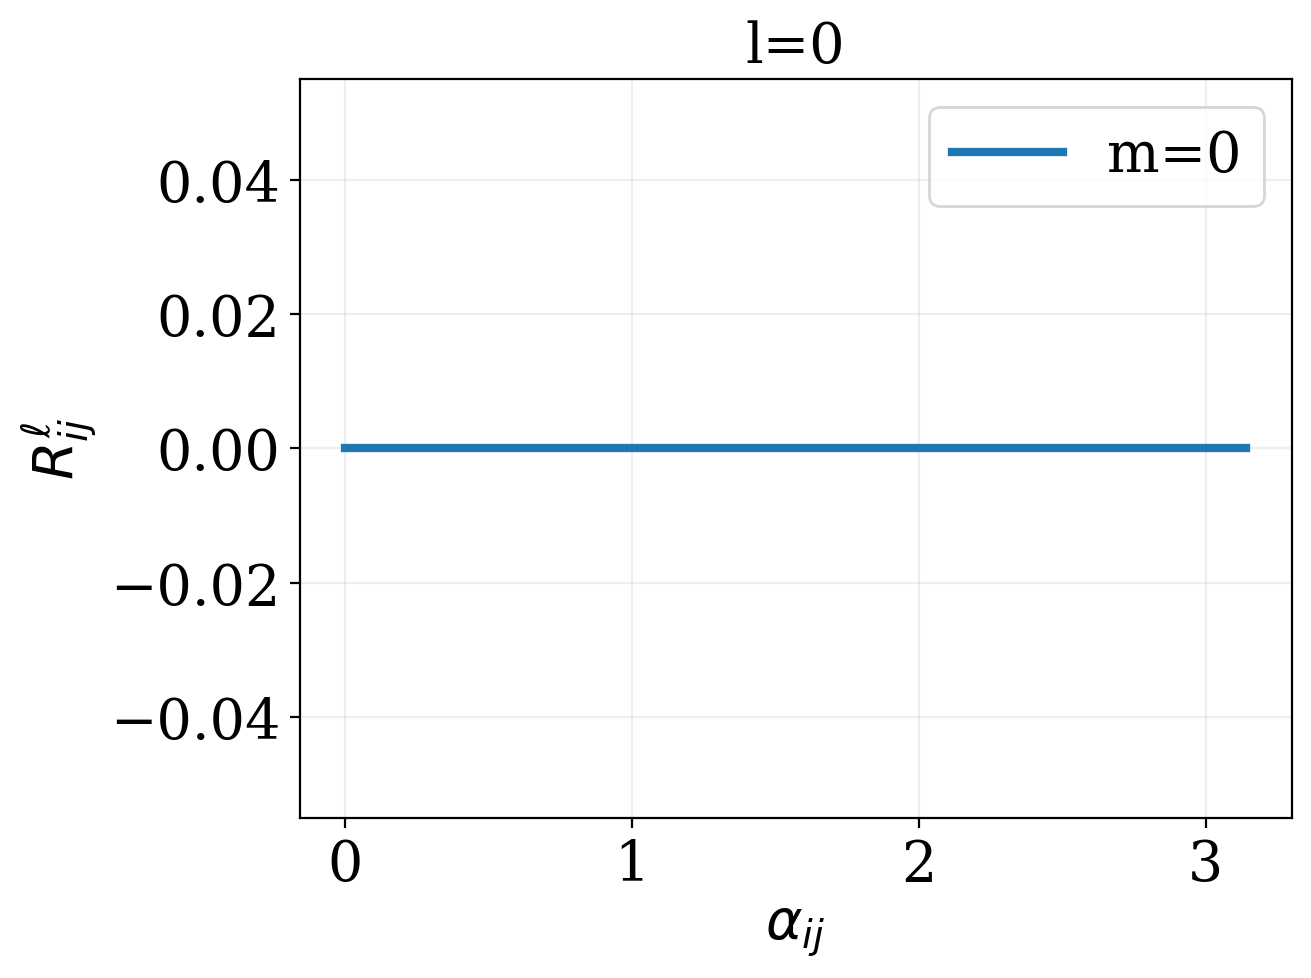

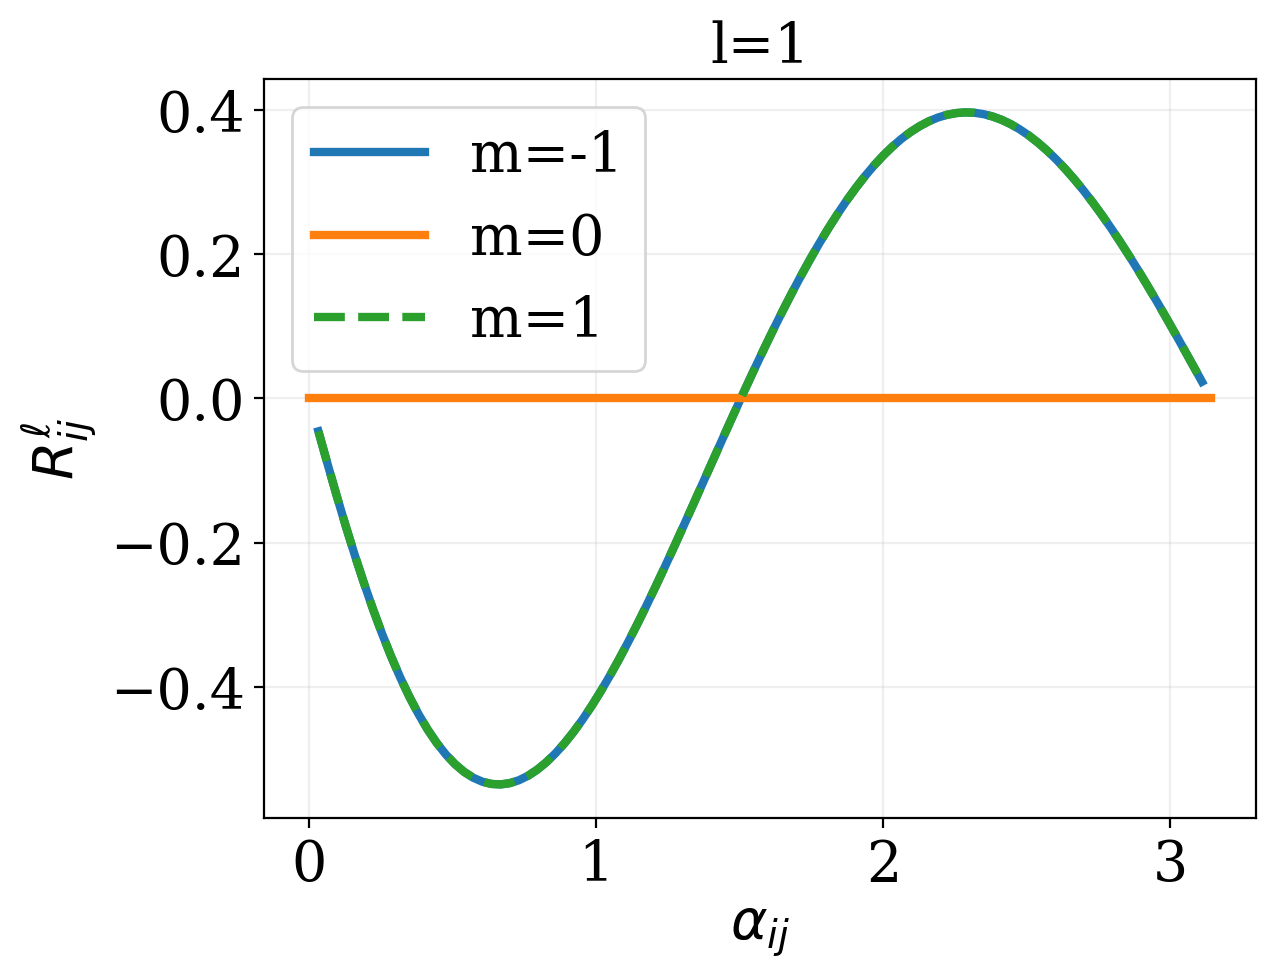

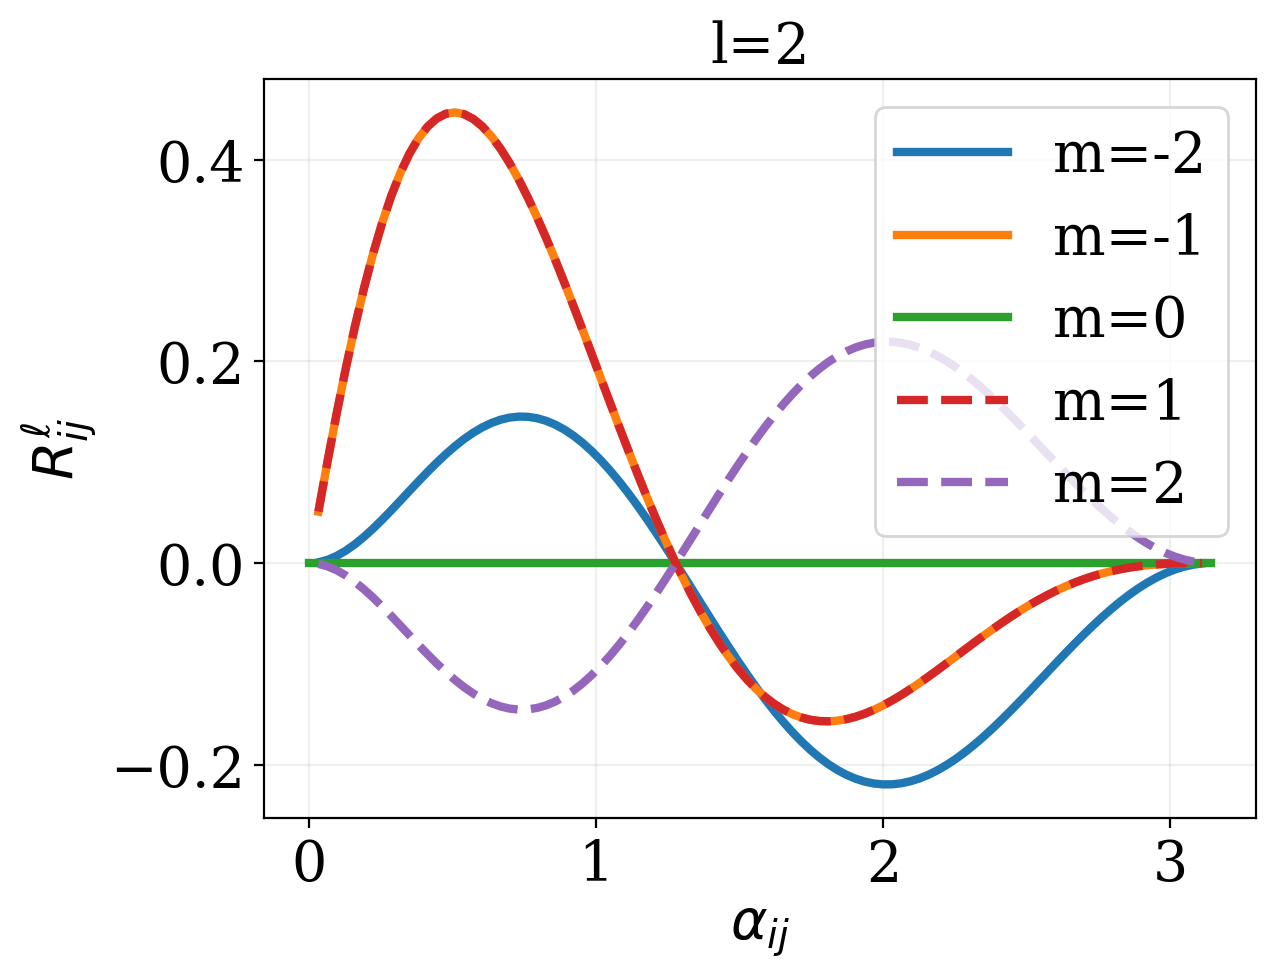

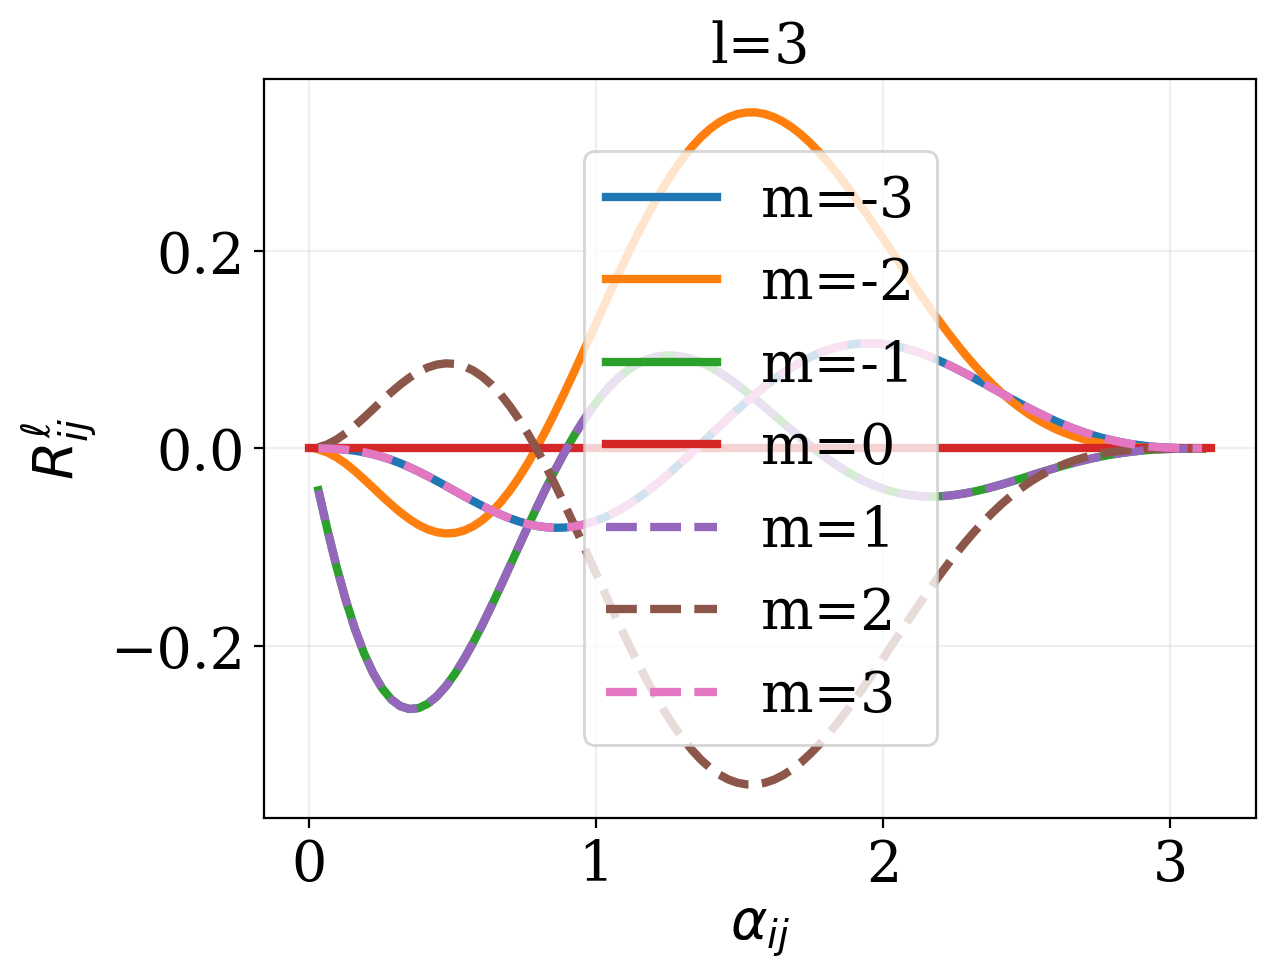

In [49]:
alpha = np.linspace(0, np.pi, 100)

# l = 0

plt.plot(alpha, RV_0(alpha), label='m=0')
plt.xlabel(r'$\alpha_{ij}$')
plt.ylabel(r'$R_{ij}^{\ell}$')
plt.title('l=0')
plt.grid(which='both', alpha=0.2)
plt.legend()
plt.show()

# l = 1
plt.plot(alpha, RV_1_1(alpha), label='m=-1')
plt.plot(alpha, RV_10(alpha), label='m=0')
plt.plot(alpha, RV_11(alpha), label='m=1', linestyle = '--')
plt.xlabel(r'$\alpha_{ij}$')
plt.ylabel(r'$R_{ij}^{\ell}$')
plt.title('l=1')
plt.grid(which='both', alpha=0.2)
plt.legend()
plt.show()

# l = 2
plt.plot(alpha, RV_2_2(alpha), label='m=-2')
plt.plot(alpha, RV_2_1(alpha), label='m=-1')
plt.plot(alpha, RV_20(alpha), label='m=0')
plt.plot(alpha, RV_21(alpha), label='m=1', linestyle = '--')
plt.plot(alpha, RV_22(alpha), label='m=2', linestyle = '--')
plt.xlabel(r'$\alpha_{ij}$')
plt.ylabel(r'$R_{ij}^{\ell}$')
plt.title('l=2')
plt.grid(which='both', alpha=0.2)
plt.legend()
plt.show()

# l = 3
plt.plot(alpha, RV_3_3(alpha), label='m=-3')
plt.plot(alpha, RV_3_2(alpha), label='m=-2')
plt.plot(alpha, RV_3_1(alpha), label='m=-1')
plt.plot(alpha, RV_3_0(alpha), label='m=0')
plt.plot(alpha, RV_31(alpha), label='m=1', linestyle = '--')
plt.plot(alpha, RV_32(alpha), label='m=2', linestyle = '--')
plt.plot(alpha, RV_33(alpha), label='m=3', linestyle = '--')
plt.xlabel(r'$\alpha_{ij}$')
plt.ylabel(r'$R_{ij}^{\ell}$')
plt.title('l=3')
plt.grid(which='both', alpha=0.2)
plt.legend()
plt.show()


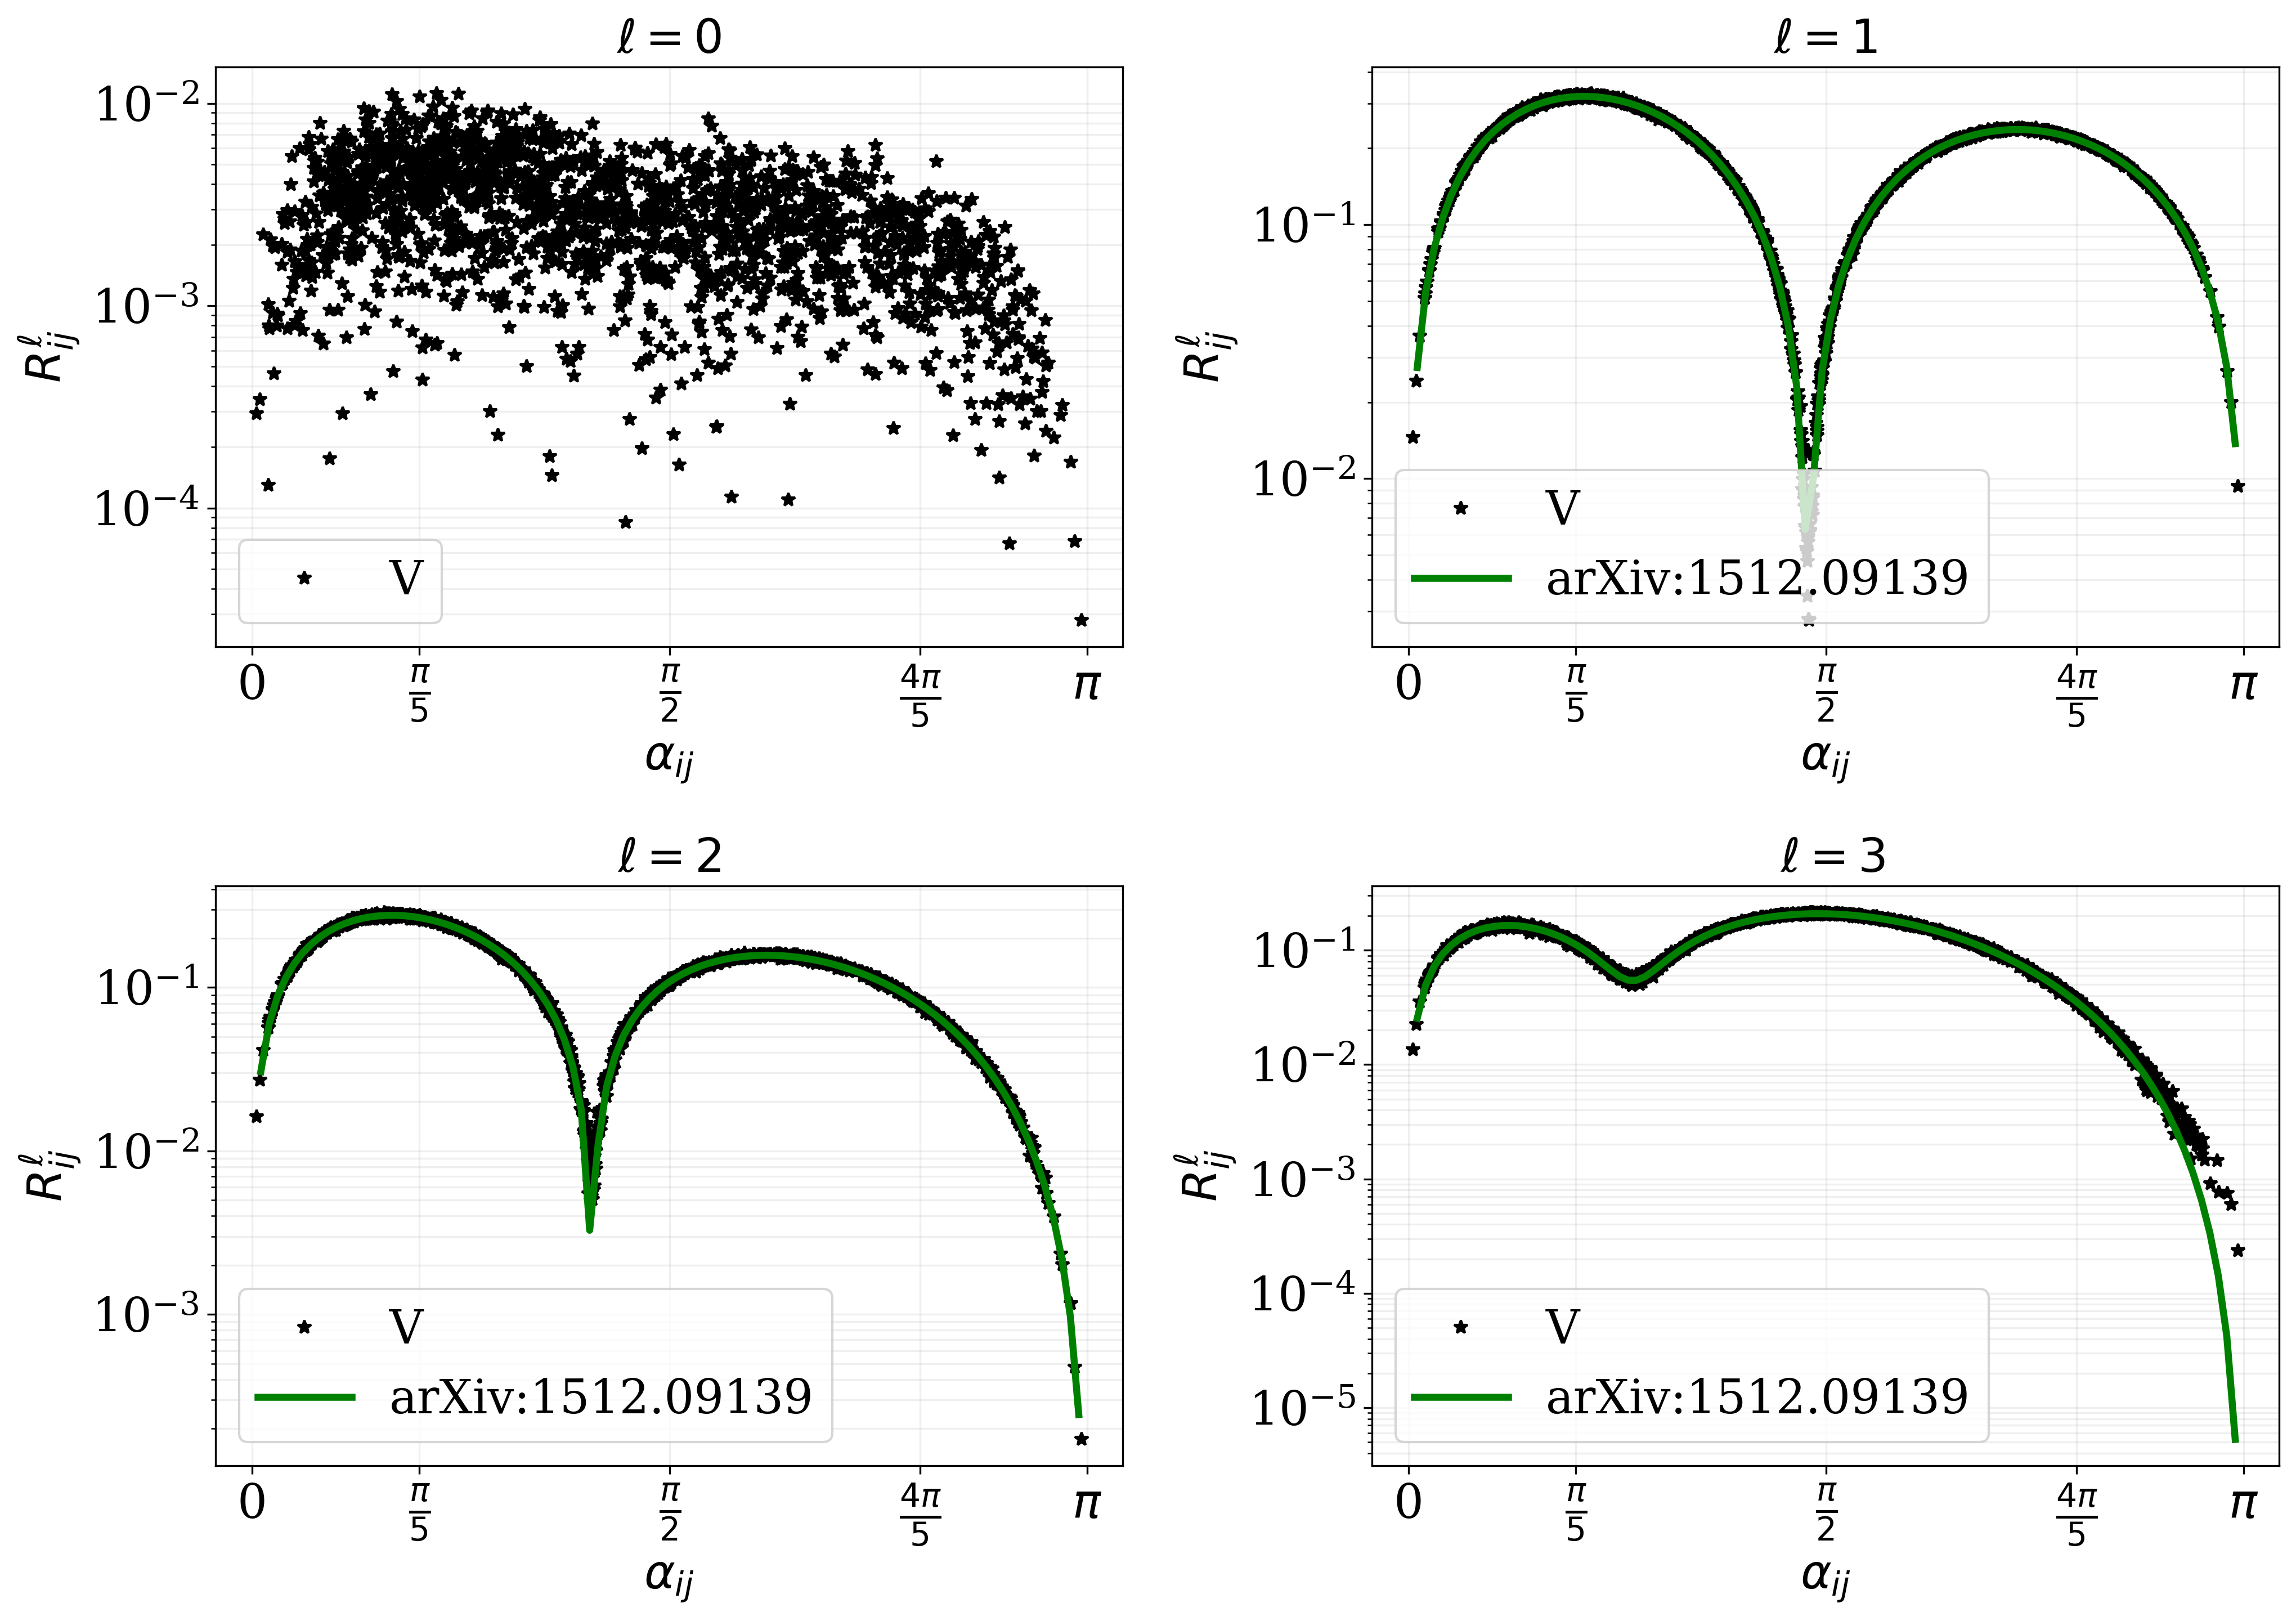

In [55]:
# plot

# plot 2x2 dove in ogni blocco c'è un multipolo

fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Definizione dei tick personalizzati
custom_ticks = [0, np.pi / 5, np.pi / 2, 4 * np.pi / 5, np.pi]

norm = 3*np.sqrt(4*np.pi)/(8*np.pi)

# Plot per ℓ=0
ax[0, 0].semilogy(alpha_ij, np.abs(gamma0_ij_V_f_index), '*', color='black', label='V')
#ax[0, 0].semilogy(alpha, norm*np.abs(RV_0(alpha)), color='red', label='ref.')
ax[0, 0].set_xlabel(r'$\alpha_{ij}$')
ax[0, 0].set_ylabel(r'$R_{ij}^{\ell}$')
ax[0, 0].grid(which='both', alpha=0.2)
ax[0, 0].set_title(r'$\ell=0$')
ax[0, 0].set_xticks(custom_ticks)
ax[0, 0].legend()
ax[0, 0].xaxis.set_major_formatter(FuncFormatter(custom_pi_formatter))

# Plot per ℓ=1
ax[0, 1].semilogy(alpha_ij, gamma1_ij_V_f_index, '*', color='black', label='V')
ax[0, 1].semilogy(alpha, norm*RV_1(alpha), color='green', label='arXiv:1512.09139')
ax[0, 1].set_xlabel(r'$\alpha_{ij}$')
ax[0, 1].set_ylabel(r'$R_{ij}^{\ell}$')
ax[0, 1].grid(which='both', alpha=0.2)
ax[0, 1].set_title(r'$\ell=1$')
ax[0, 1].set_xticks(custom_ticks)
ax[0, 1].legend()
ax[0, 1].xaxis.set_major_formatter(FuncFormatter(custom_pi_formatter))

# Plot per ℓ=2
ax[1, 0].semilogy(alpha_ij, gamma2_ij_V_f_index, '*', color='black', label='V')
ax[1, 0].semilogy(alpha, norm*RV_2(alpha), color='green', label='arXiv:1512.09139')
ax[1, 0].set_xlabel(r'$\alpha_{ij}$')
ax[1, 0].set_ylabel(r'$R_{ij}^{\ell}$')
ax[1, 0].grid(which='both', alpha=0.2)
ax[1, 0].set_title(r'$\ell=2$')
ax[1, 0].set_xticks(custom_ticks)
ax[1, 0].legend()
ax[1, 0].xaxis.set_major_formatter(FuncFormatter(custom_pi_formatter))

# Plot per ℓ=3
ax[1, 1].semilogy(alpha_ij, gamma3_ij_V_f_index, '*', color='black', label='V')
ax[1, 1].semilogy(alpha, norm*RV_3(alpha), color='green', label='arXiv:1512.09139')
ax[1, 1].set_xlabel(r'$\alpha_{ij}$')
ax[1, 1].set_ylabel(r'$R_{ij}^{\ell}$')
ax[1, 1].grid(which='both', alpha=0.2)
ax[1, 1].set_title(r' $\ell=3$')
ax[1, 1].set_xticks(custom_ticks)
ax[1, 1].legend()
ax[1, 1].xaxis.set_major_formatter(FuncFormatter(custom_pi_formatter))

plt.tight_layout()
plt.show()


Quick checks and tests for the pulsar term in V

In [622]:

gamma_ij_V = []
alpha_ij = []
for i in range(N):
    for j in range(i+1, N):
        alpha_ij.append(np.arccos(np.dot(pulsar_xyz[i], pulsar_xyz[j])))
        gamma_ij_V.append(Response.pairwise_overlap(f, pulsar_xyz[i], pulsar_xyz[j], d[i], d[j],'V'))

gamma_ij_V = np.array(gamma_ij_V)
alpha_ij = np.array(alpha_ij)

In [626]:
print(gamma_ij_V.shape)
print(gamma_ij_V)

(105, 100)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


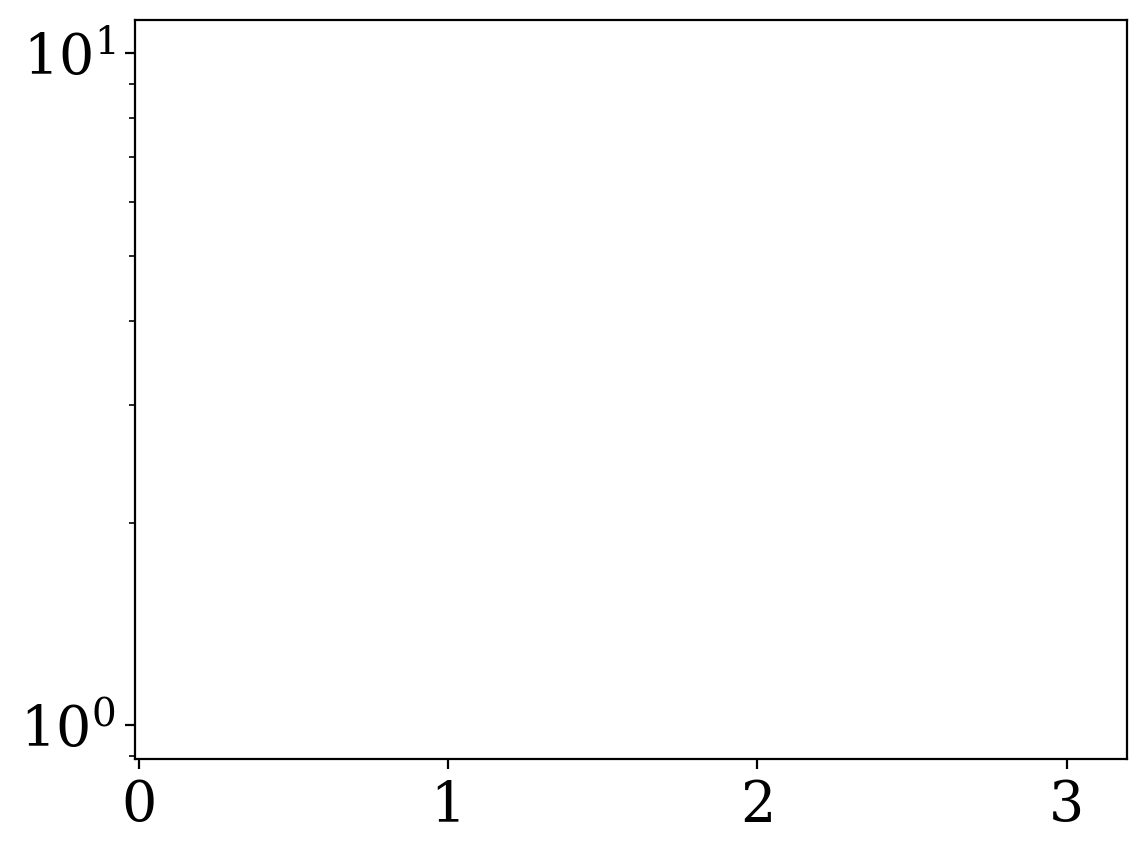

In [625]:
# plot 


plt.semilogy(alpha_ij, np.abs(gamma_ij_V[:, f_index]), '*', color='black', label='V')
